This notebook deals with the feature engineering and data preparation. The required functions from eda.py and preprocess.py are imported and applied on the trainset to investigate the outputs.
At the end a preparation pipeline is defined to fit on the train set and transform the data(train and test sets) into a processed sets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import eda
import warnings
warnings.filterwarnings('ignore')

#Setting the option for pandas to display all the columns whenever displaying a dataset
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Reading in the trainset.
data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
print(data.shape)

(1460, 81)


# Missing values

In [5]:
eda.has_NaN(data)

LotFrontage: 259 NaN valus, 17.74% of the data
Alley: 1369 NaN valus, 93.77% of the data
MasVnrType: 8 NaN valus, 0.55% of the data
MasVnrArea: 8 NaN valus, 0.55% of the data
BsmtQual: 37 NaN valus, 2.53% of the data
BsmtCond: 37 NaN valus, 2.53% of the data
BsmtExposure: 38 NaN valus, 2.60% of the data
BsmtFinType1: 37 NaN valus, 2.53% of the data
BsmtFinType2: 38 NaN valus, 2.60% of the data
Electrical: 1 NaN valus, 0.07% of the data
FireplaceQu: 690 NaN valus, 47.26% of the data
GarageType: 81 NaN valus, 5.55% of the data
GarageYrBlt: 81 NaN valus, 5.55% of the data
GarageFinish: 81 NaN valus, 5.55% of the data
GarageQual: 81 NaN valus, 5.55% of the data
GarageCond: 81 NaN valus, 5.55% of the data
PoolQC: 1453 NaN valus, 99.52% of the data
Fence: 1179 NaN valus, 80.75% of the data
MiscFeature: 1406 NaN valus, 96.30% of the data


In [6]:
# List of the features with Null values
features_with_nan = eda.feature_with_NaN(data)
print(features_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


### Investigating whether there is a relation between null values and the sale price

In [7]:
df = eda.make_binary(data)
df.head()

LotFrontage  Alley  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  \
0            0      1           0           0         0         0   
1            0      1           0           0         0         0   
2            0      1           0           0         0         0   
3            0      1           0           0         0         0   
4            0      1           0           0         0         0   

   BsmtExposure  BsmtFinType1  BsmtFinType2  Electrical  FireplaceQu  \
0             0             0             0           0            1   
1             0             0             0           0            0   
2             0             0             0           0            0   
3             0             0             0           0            0   
4             0             0             0           0            0   

   GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond  PoolQC  \
0           0            0             0           0           0       1   
1           0            0             0           0           0       1   
2           0            0             0           0           0       1   
3           0            0             0           0           0       1   
4           0            0             0           0           0       1   

   Fence  MiscFeature  SalePrice  
0      1            1     208500  
1      1            1     181500  
2      1            1     223500  
3      1            1     140000  
4      1            1     250000

#### Now lets visualize this dataframe

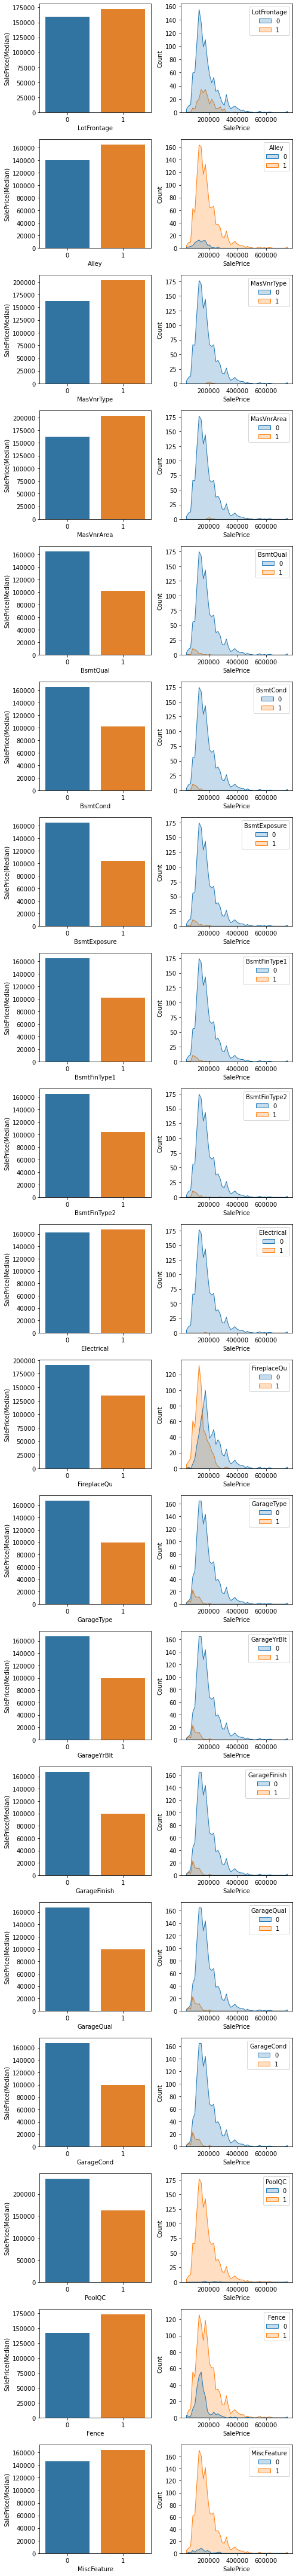

In [8]:
eda.plot_binary_df(df)
    

#### It seems that there is some kind of relation between the NaN values and the SaePrice. So it might be better to impute them.


# Numerical, historic, and non-numerical features

### Visualizing the relation between the age of the building and the price

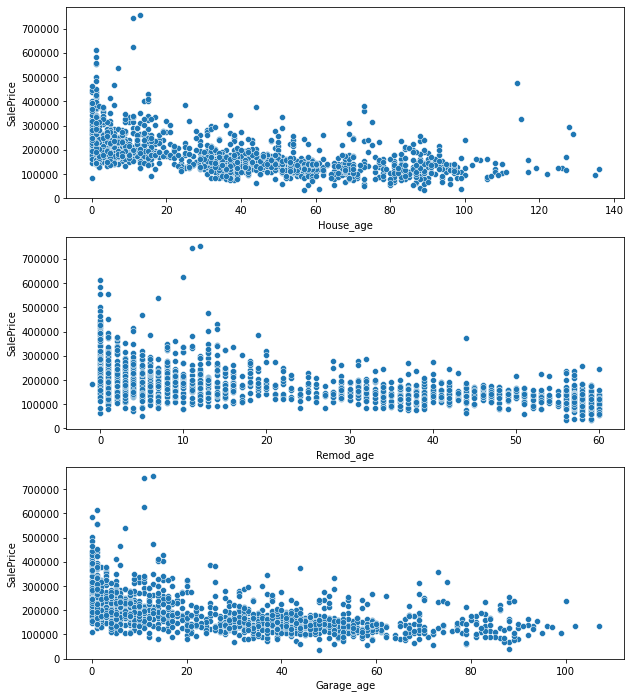

In [9]:
eda.age_price_plot(data)


These figures show that as the age increases the sale price decreases.

### Visualizing the relationship between the discrete features and the SalePrice

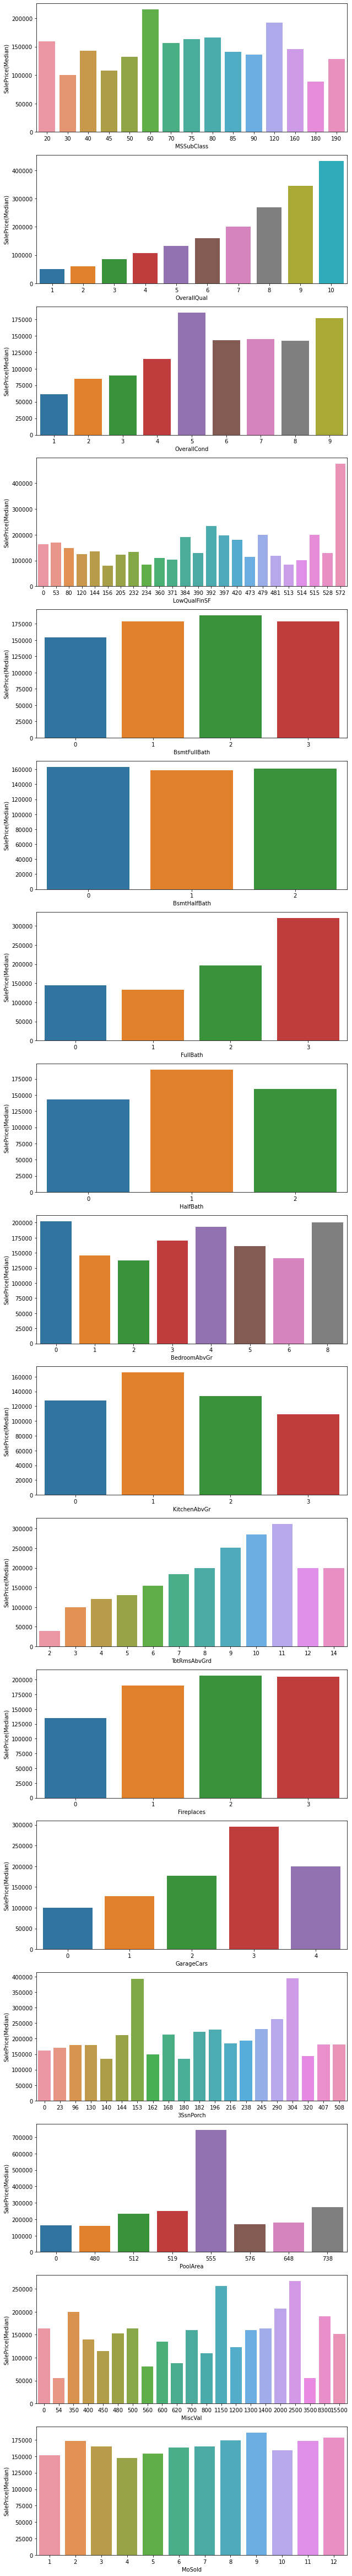

In [10]:
eda.discrete_price_barplot(data)

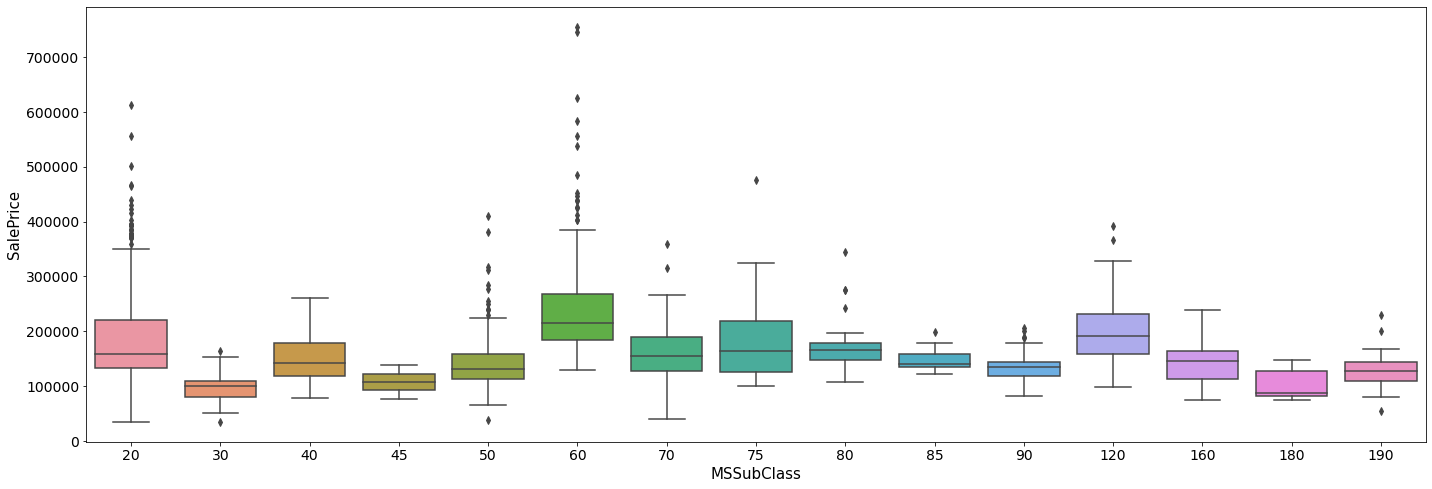

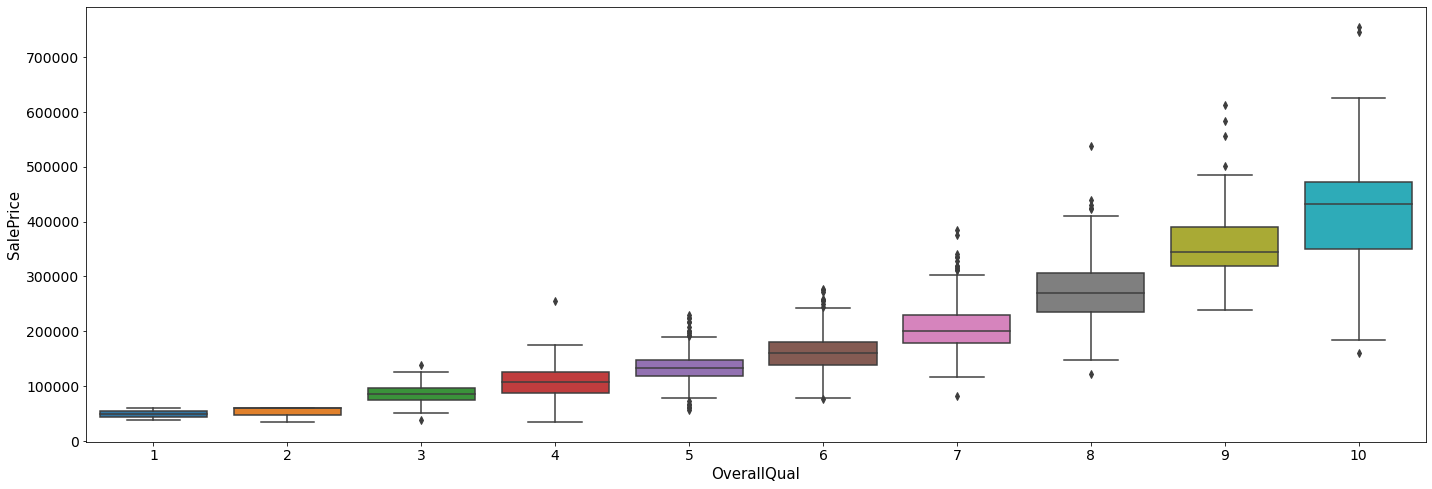

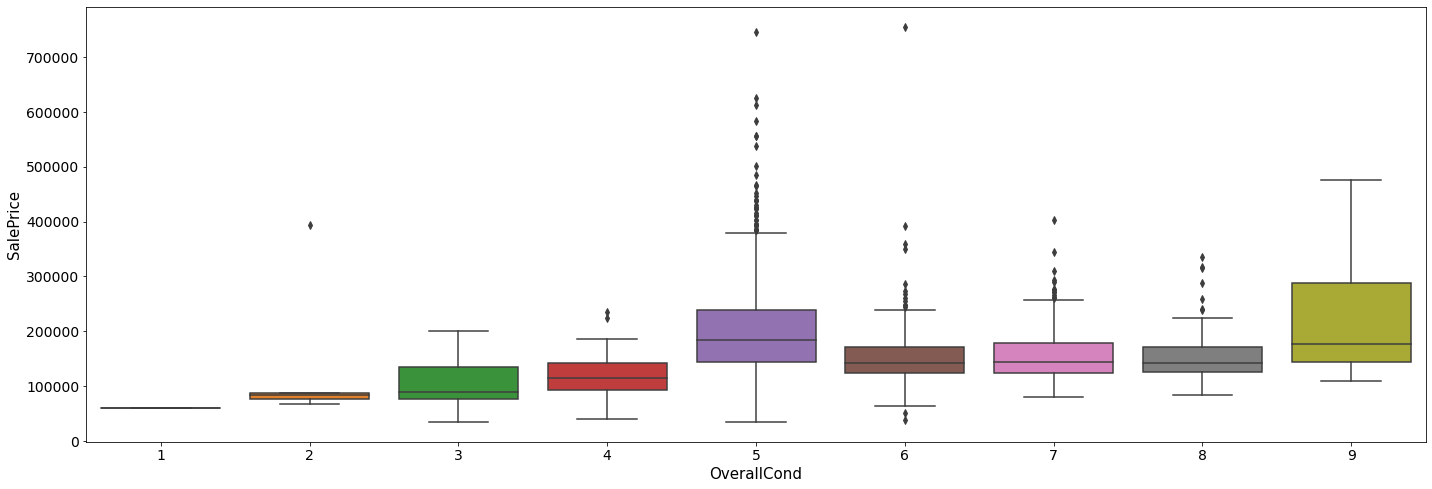

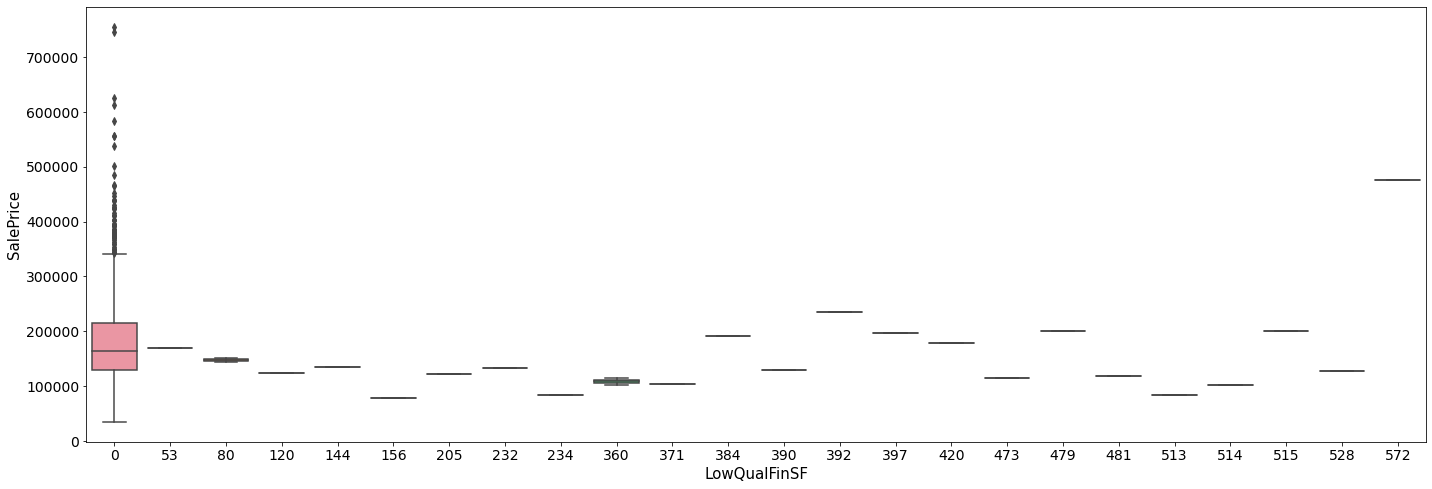

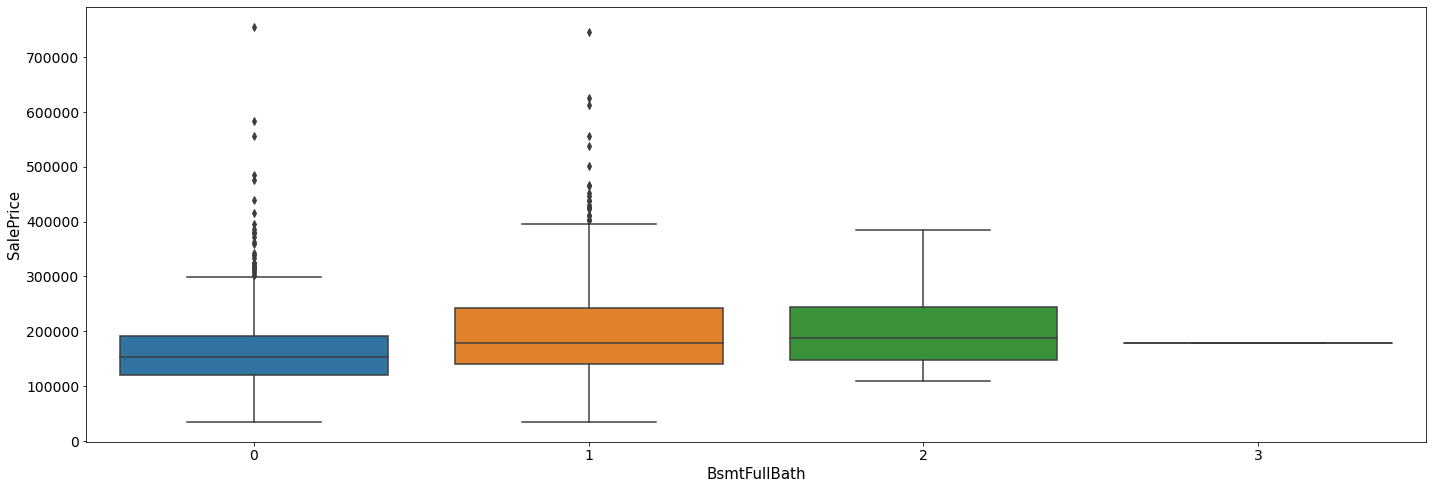

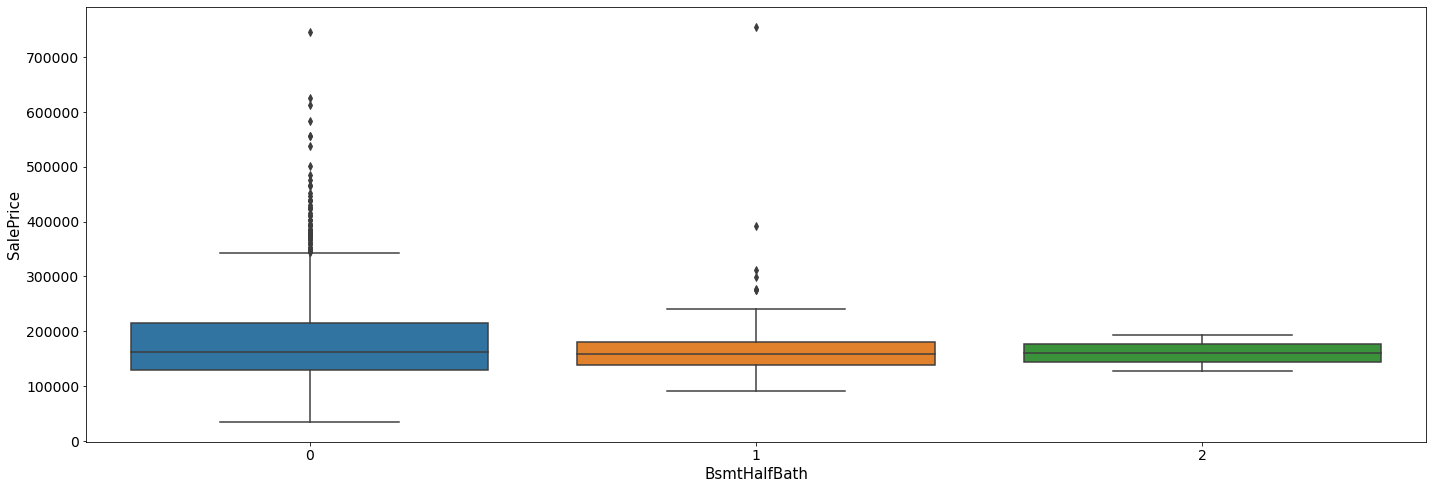

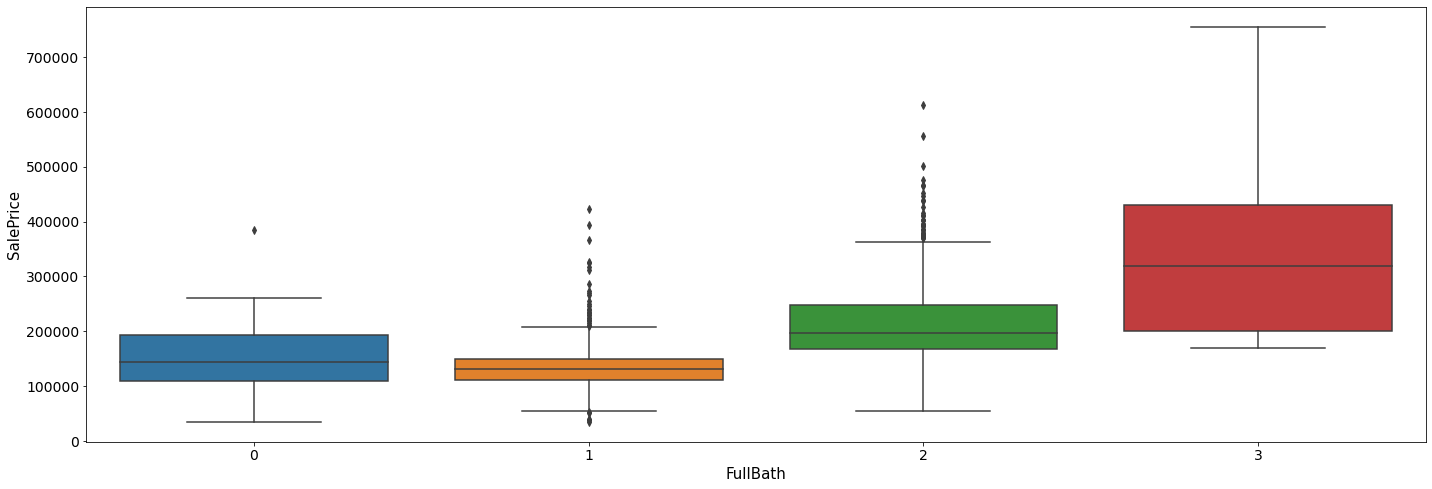

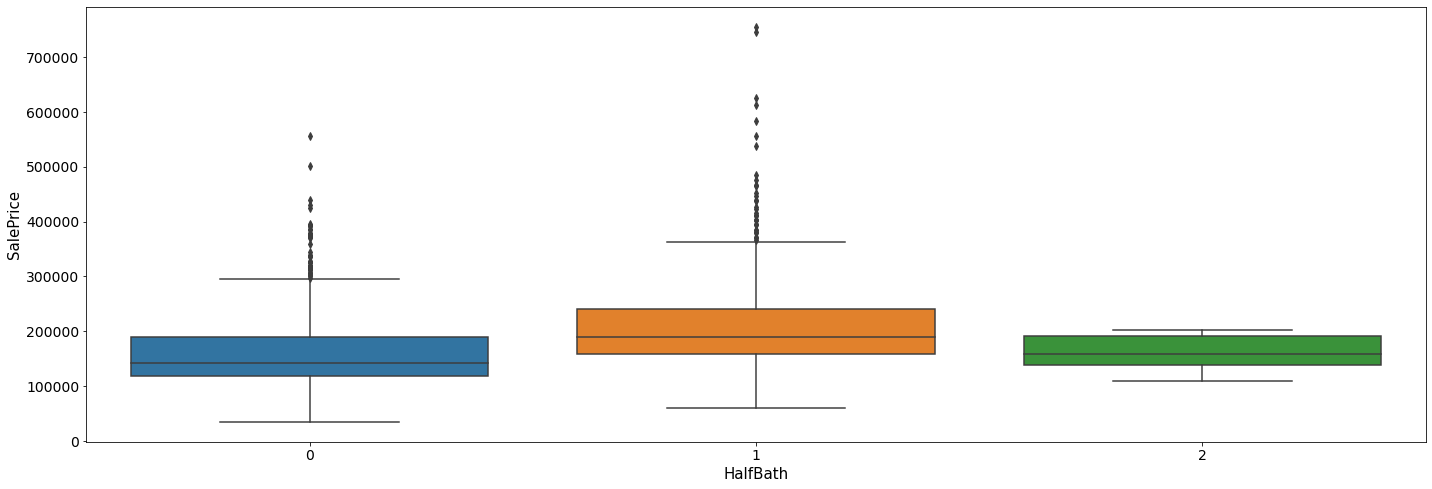

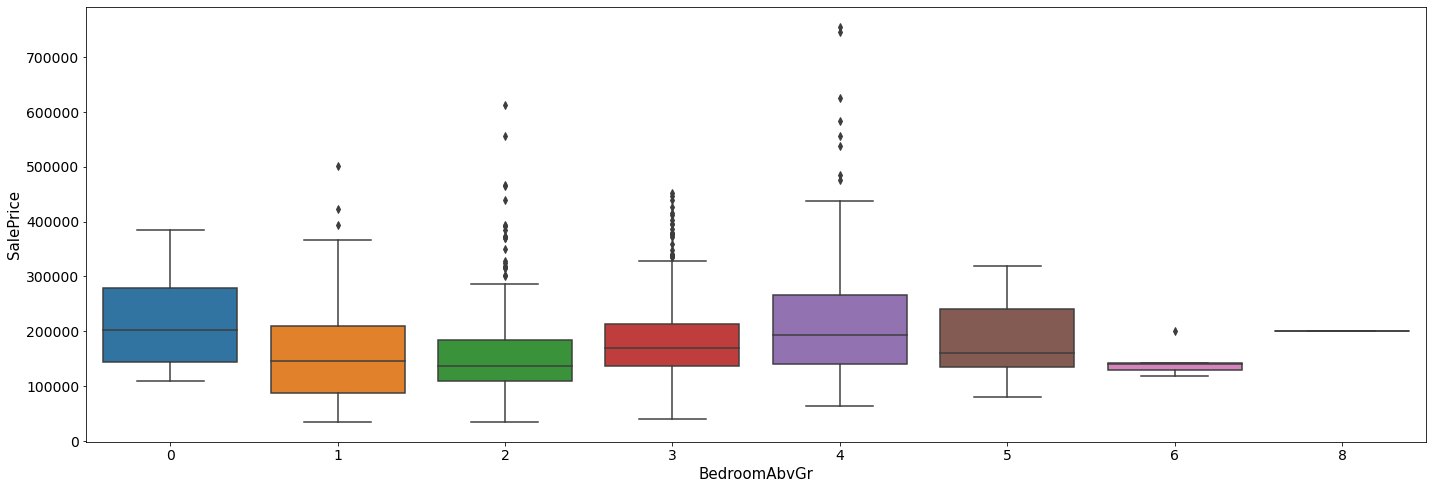

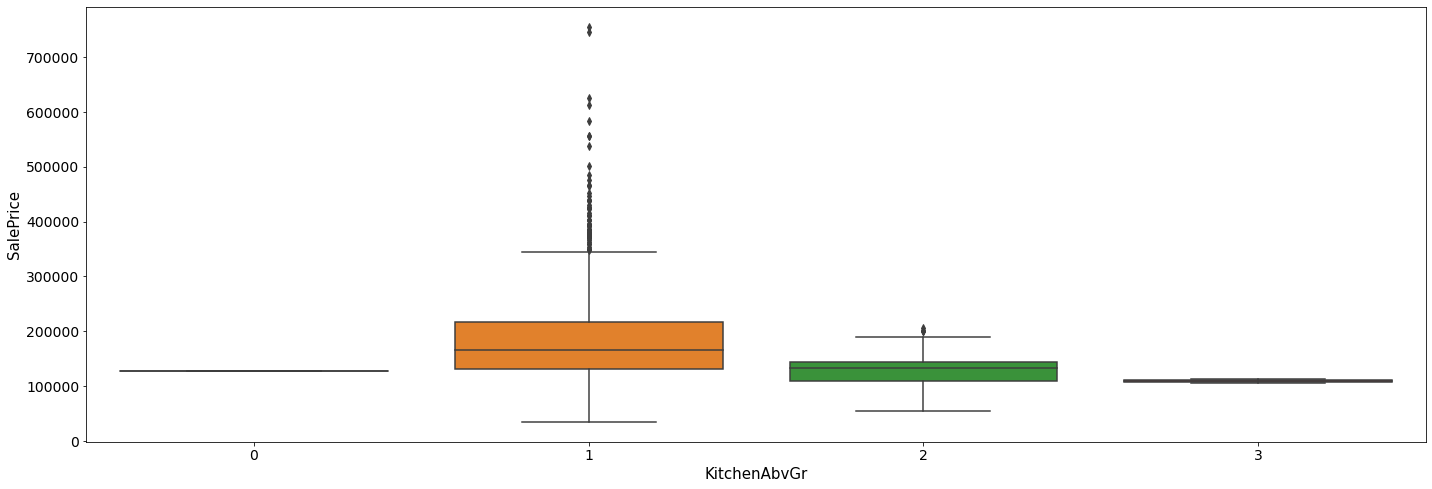

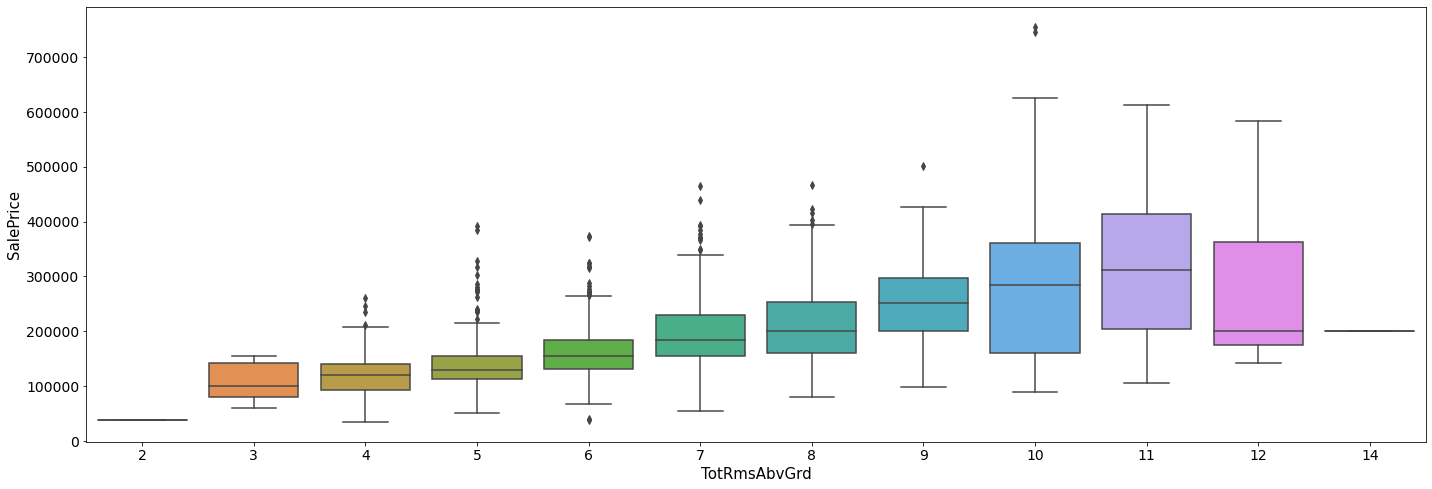

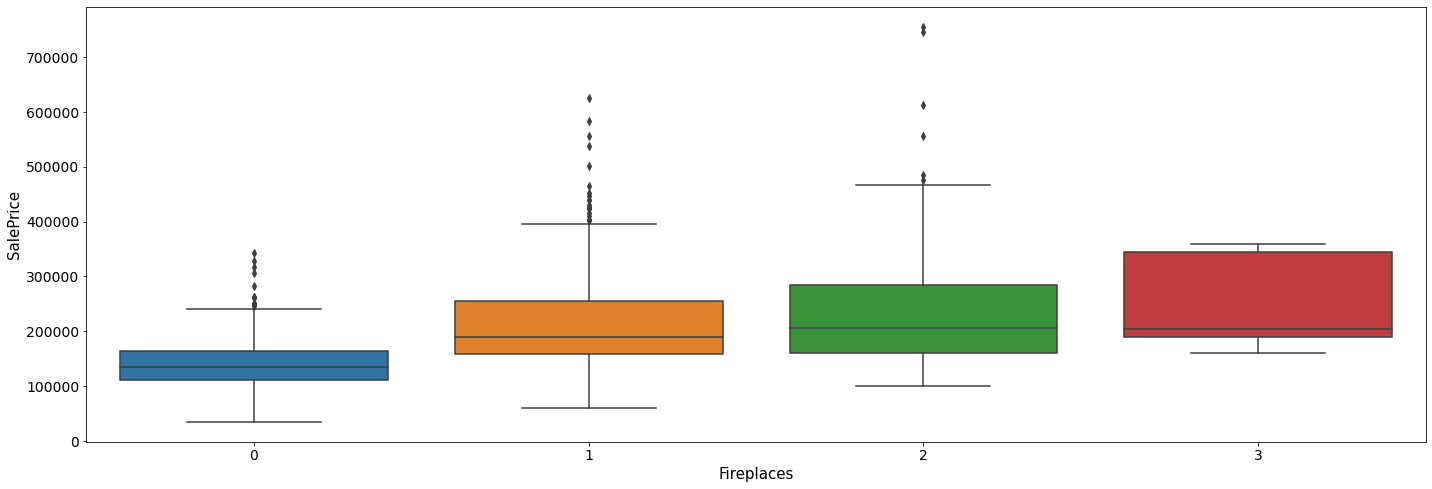

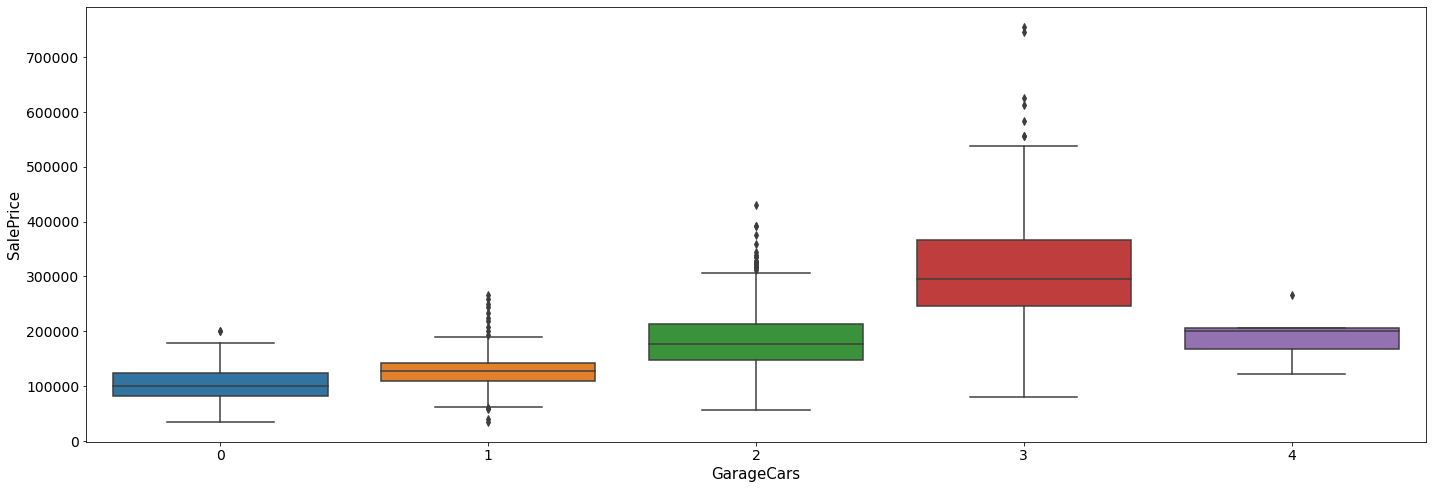

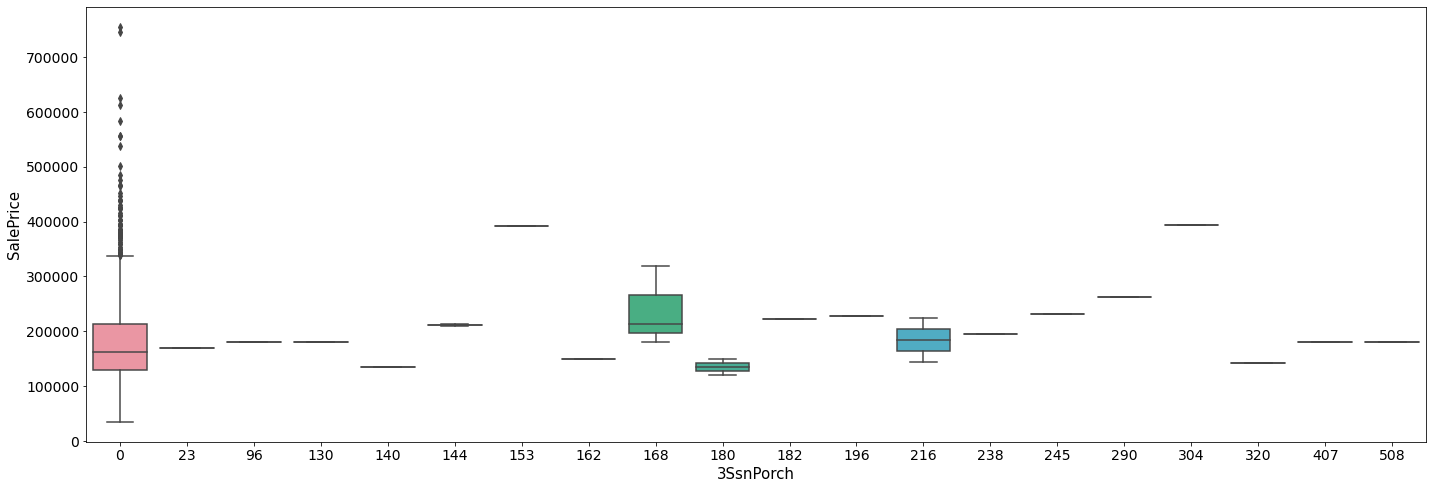

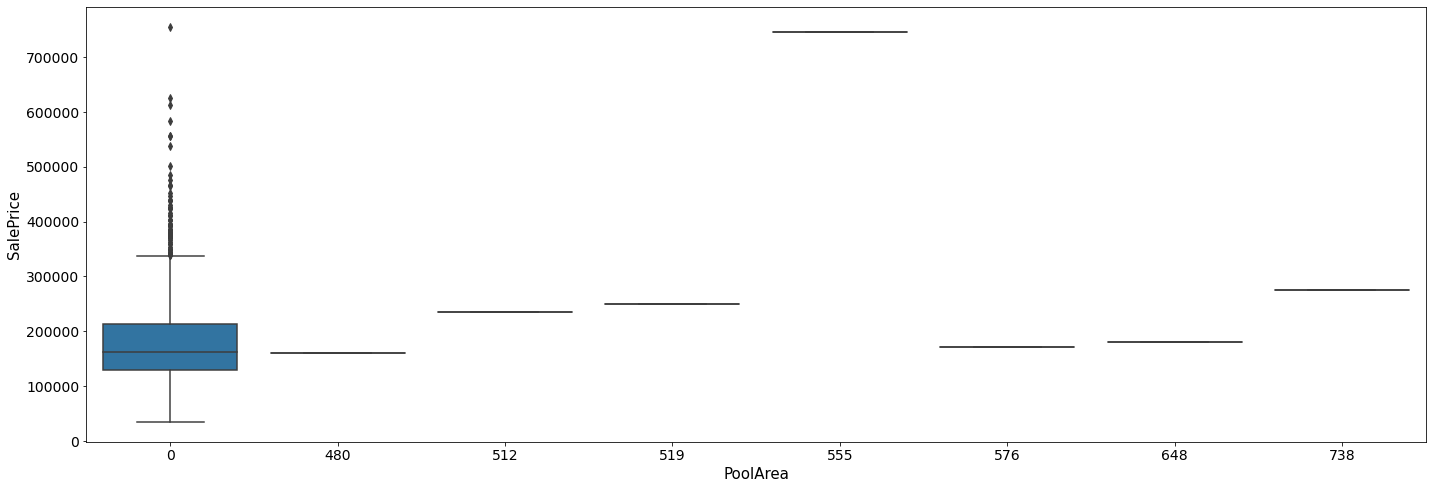

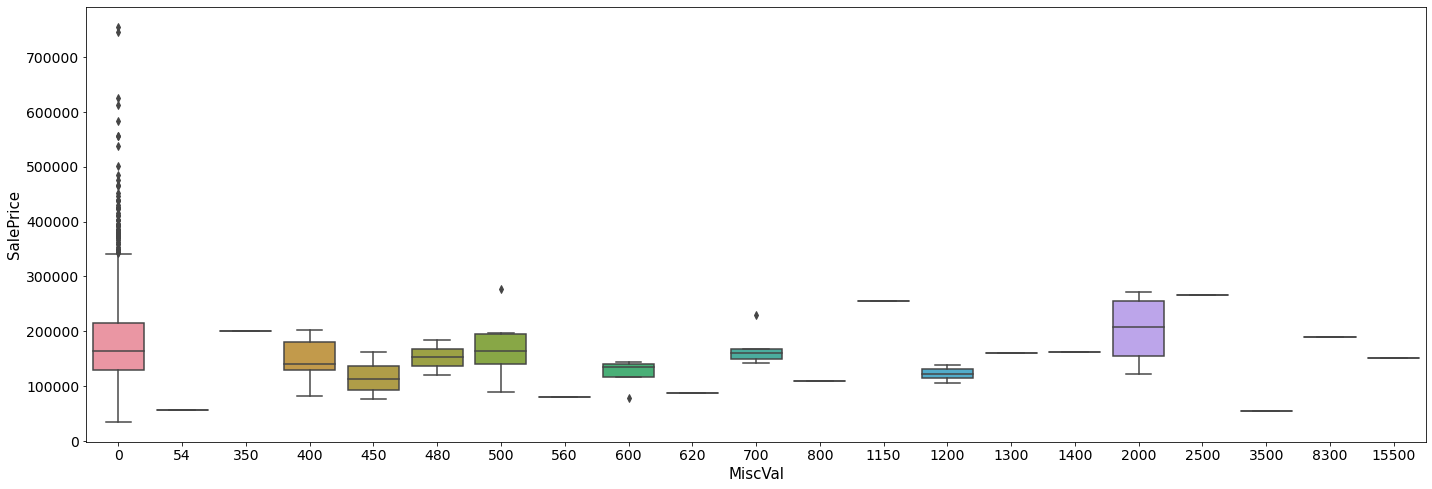

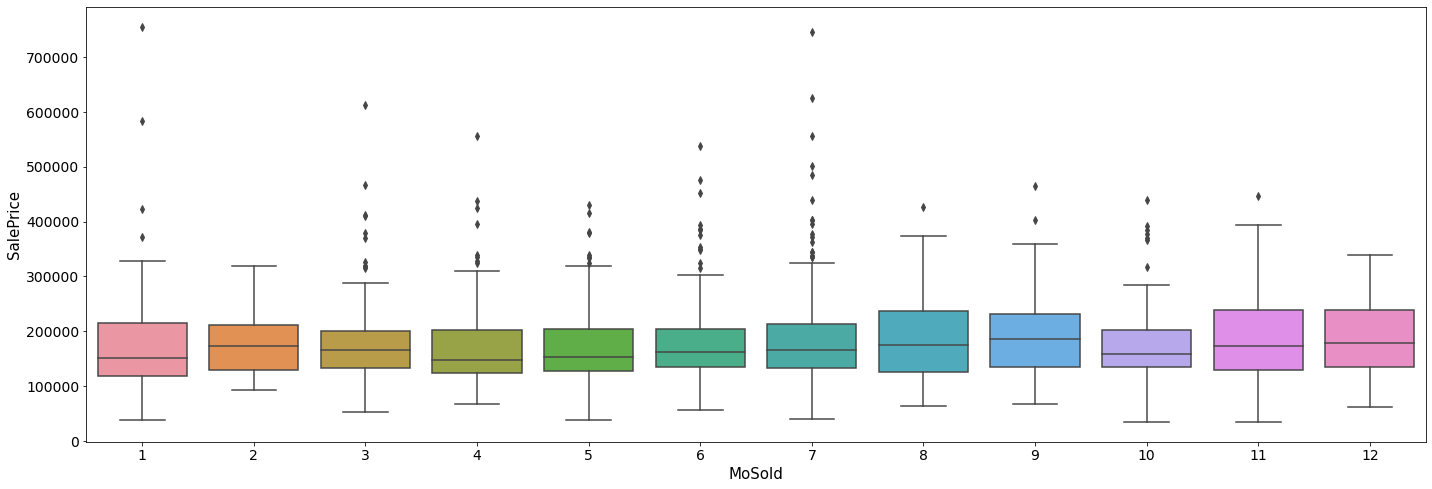

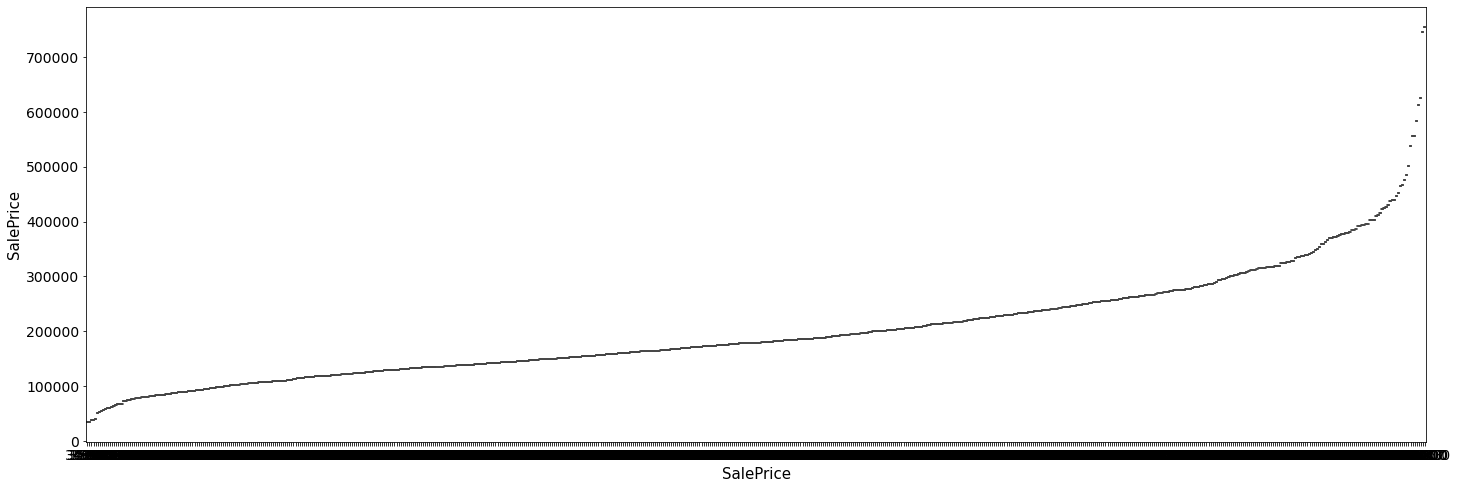

In [33]:
for feature in eda.numeric_discrete(data).columns:
    plt.figure(figsize=(24,8))
    sns.boxplot(data=data, x=feature, y='SalePrice')
    plt.tick_params(labelsize=14)
    plt.xlabel(feature, size=15)
    plt.ylabel('SalePrice', size=15);

### Visualizing the relationship between the continous features and the SalePrice

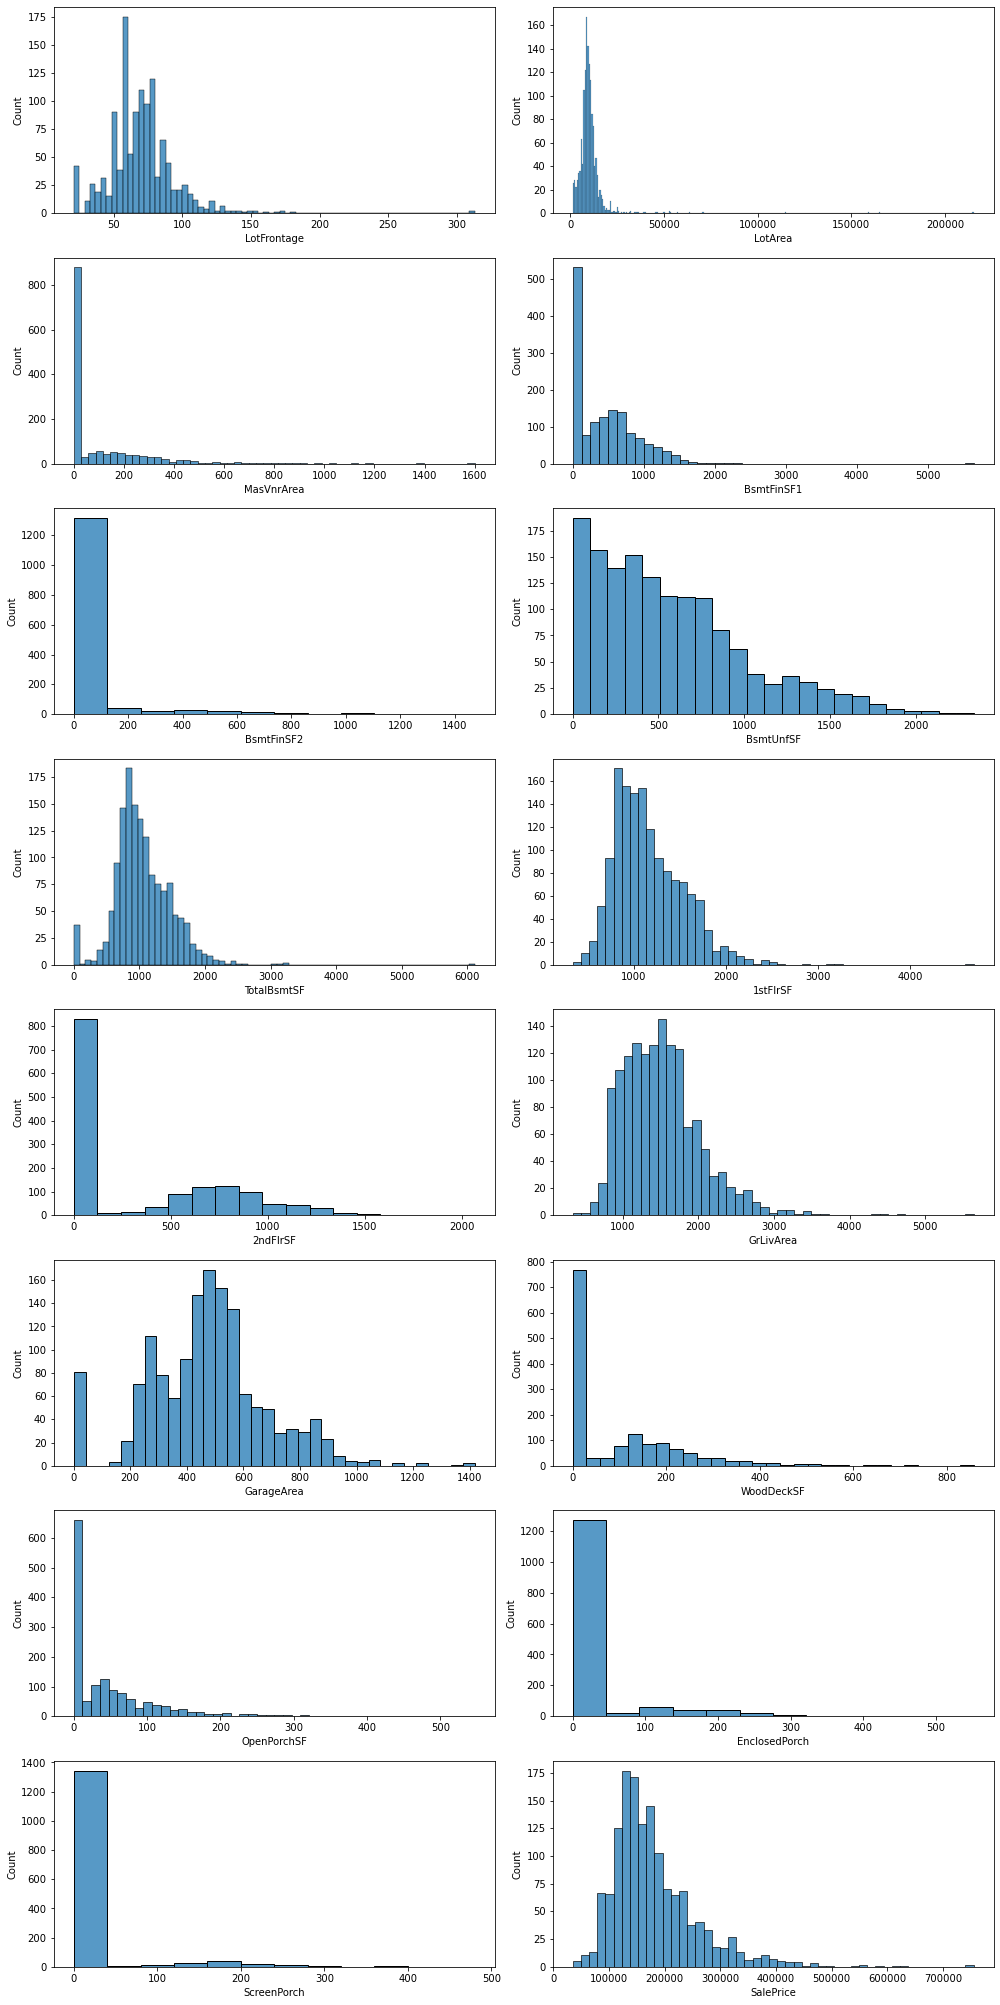

In [12]:
eda.continous_histplot(data)
     
    

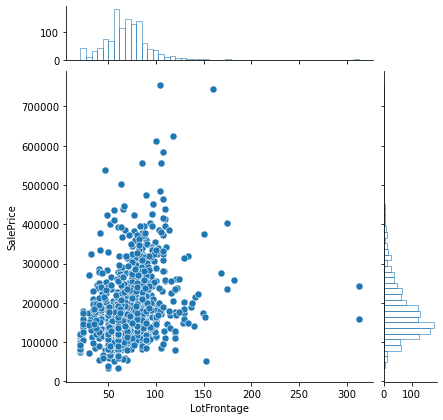

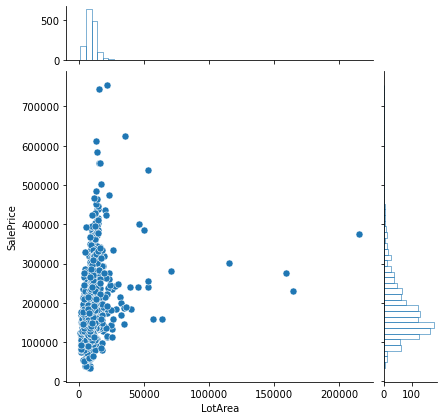

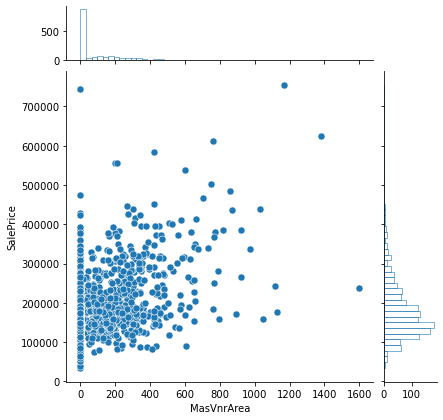

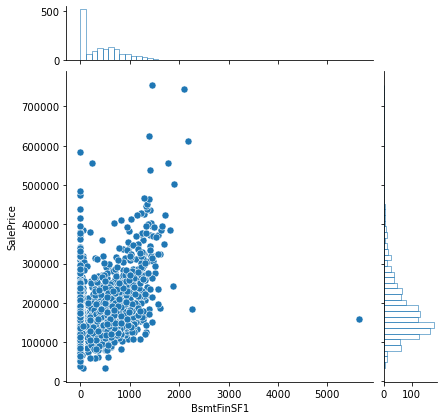

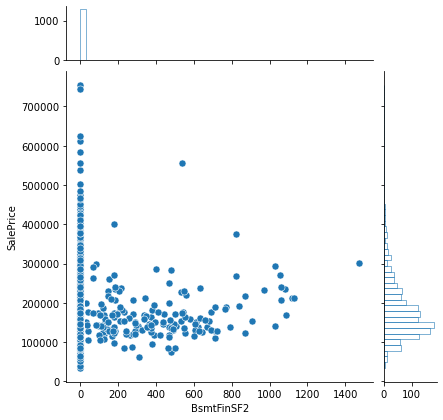

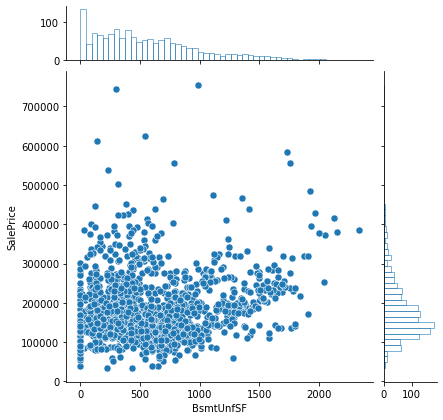

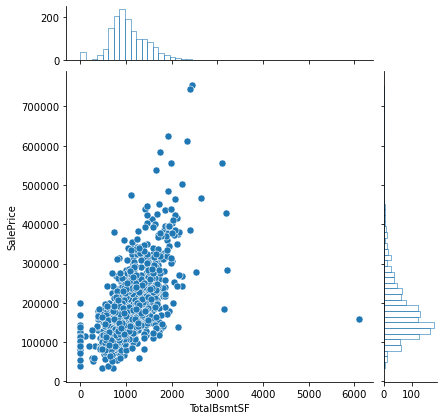

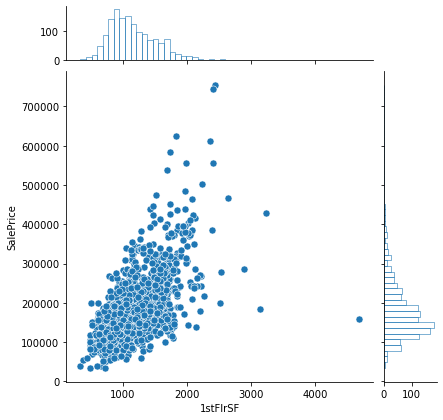

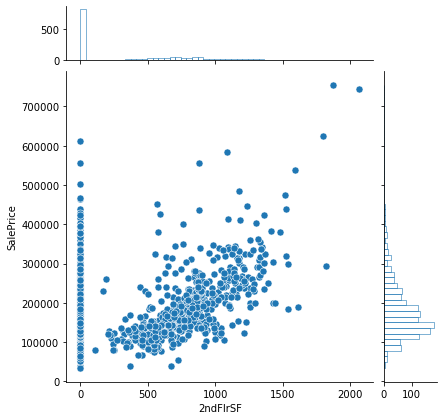

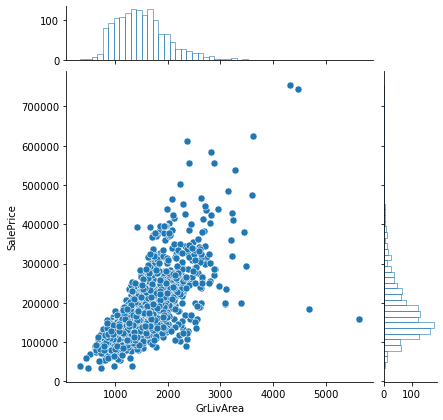

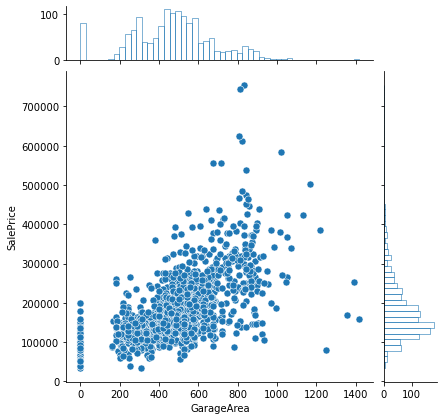

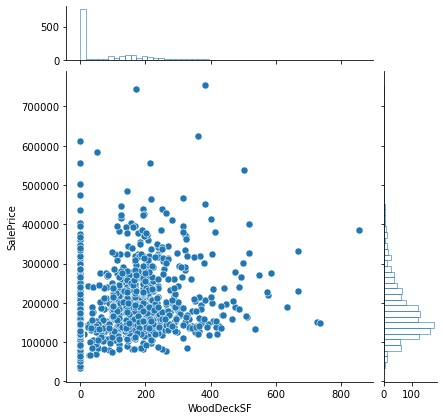

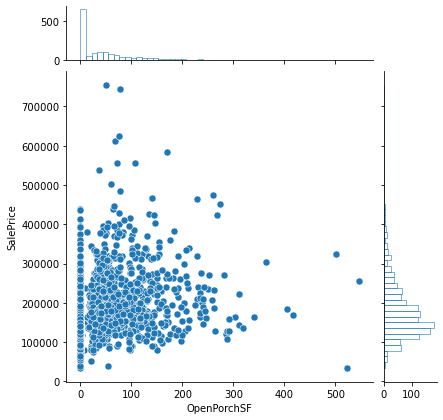

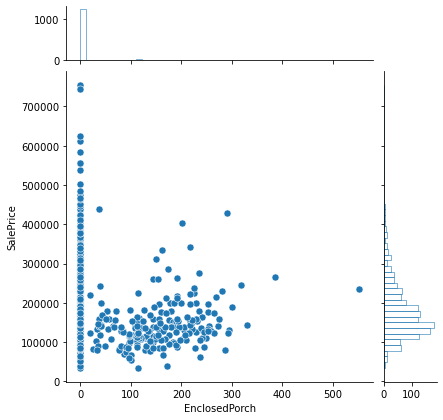

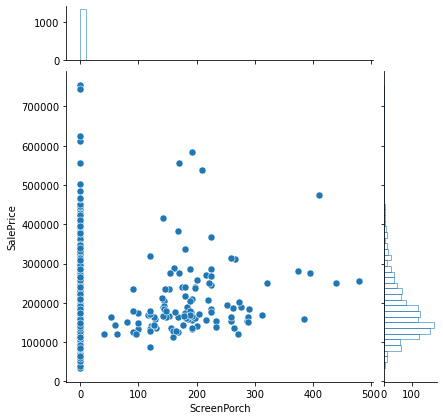

In [13]:
eda.continous_saleprice_plot(data)

## Apply log-transform to the continous features, and visualize them

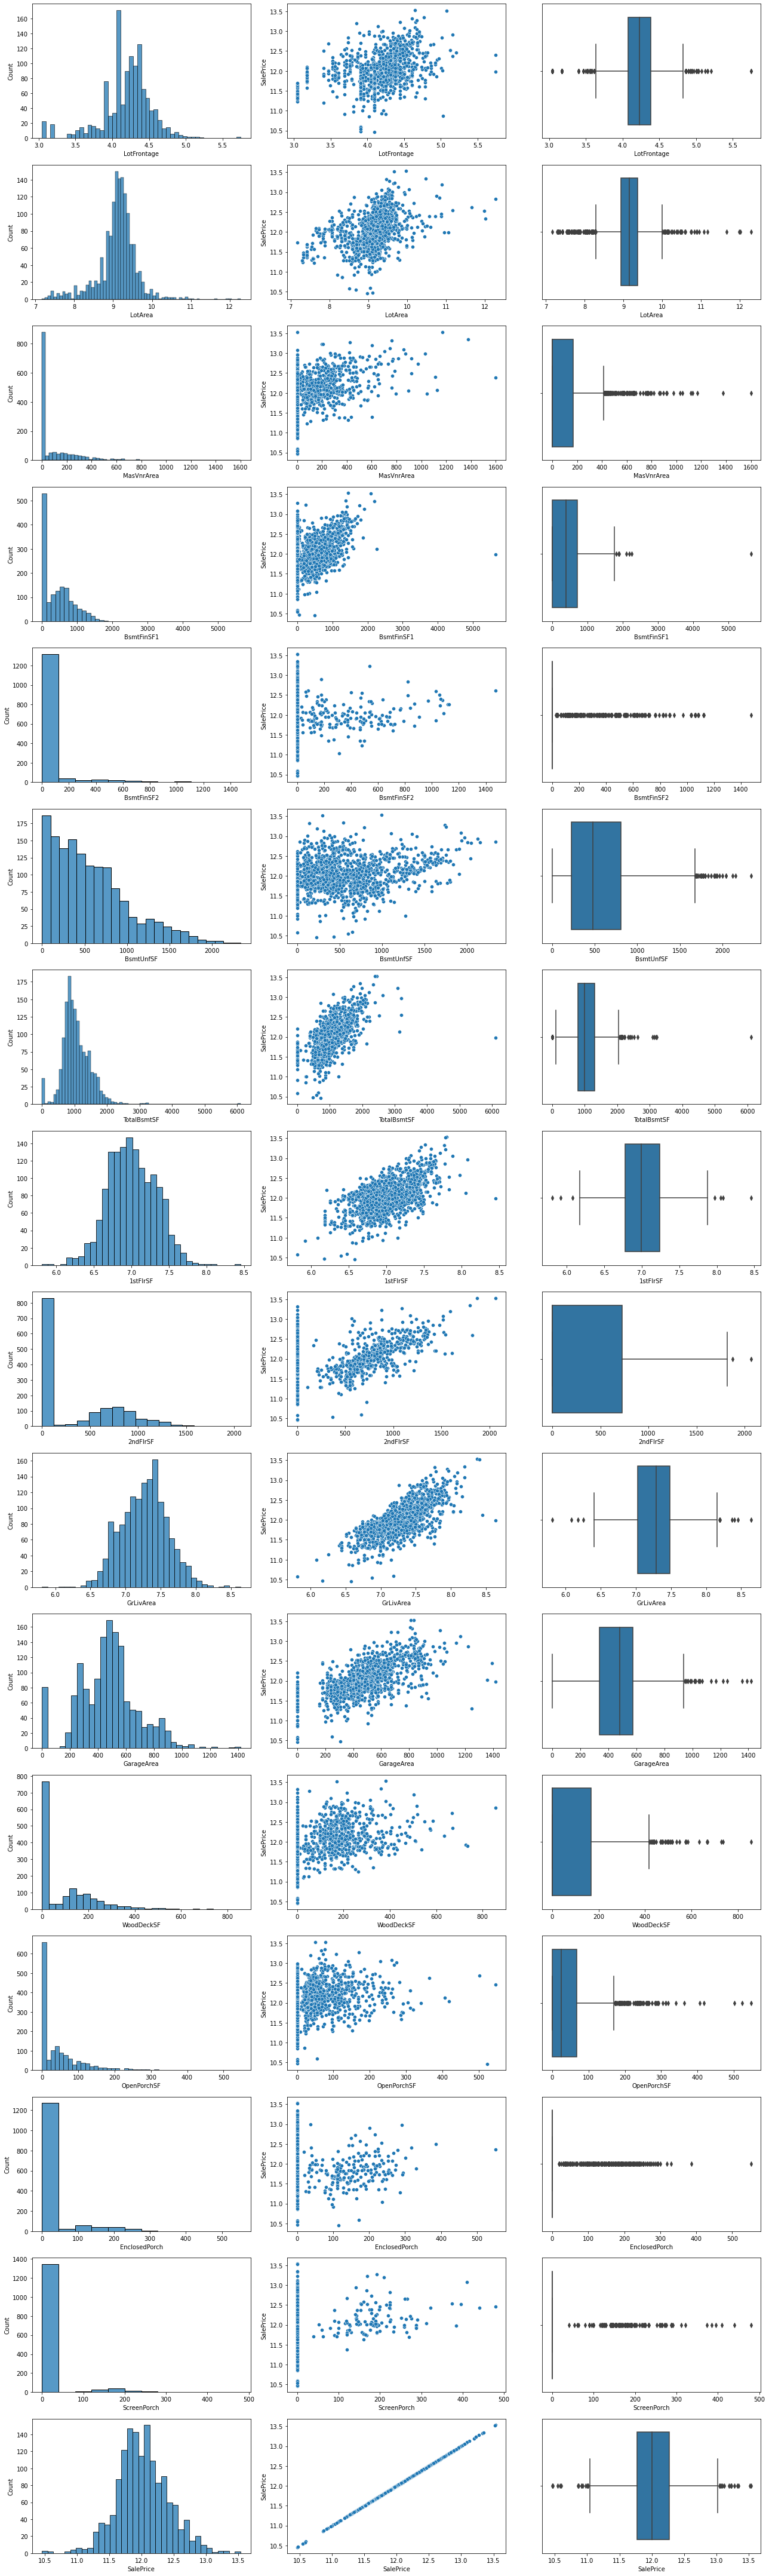

In [15]:
df = eda.numeric_continous(data)
n = len(df.columns)
df=df.apply(lambda x: eda.log_transform(x))
fig,axs=plt.subplots(n,3,figsize=(18,60))
for feature,i in zip(df.columns,list(range(n))):    
    sns.histplot(data=df,x=feature,ax=axs[i,0])
    sns.scatterplot(data=df,x=feature, y='SalePrice', ax=axs[i,1])
    sns.boxplot(data=df, x=feature, ax=axs[i,2])
    
fig.tight_layout()

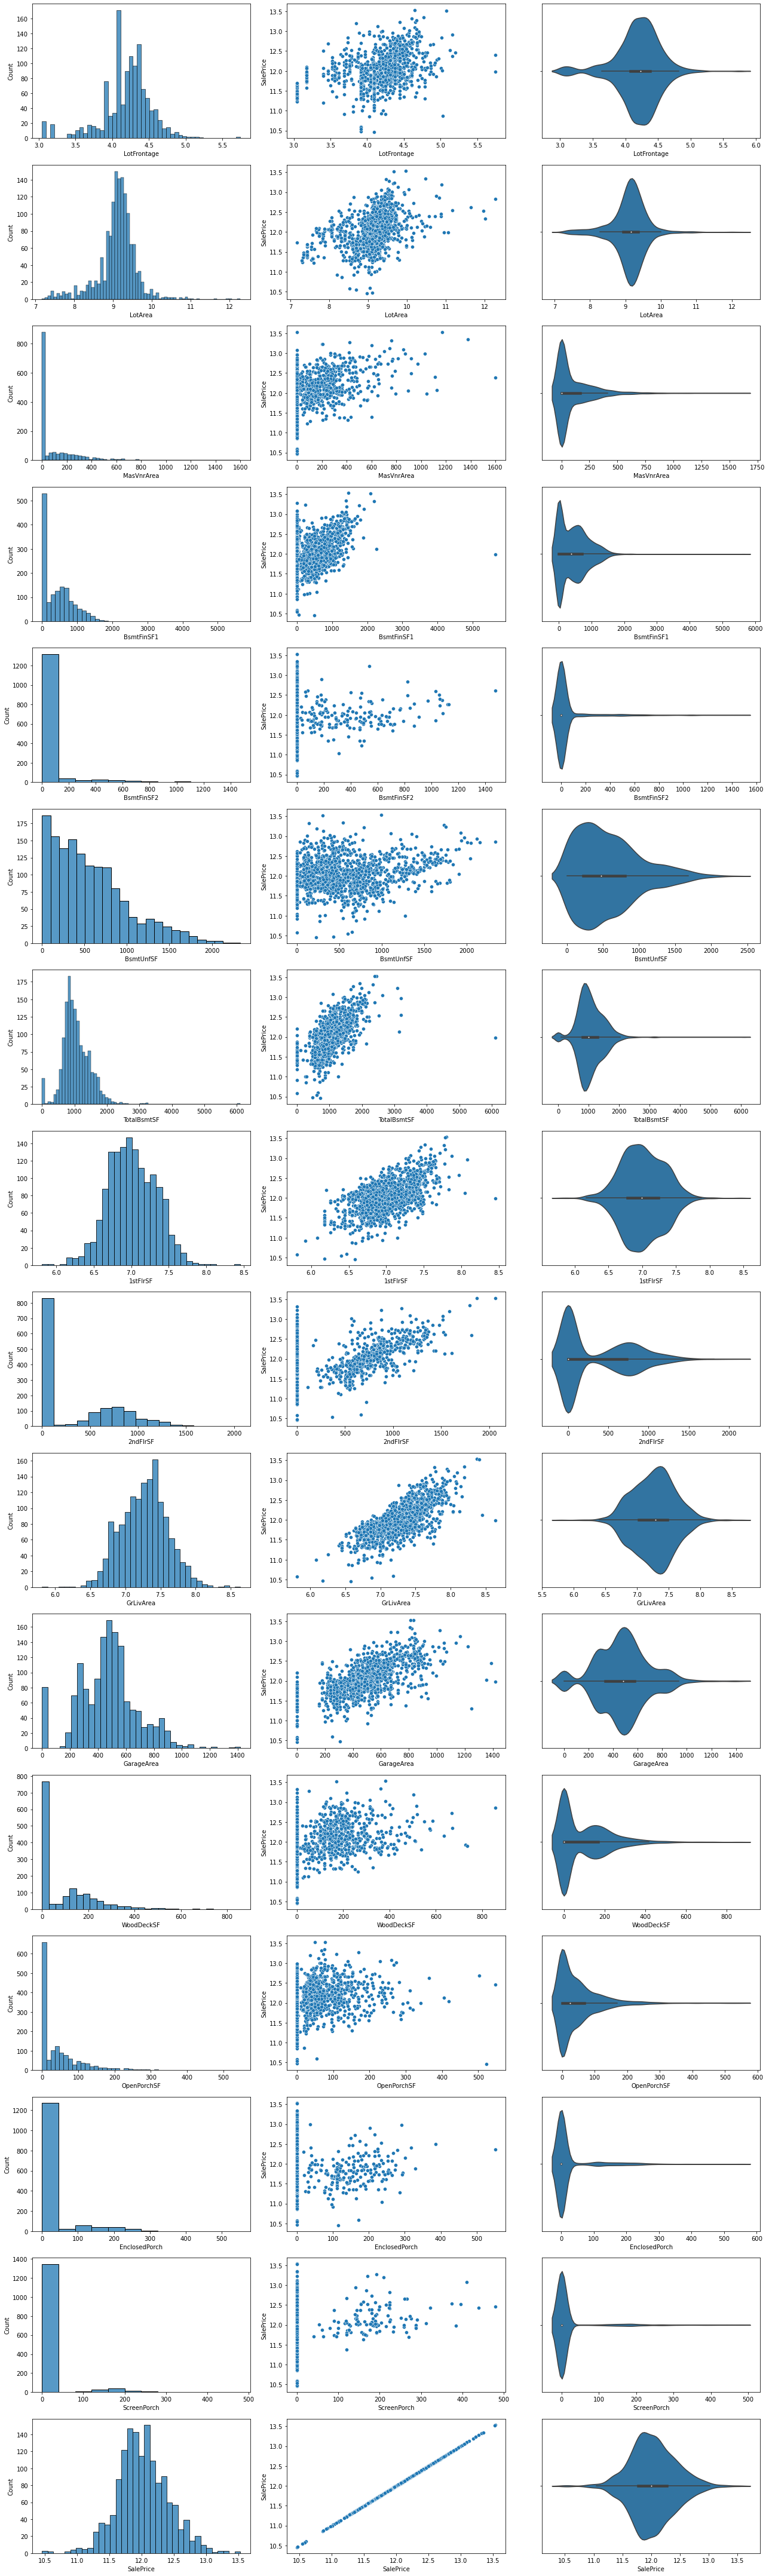

In [16]:
fig,axs=plt.subplots(n,3,figsize=(18,60))
for feature,i in zip(df.columns,list(range(n))):    
    sns.histplot(data=df,x=feature,ax=axs[i,0])
    sns.scatterplot(data=df,x=feature, y='SalePrice', ax=axs[i,1])
    sns.violinplot(data=df, x=feature, ax=axs[i,2])
    
fig.tight_layout()

# Categorical features

In [17]:
eda.categorical_data(data,include_target_var=False).head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [3]:
eda.cat_features_uniques(data)

Feature name: MSZoning
	 Number of unique values:5
	 Unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Feature name: Street
	 Number of unique values:2
	 Unique values: ['Pave' 'Grvl']

Feature name: Alley
	 Number of unique values:2
	 Unique values: [nan 'Grvl' 'Pave']

Feature name: LotShape
	 Number of unique values:4
	 Unique values: ['Reg' 'IR1' 'IR2' 'IR3']

Feature name: LandContour
	 Number of unique values:4
	 Unique values: ['Lvl' 'Bnk' 'Low' 'HLS']

Feature name: Utilities
	 Number of unique values:2
	 Unique values: ['AllPub' 'NoSeWa']

Feature name: LotConfig
	 Number of unique values:5
	 Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Feature name: LandSlope
	 Number of unique values:3
	 Unique values: ['Gtl' 'Mod' 'Sev']

Feature name: Neighborhood
	 Number of unique values:25
	 Unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilb

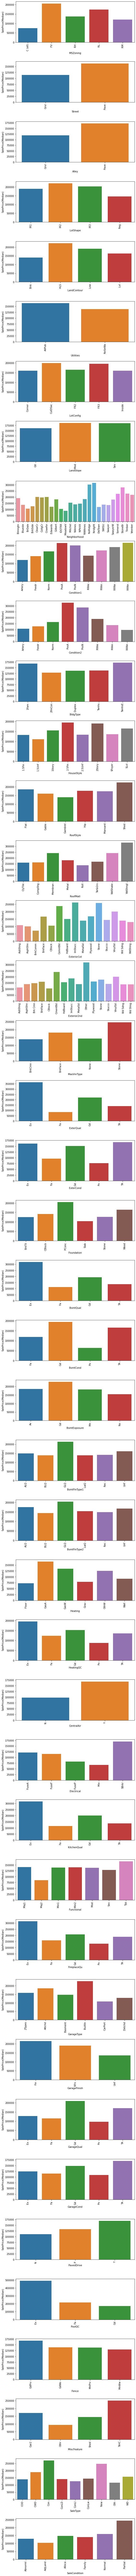

In [5]:
df = eda.categorical_data(data,include_target_var=True)
n = len(df.columns)-1
fig,axs=plt.subplots(n,1,figsize=(8,150))
for feature,ax in zip(df.drop('SalePrice',axis=1).columns,axs.flat):    
    sns.barplot(data=df.groupby(feature)['SalePrice'].median().reset_index(),
            x=feature, y = 'SalePrice',ax=ax)
    ax.set_ylabel('SalePrice(Median)')   
    ax.tick_params(axis='x', labelrotation = 90)
#plt.xticks(rotation=90)    
fig.tight_layout()


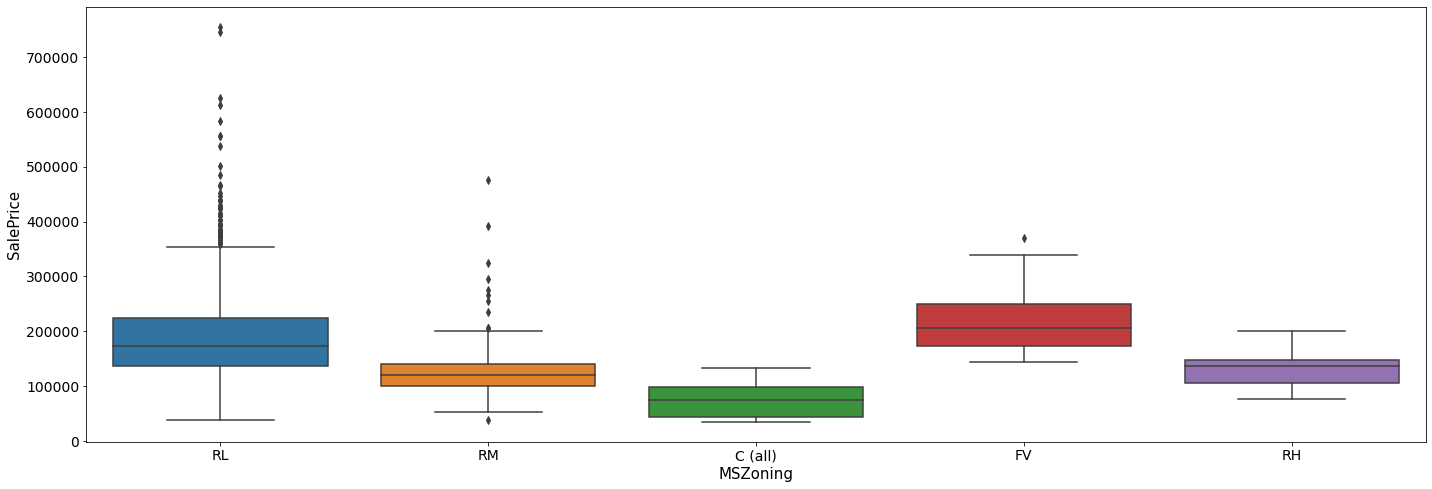

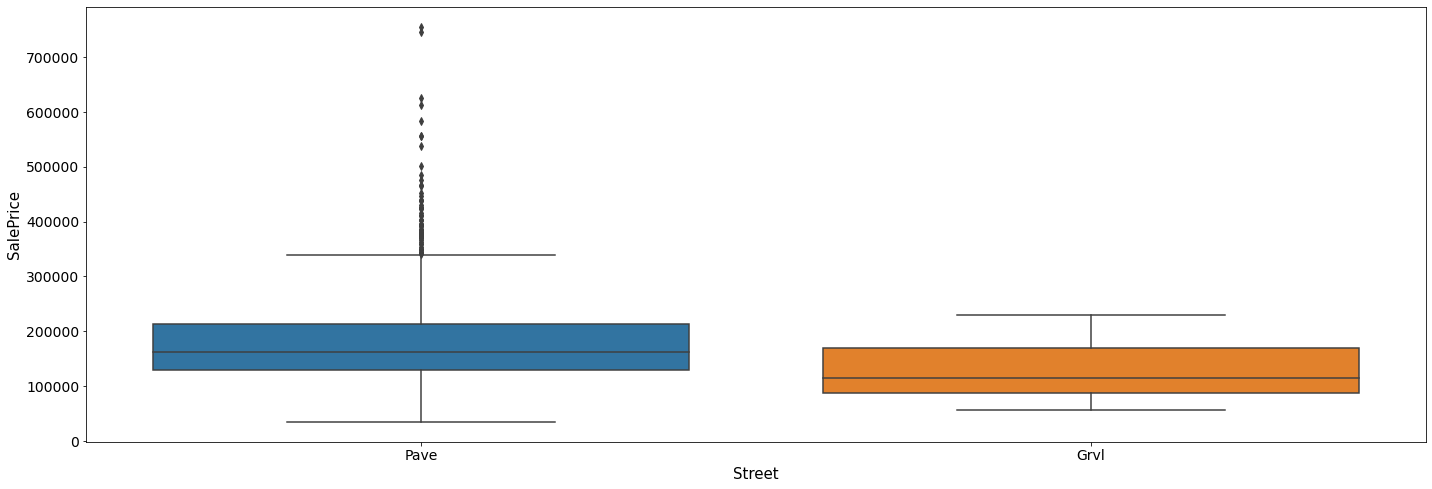

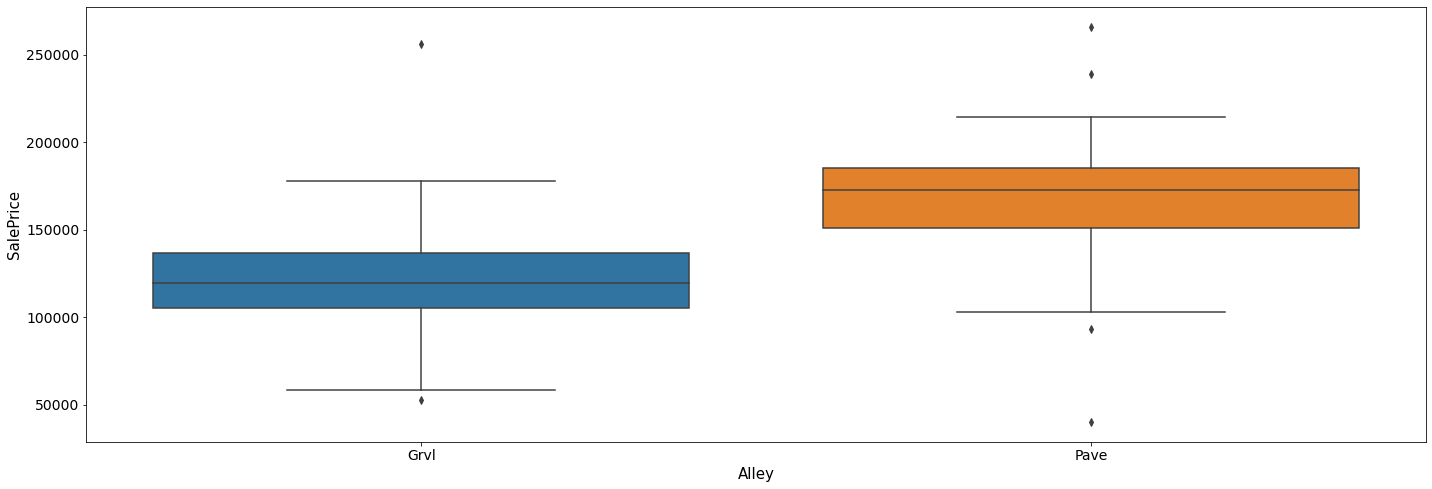

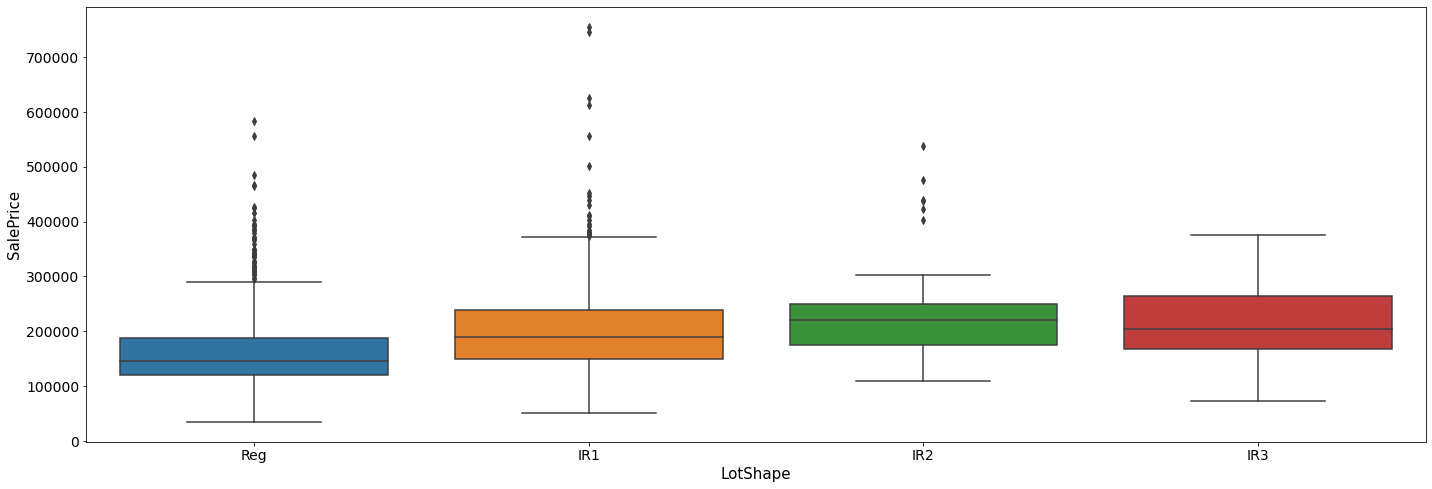

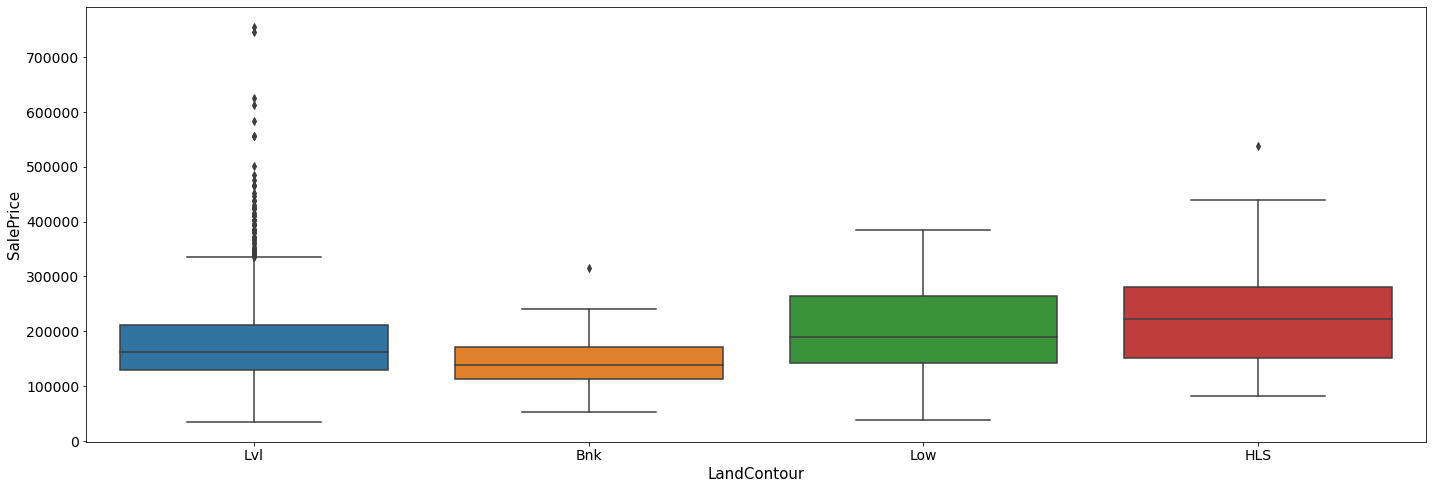

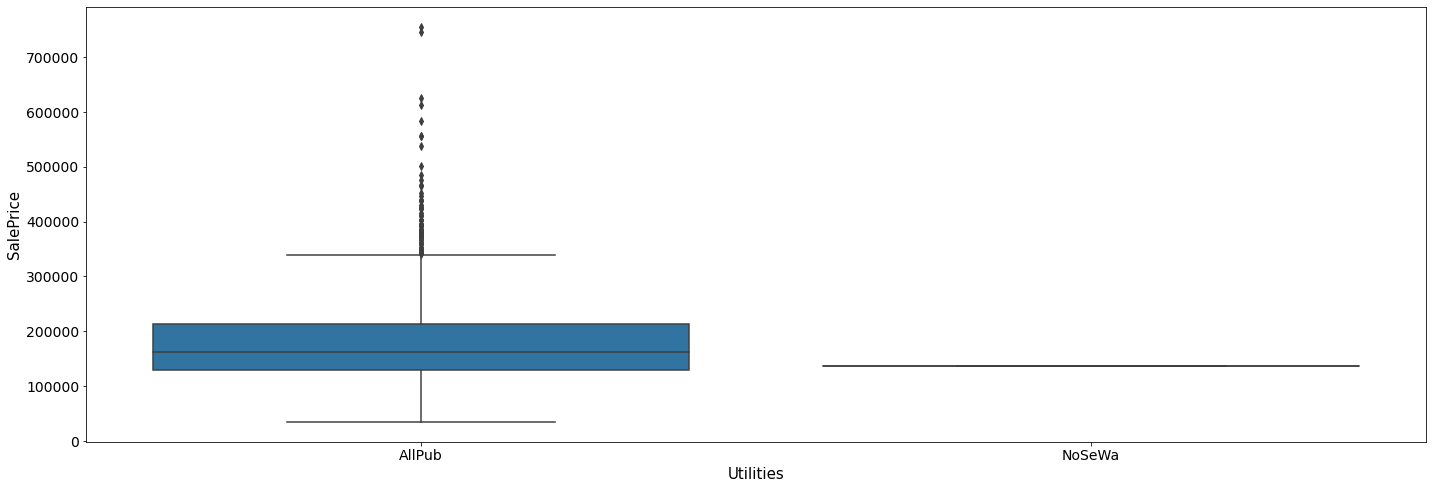

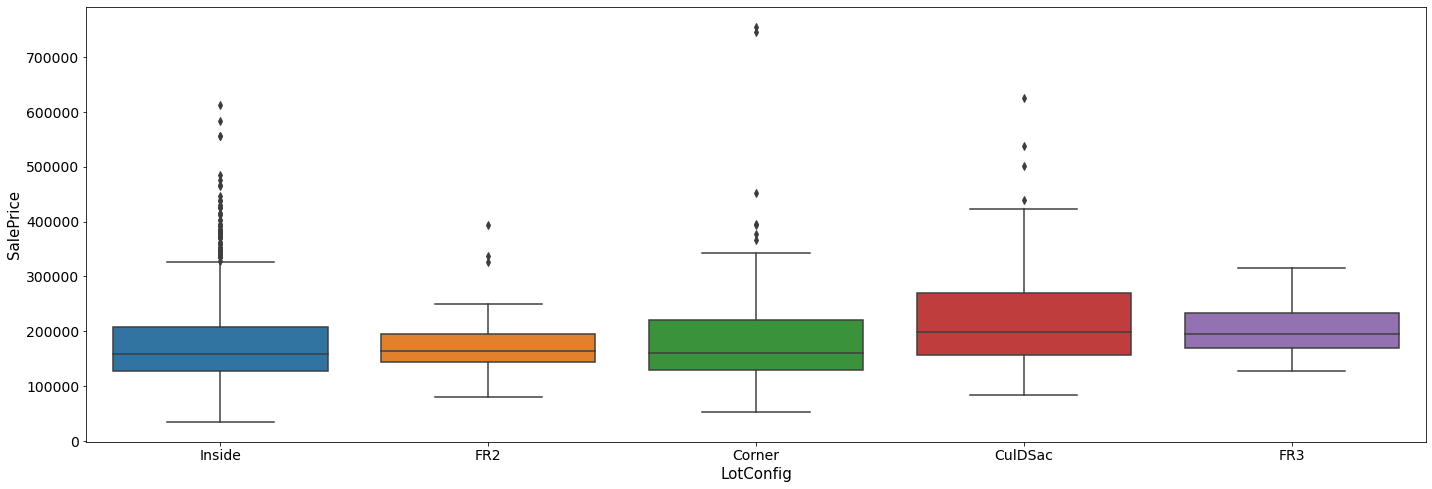

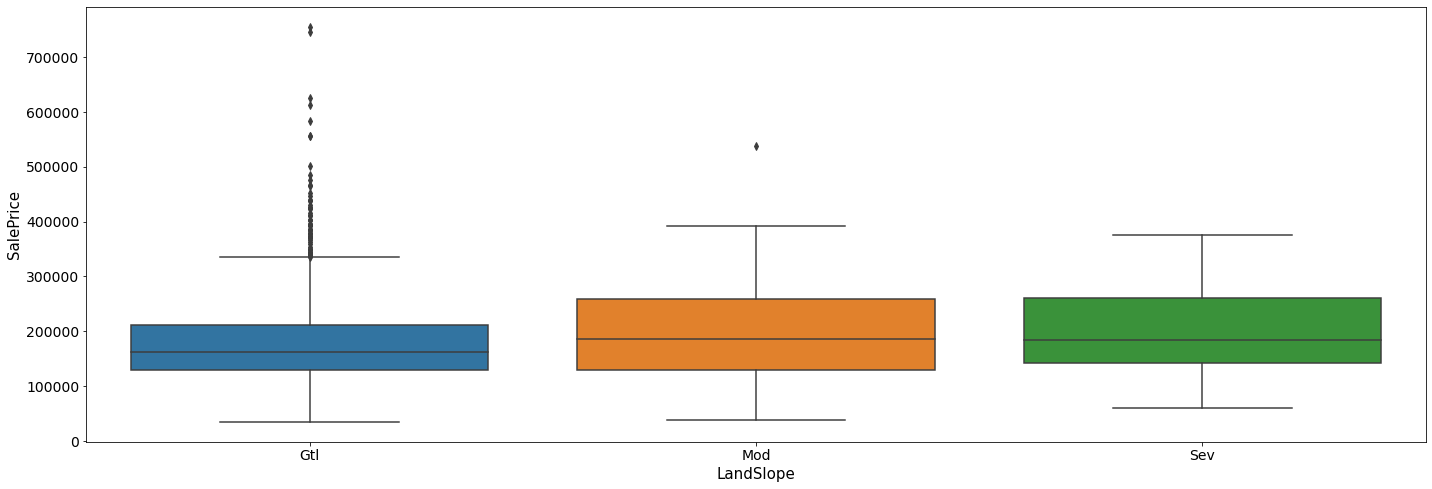

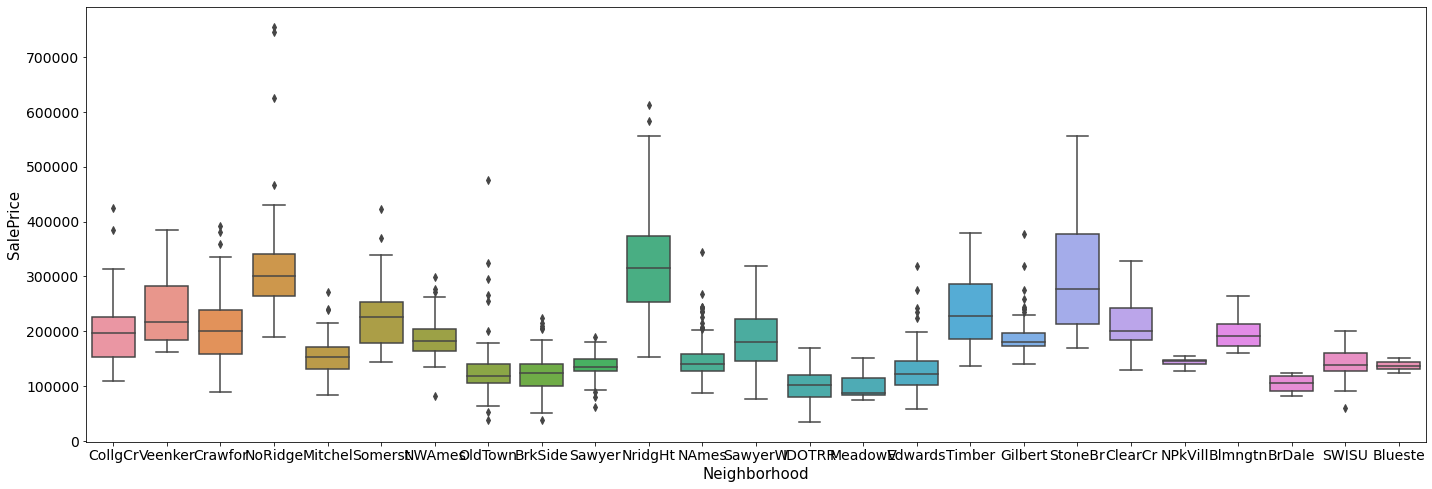

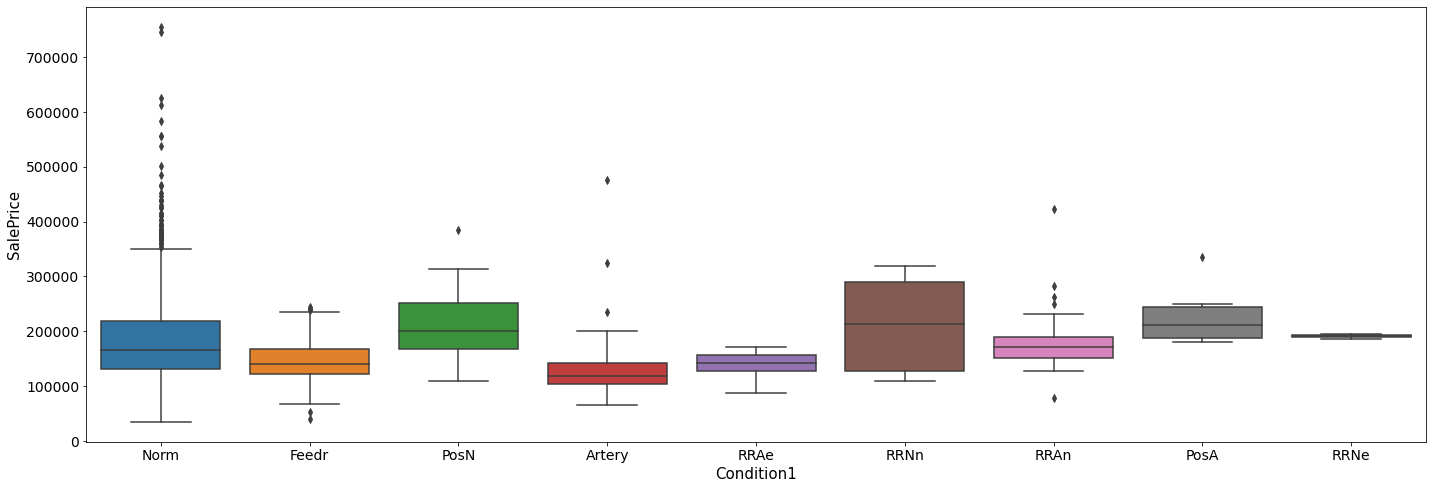

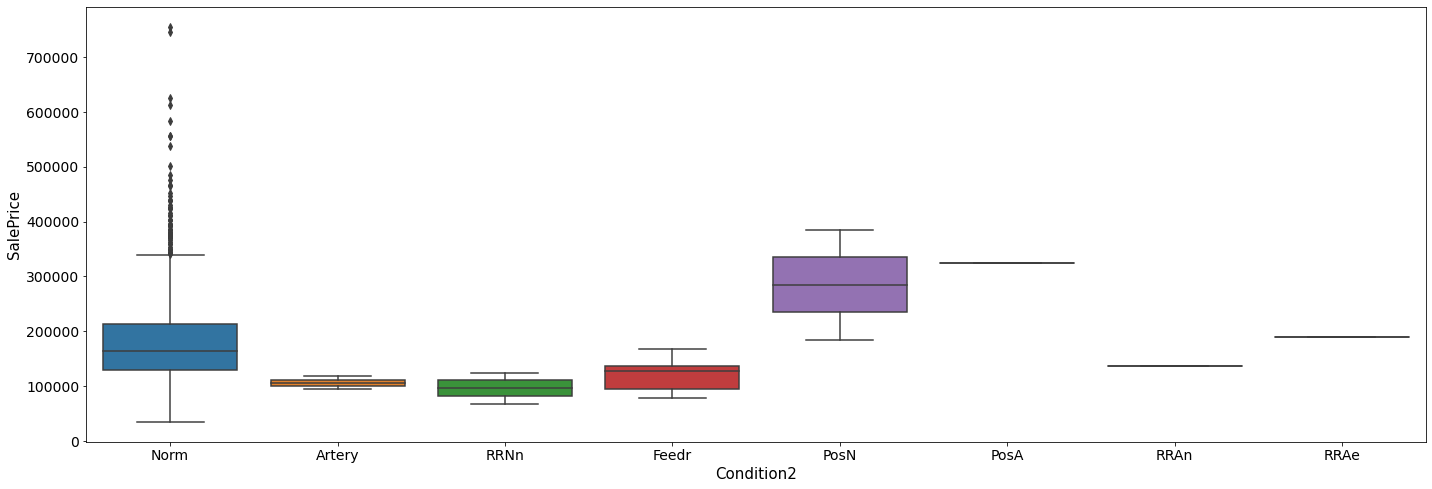

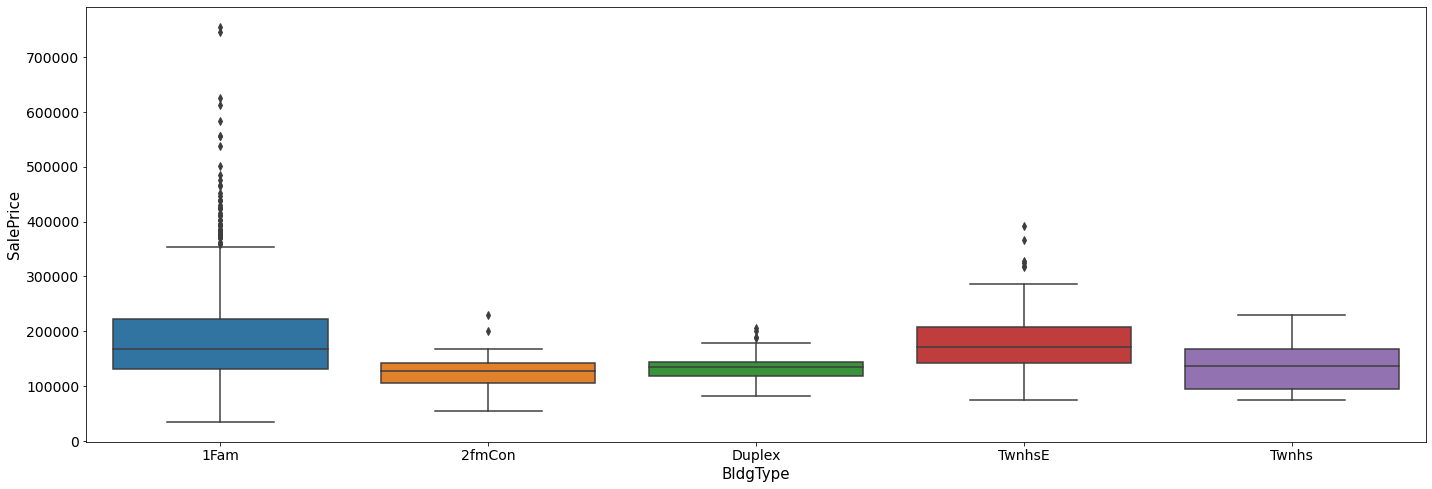

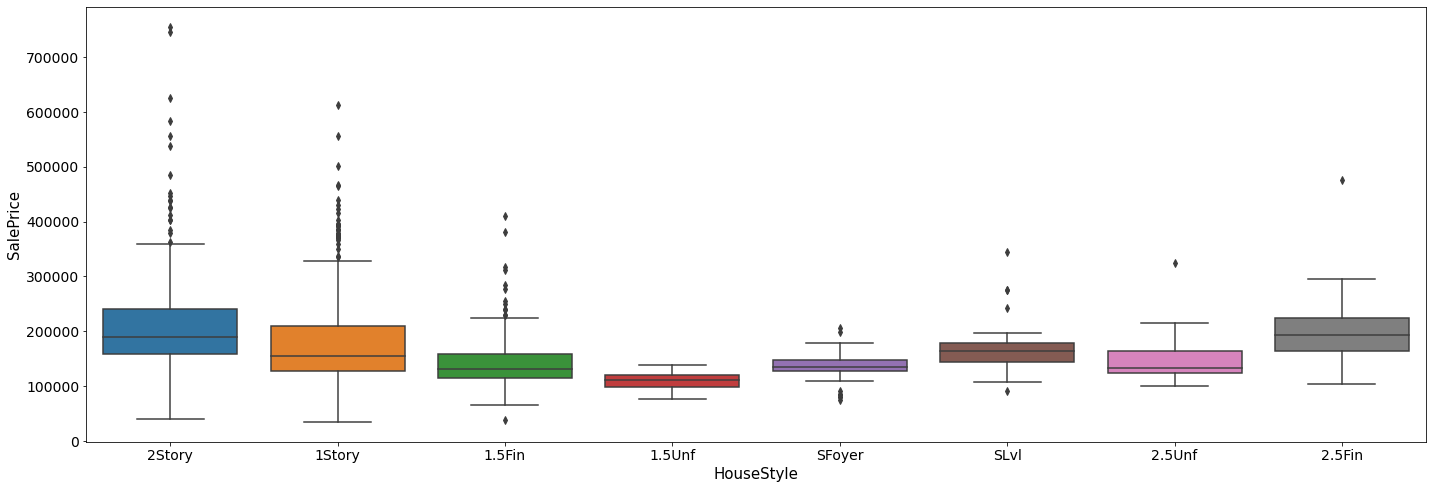

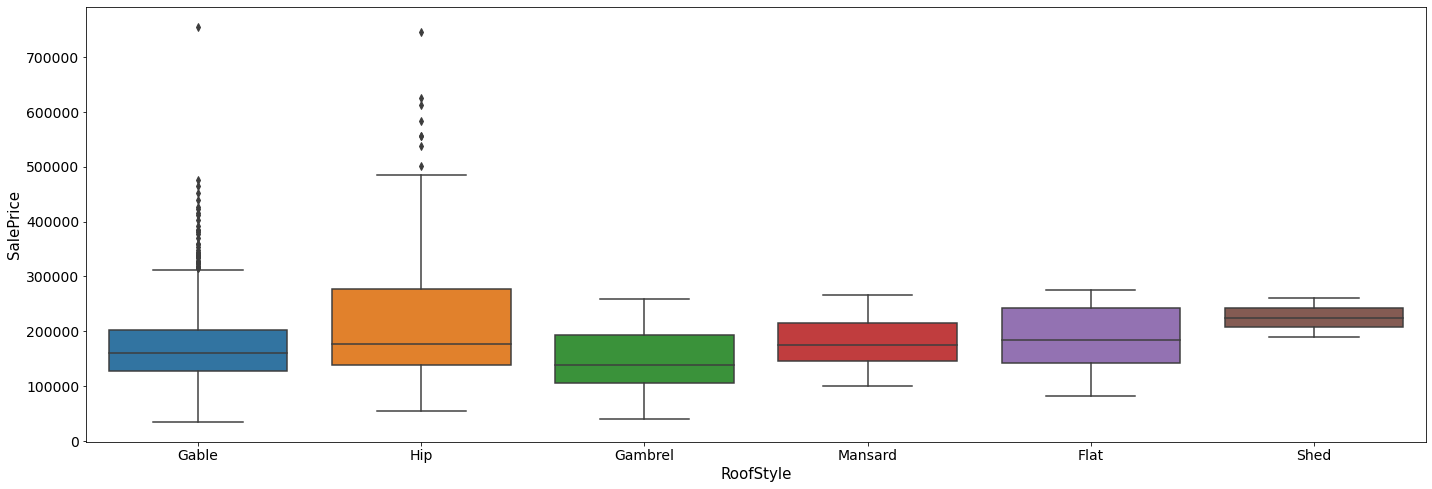

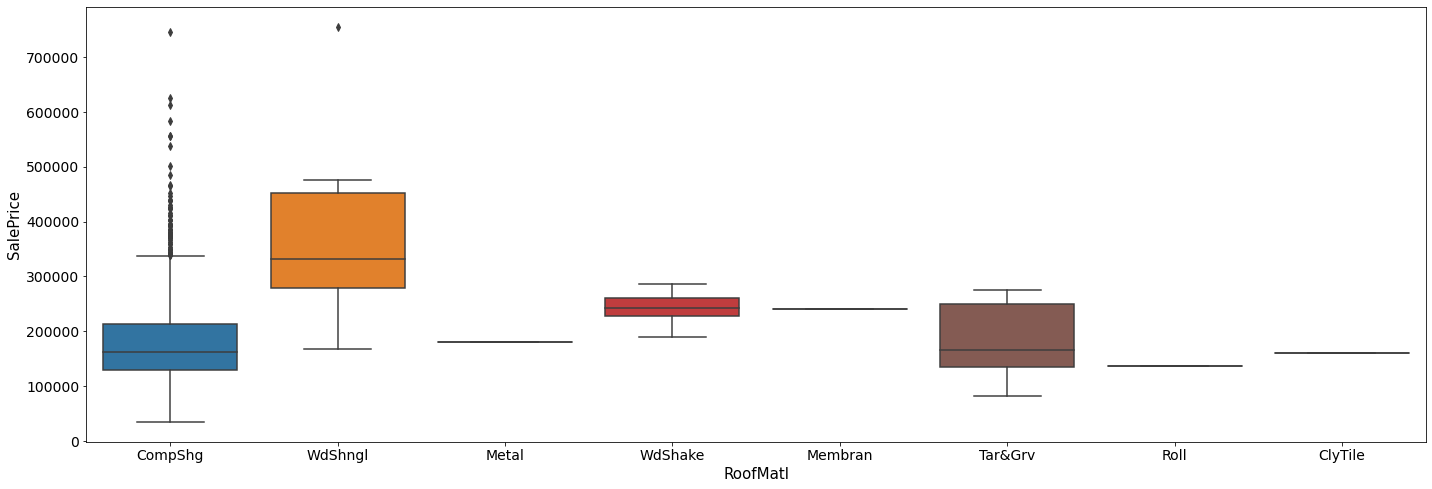

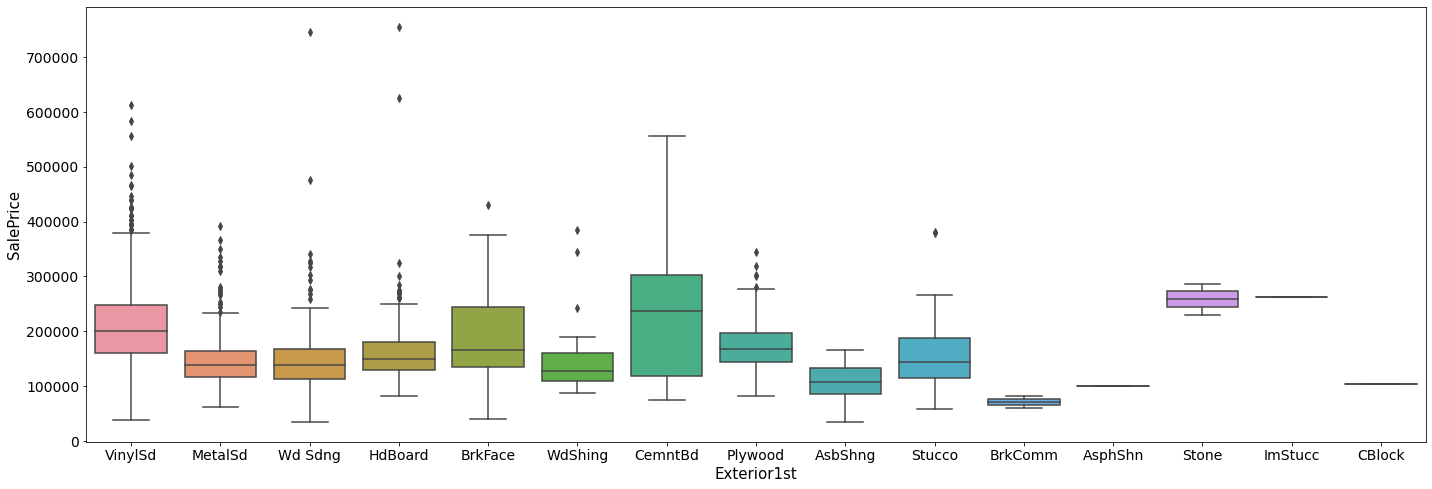

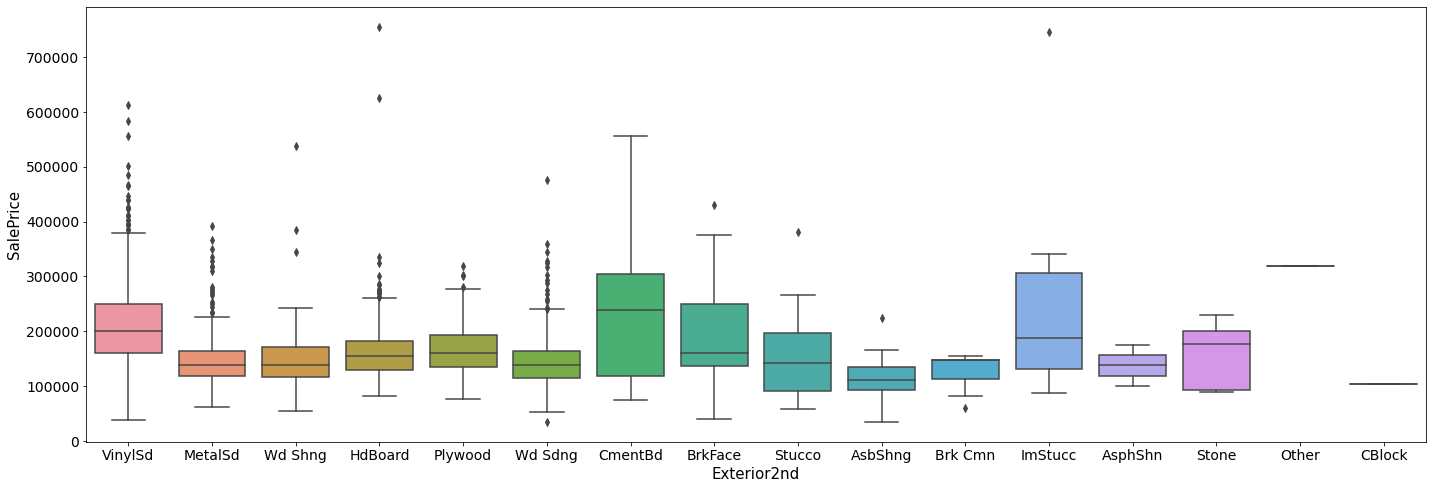

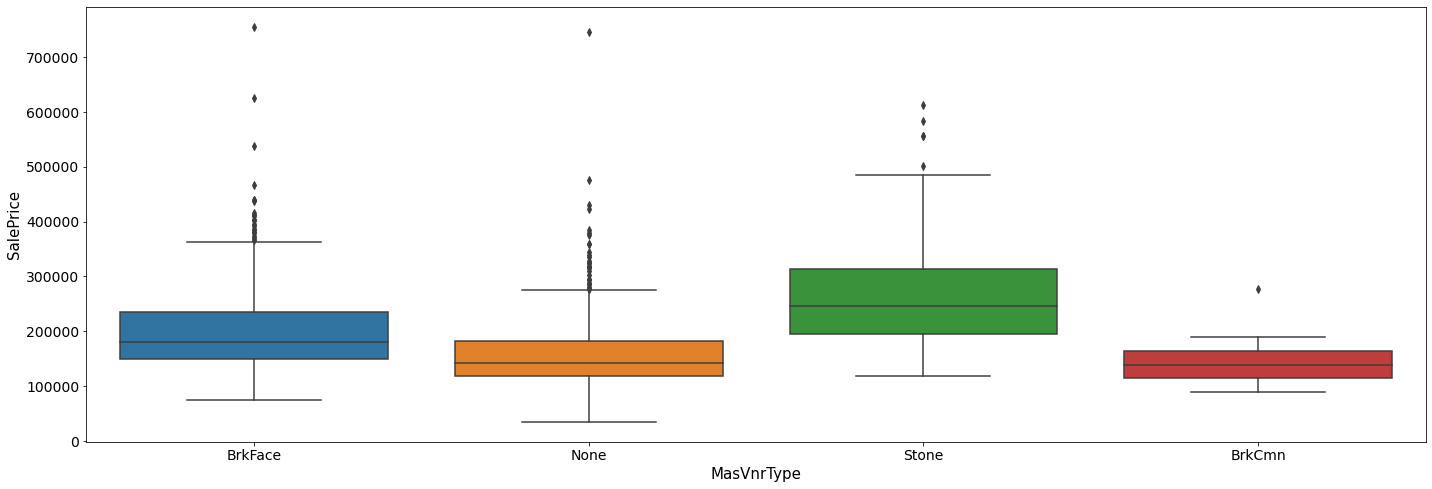

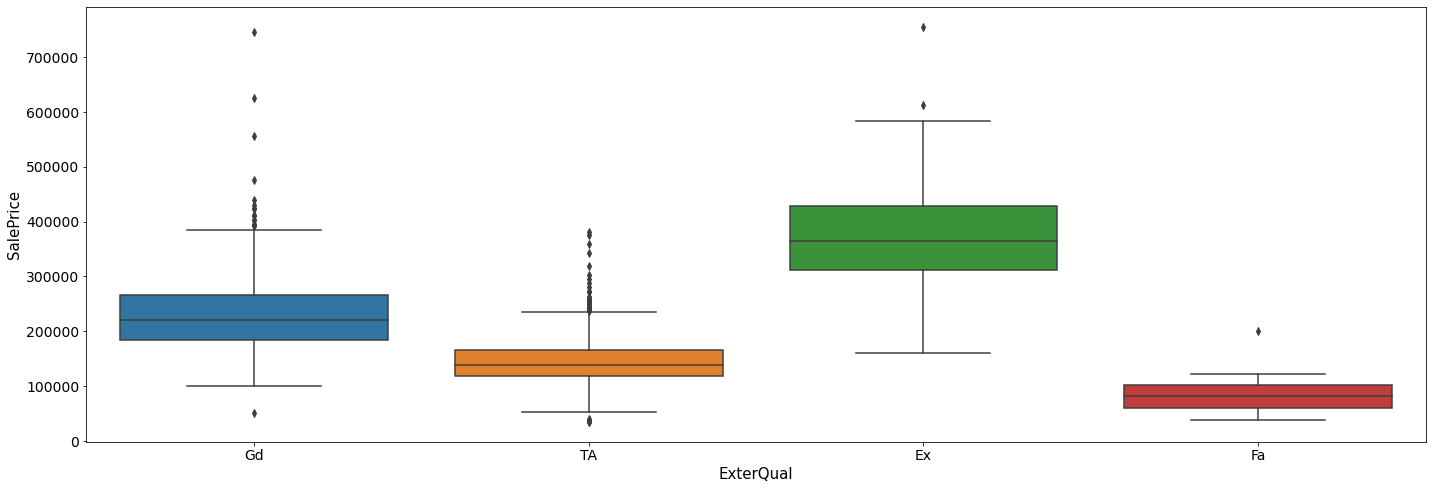

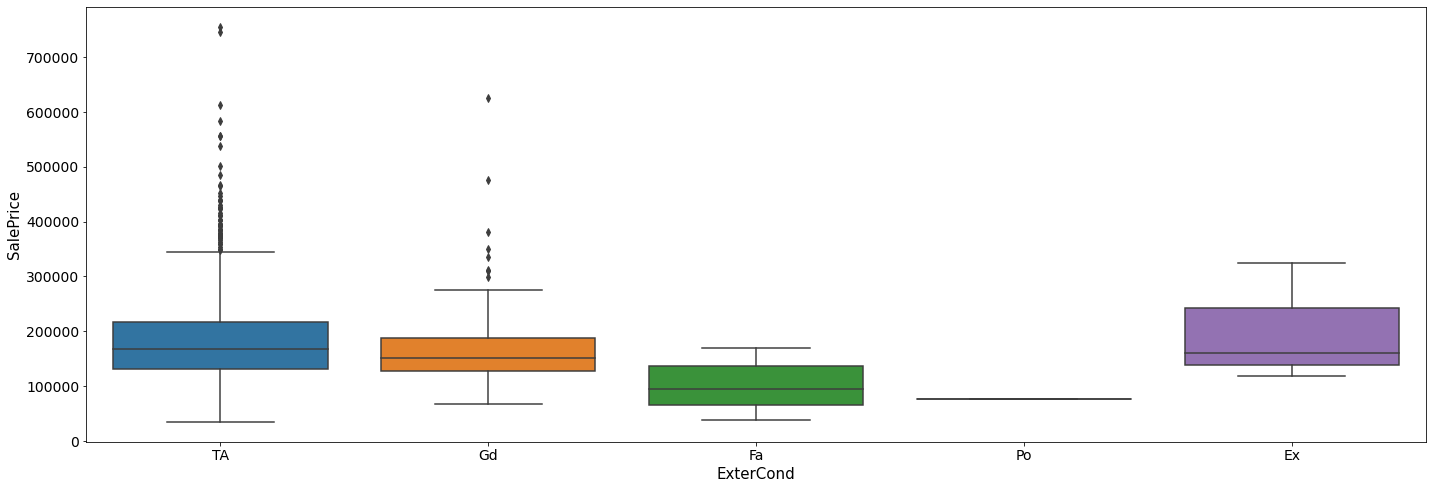

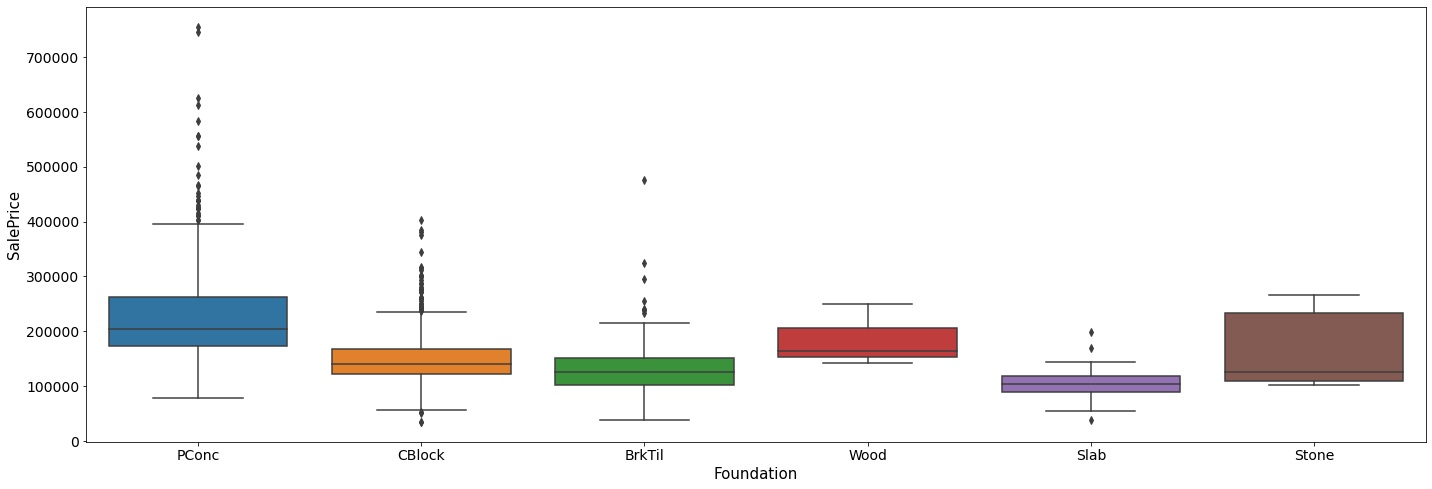

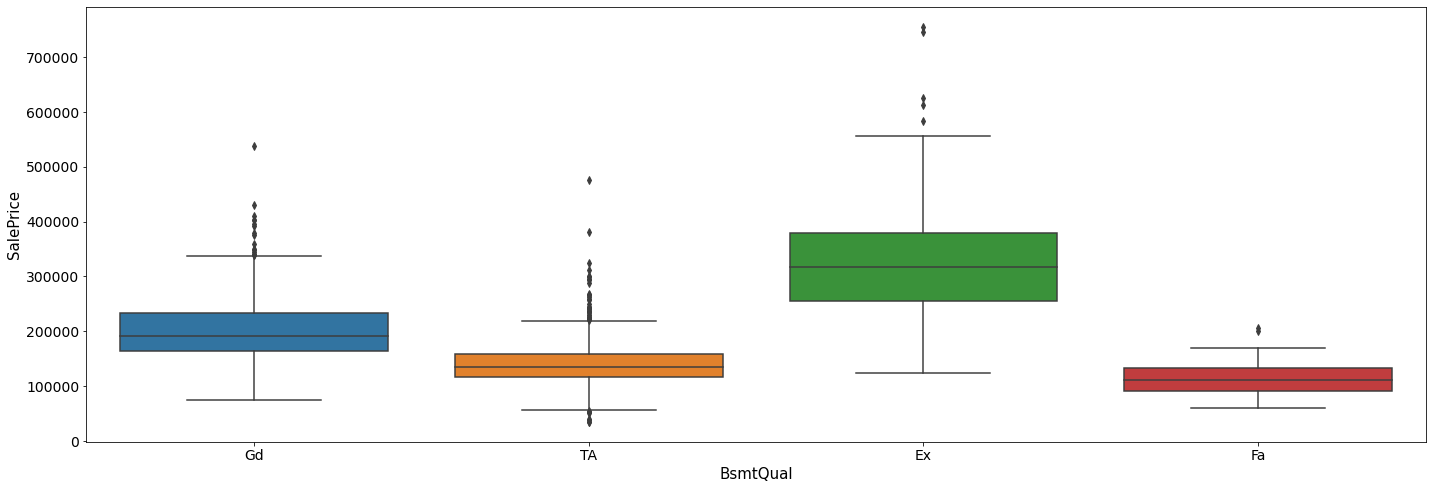

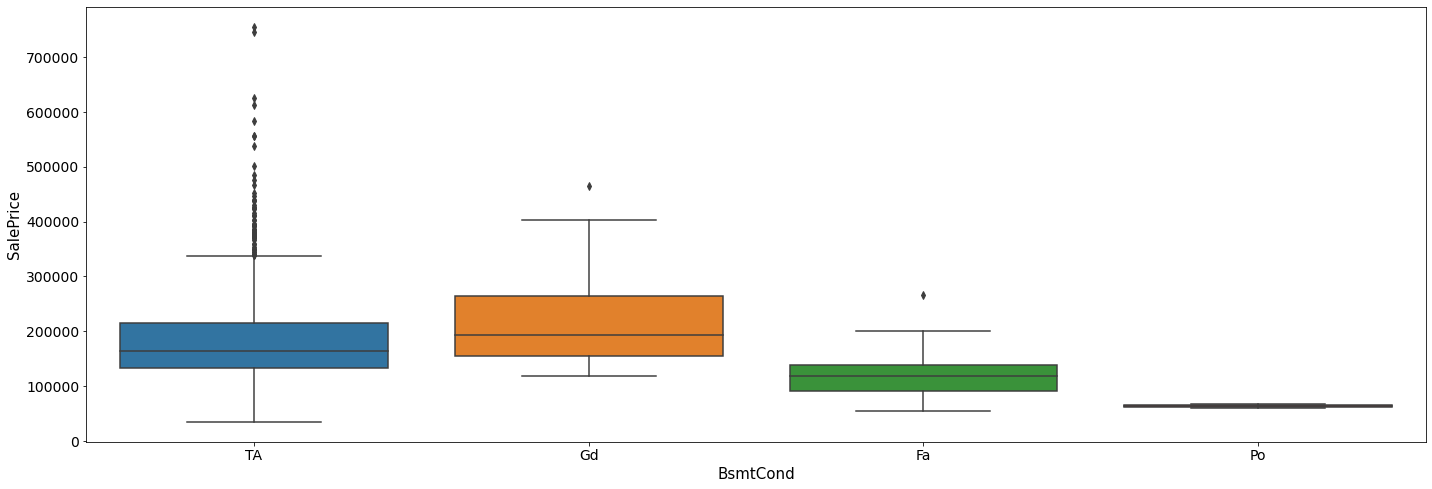

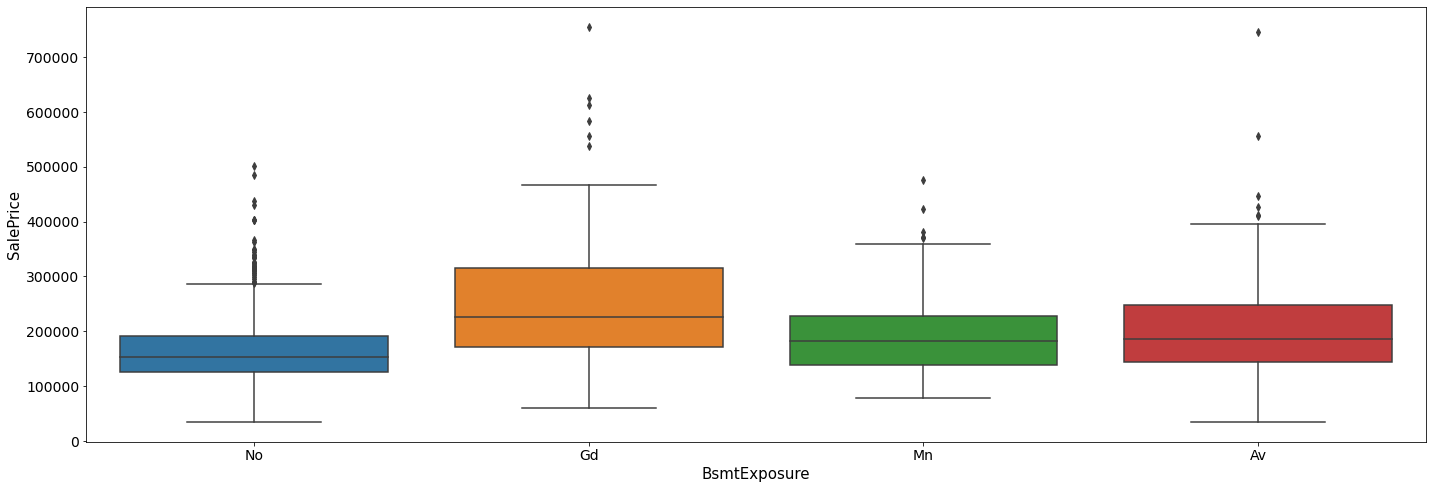

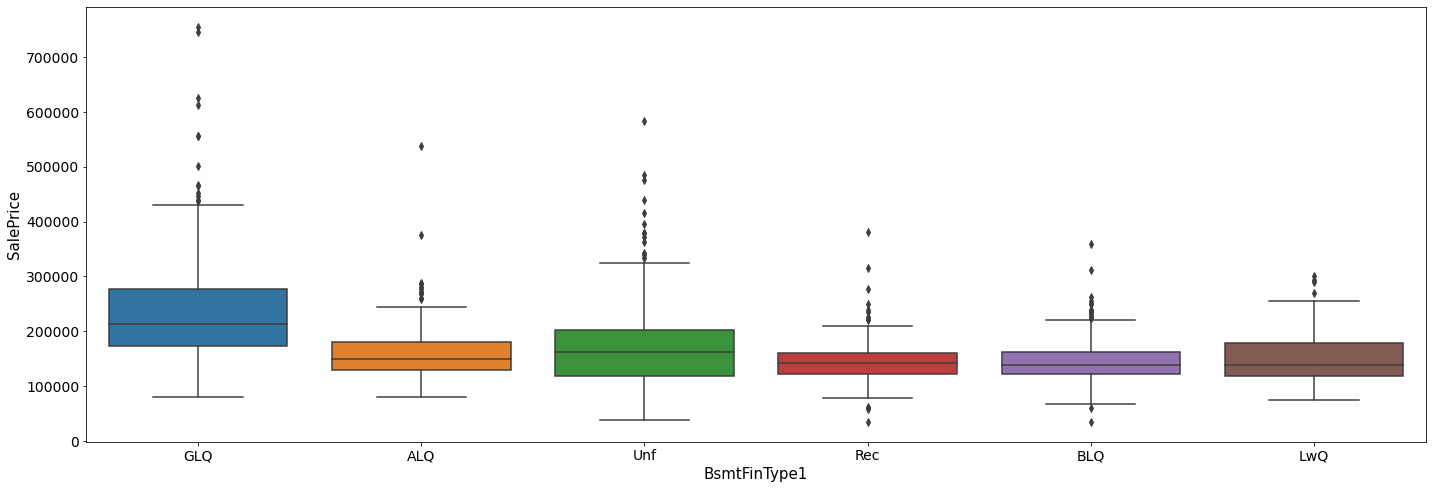

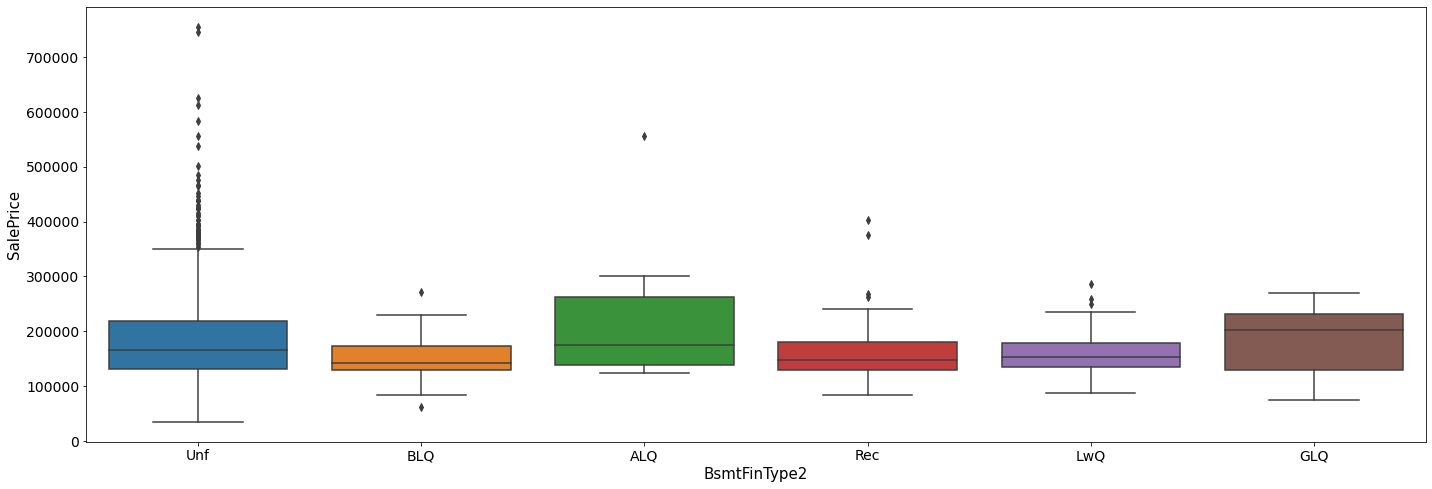

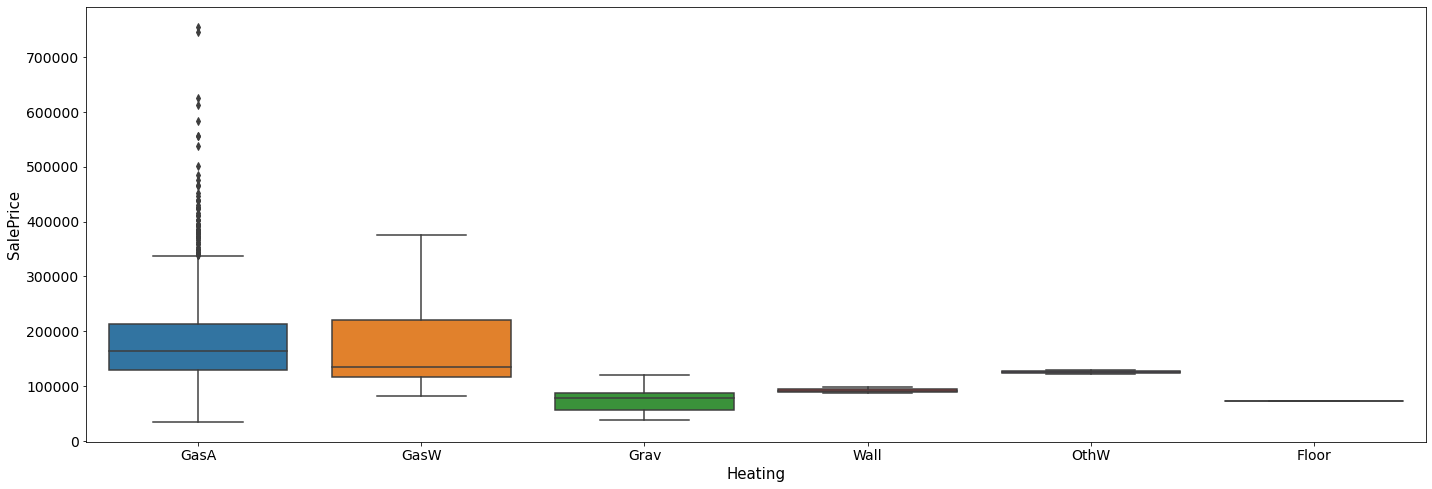

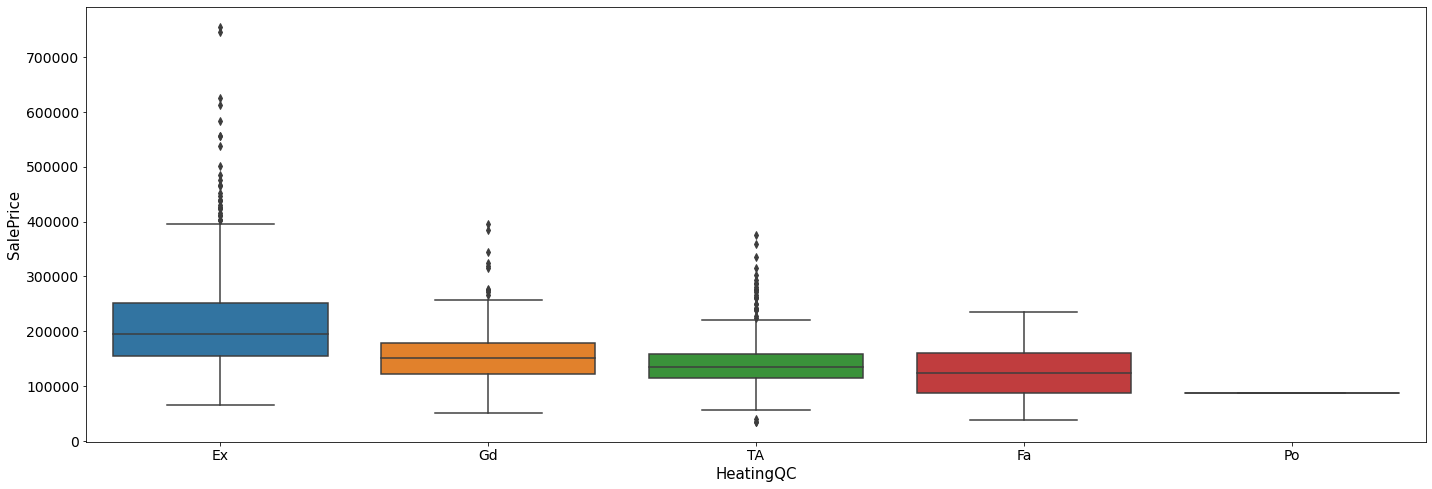

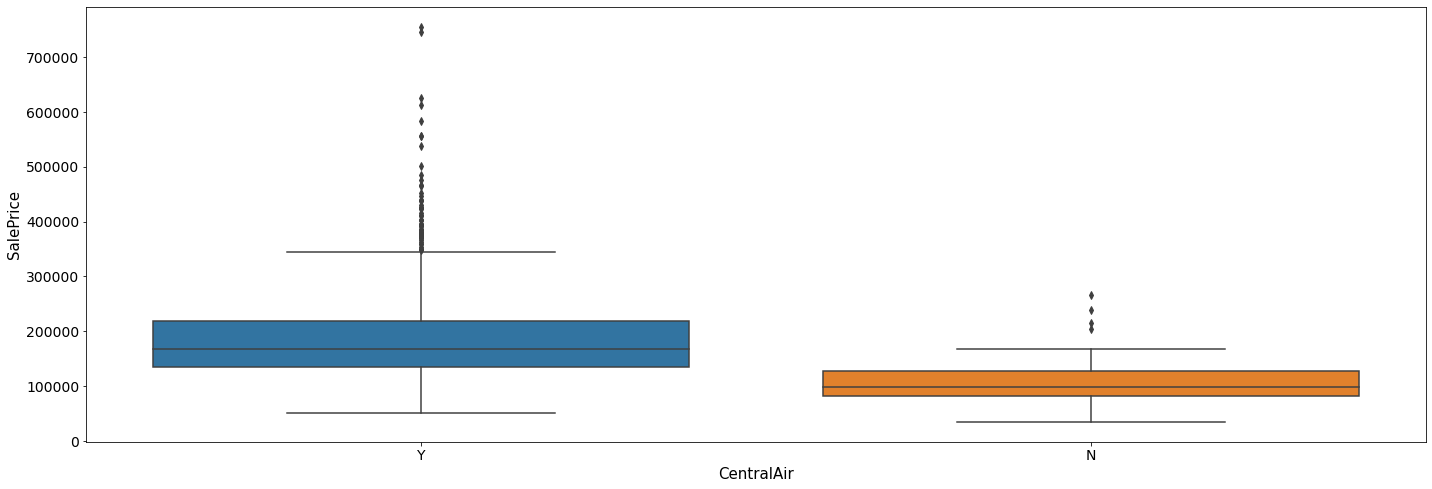

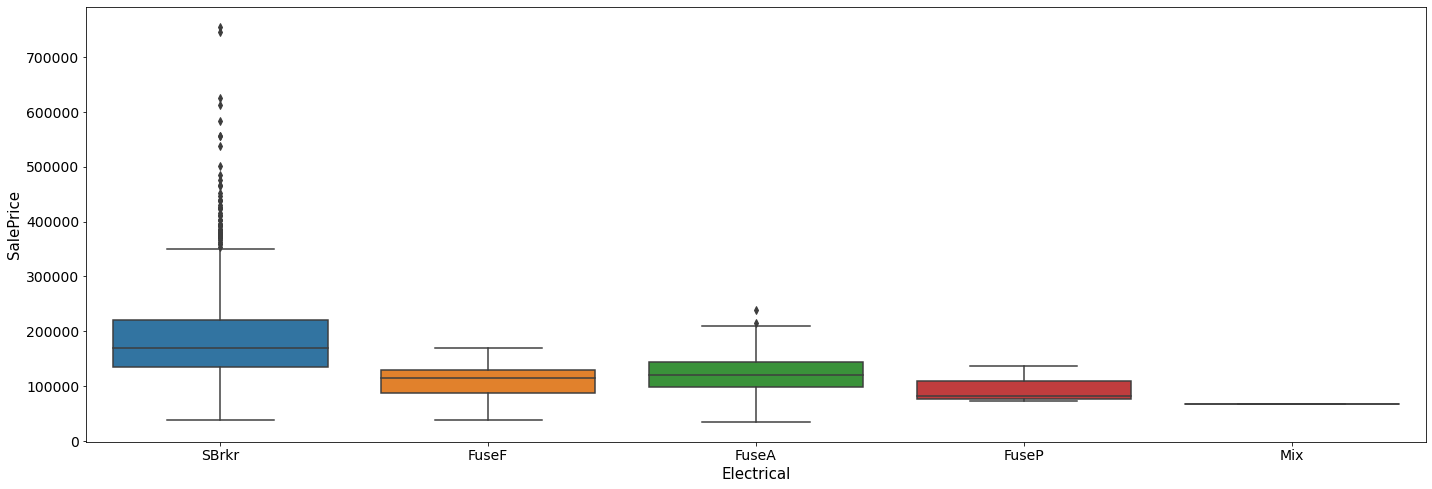

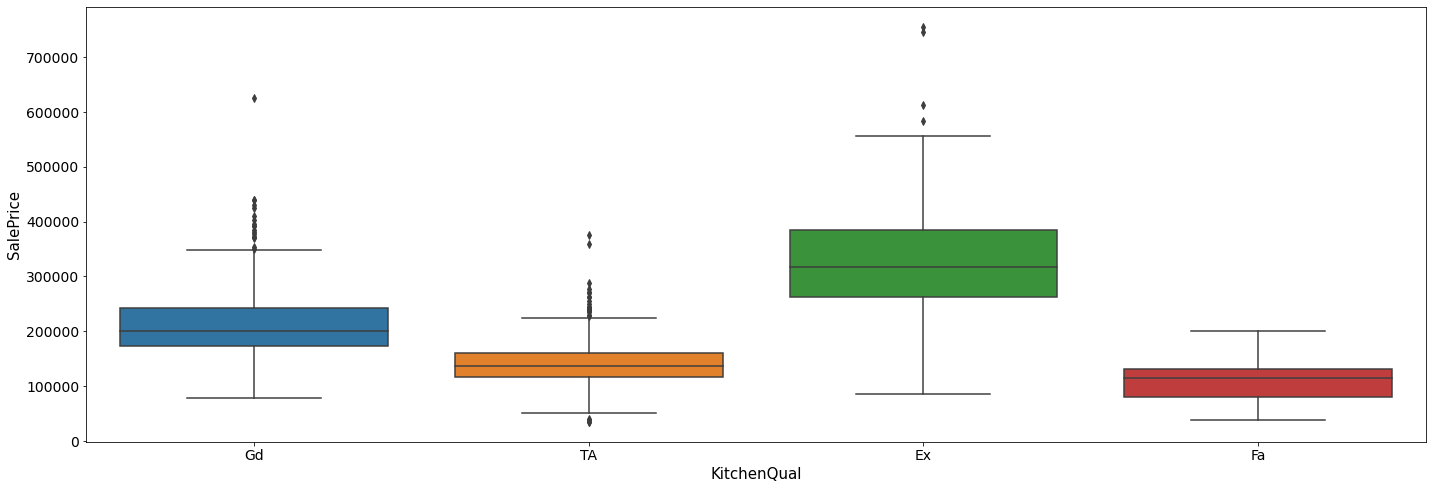

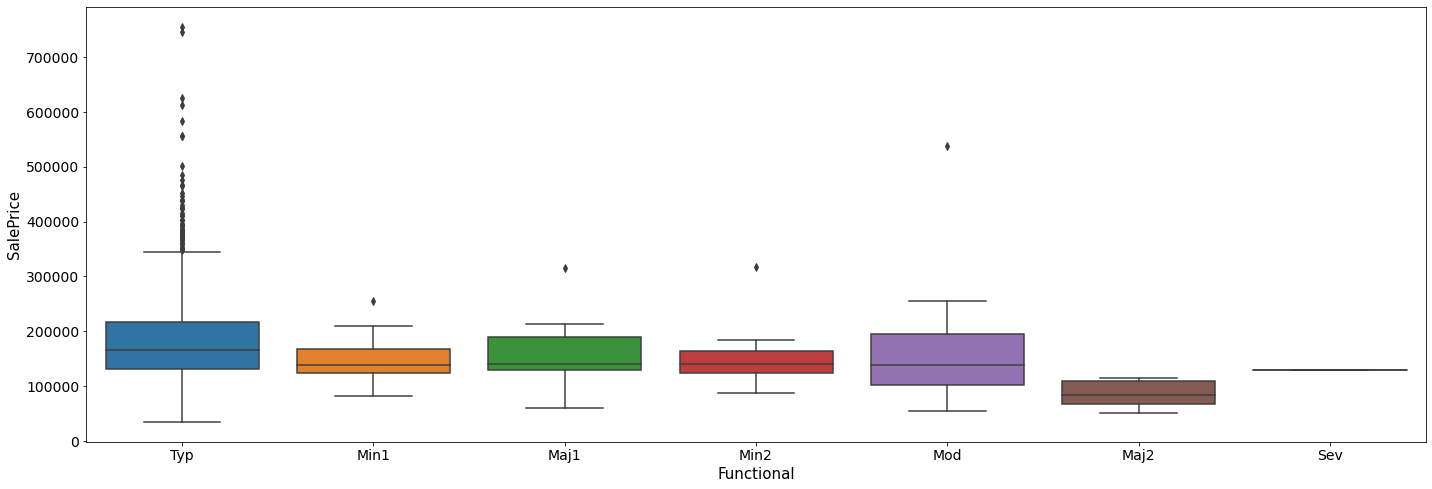

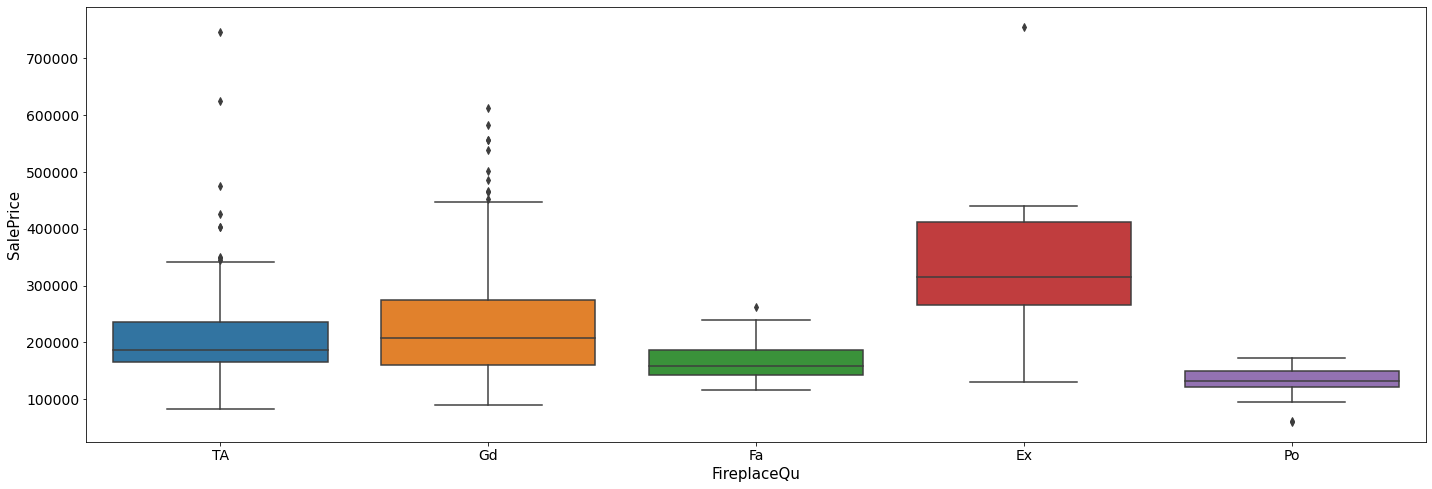

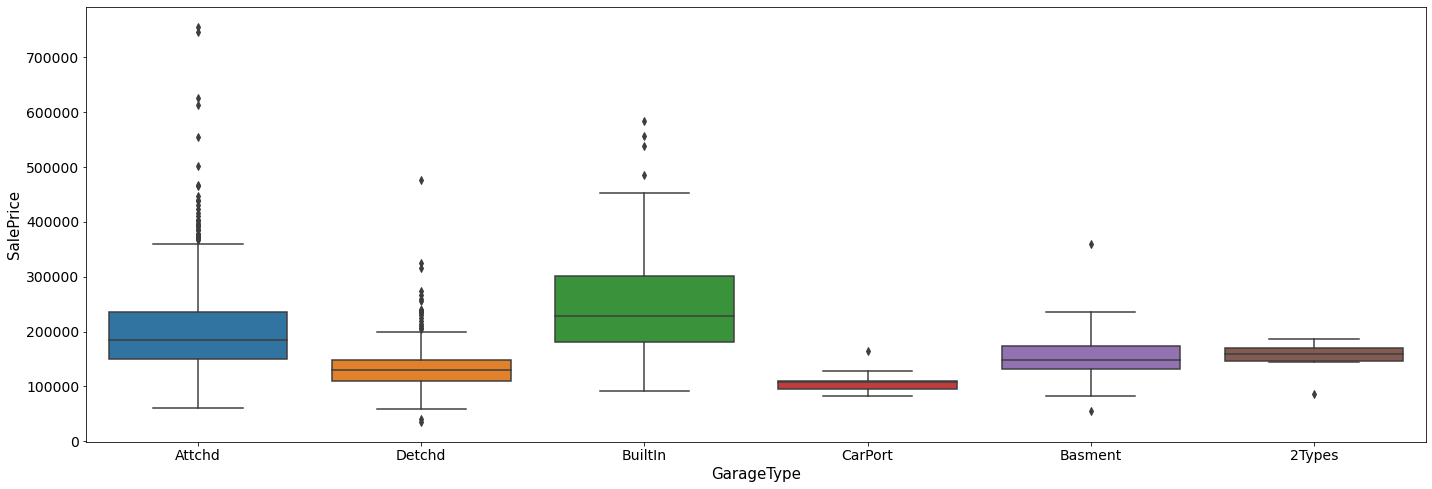

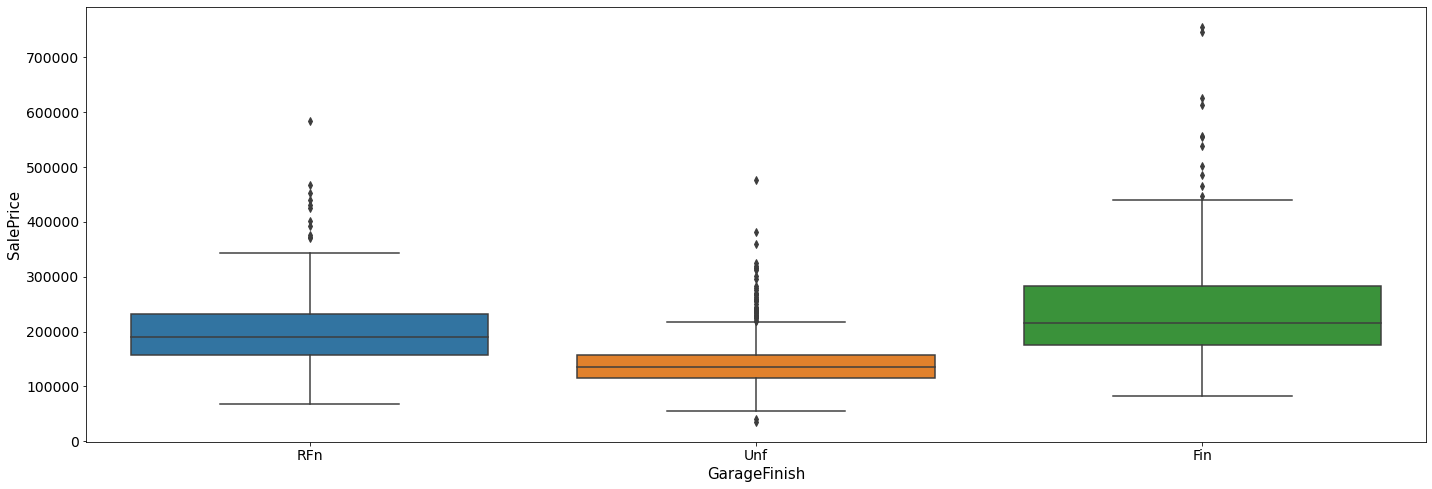

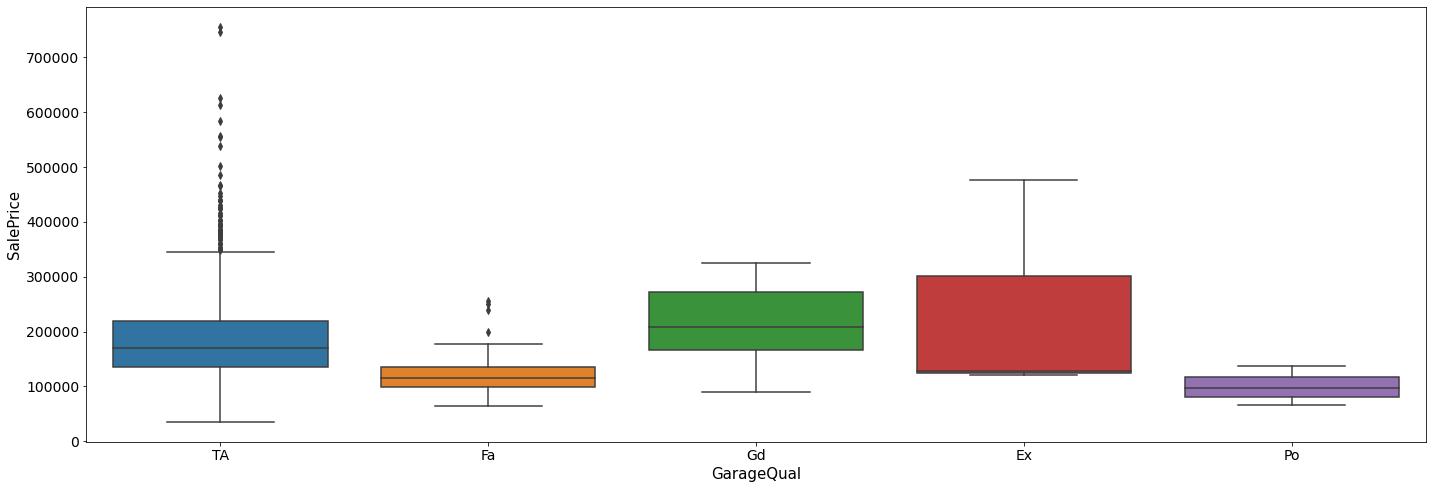

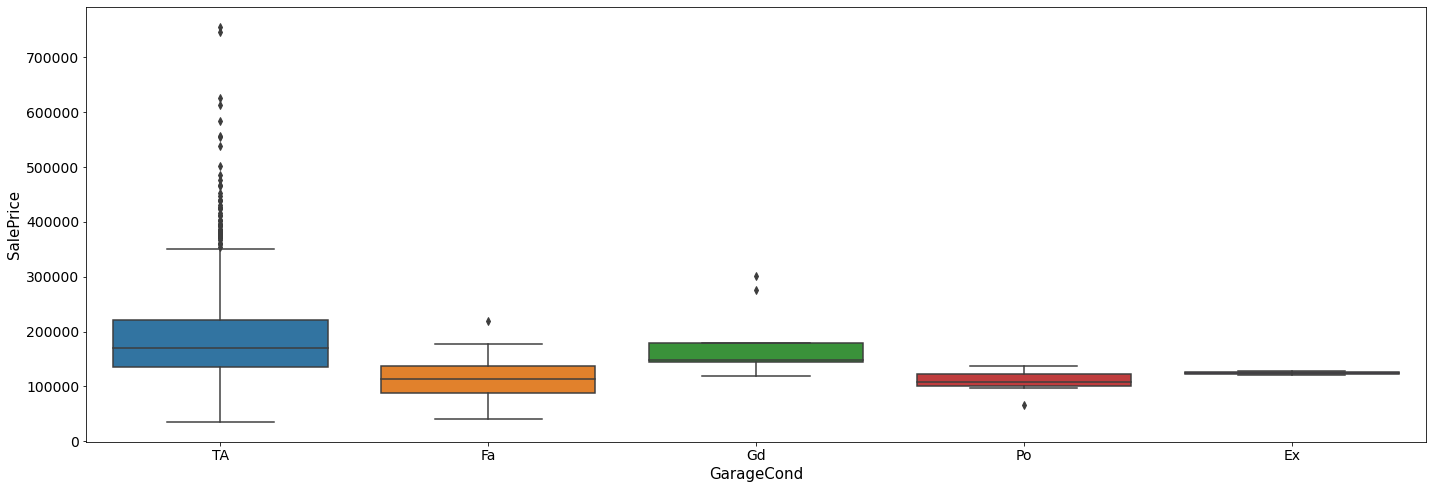

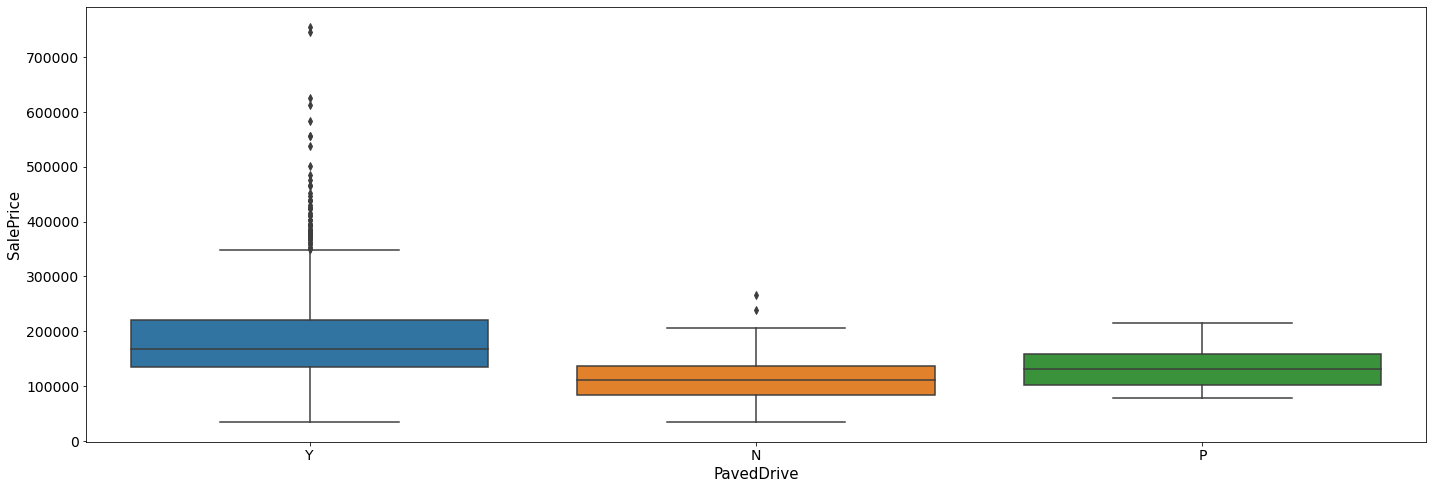

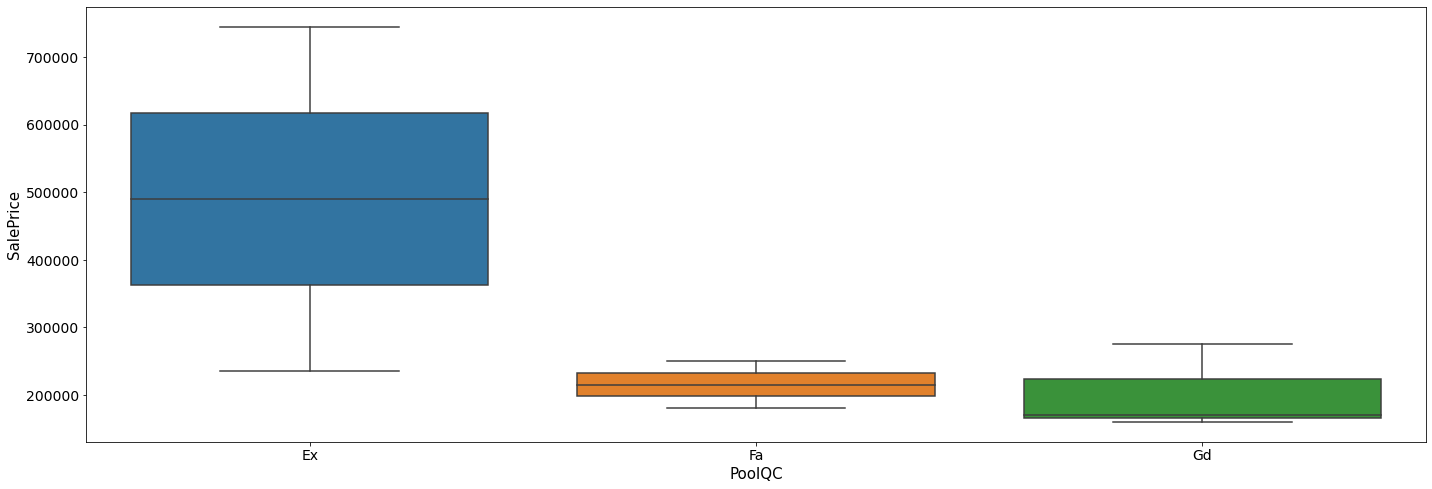

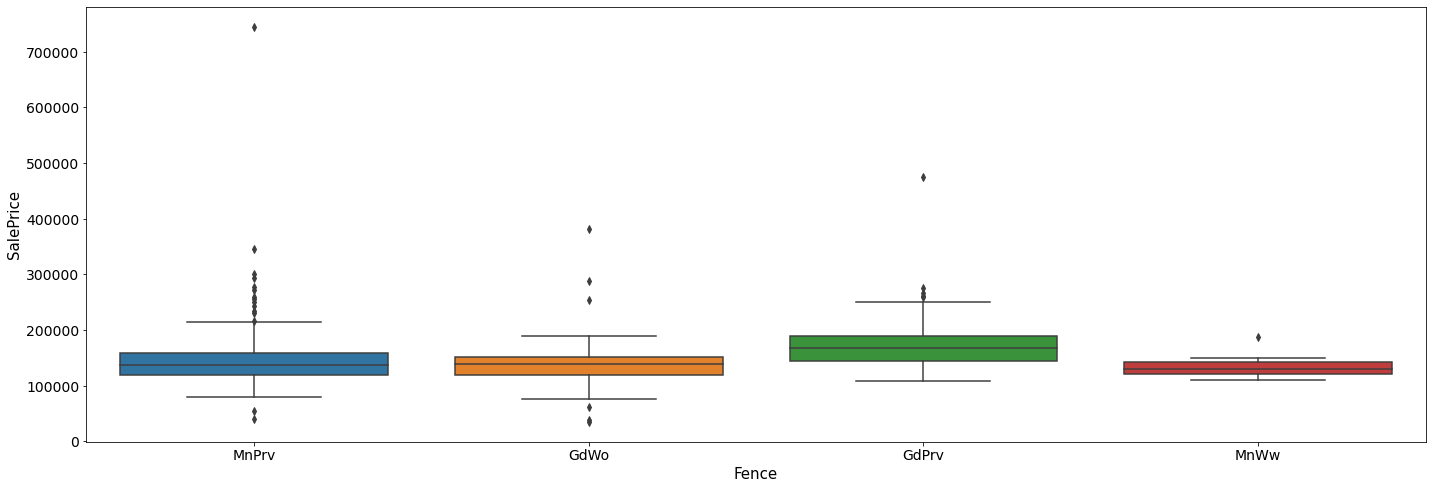

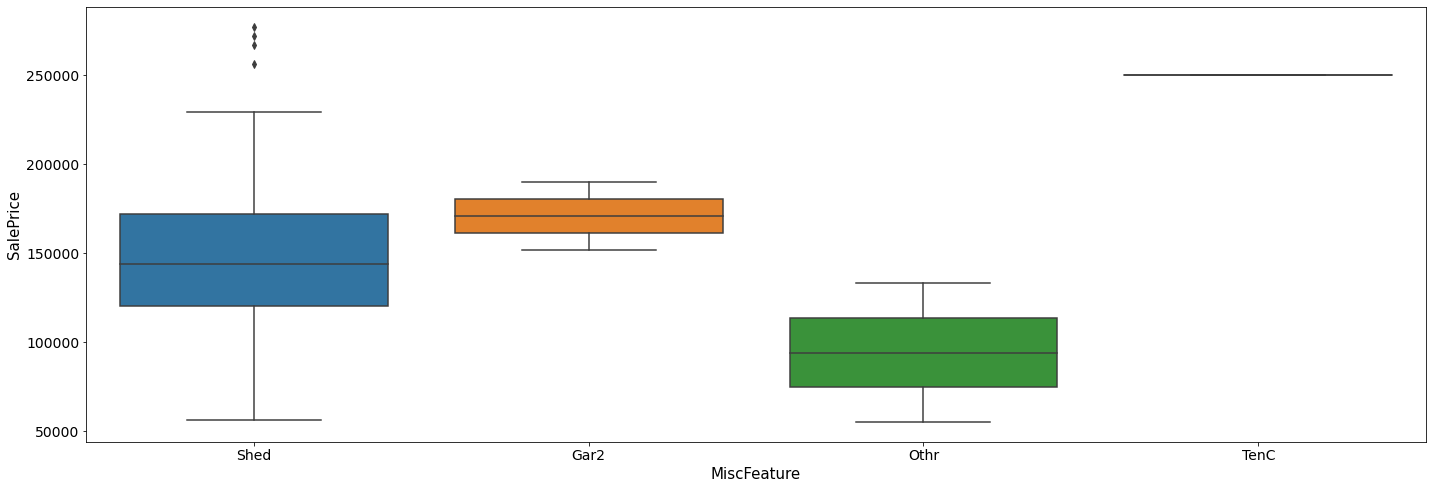

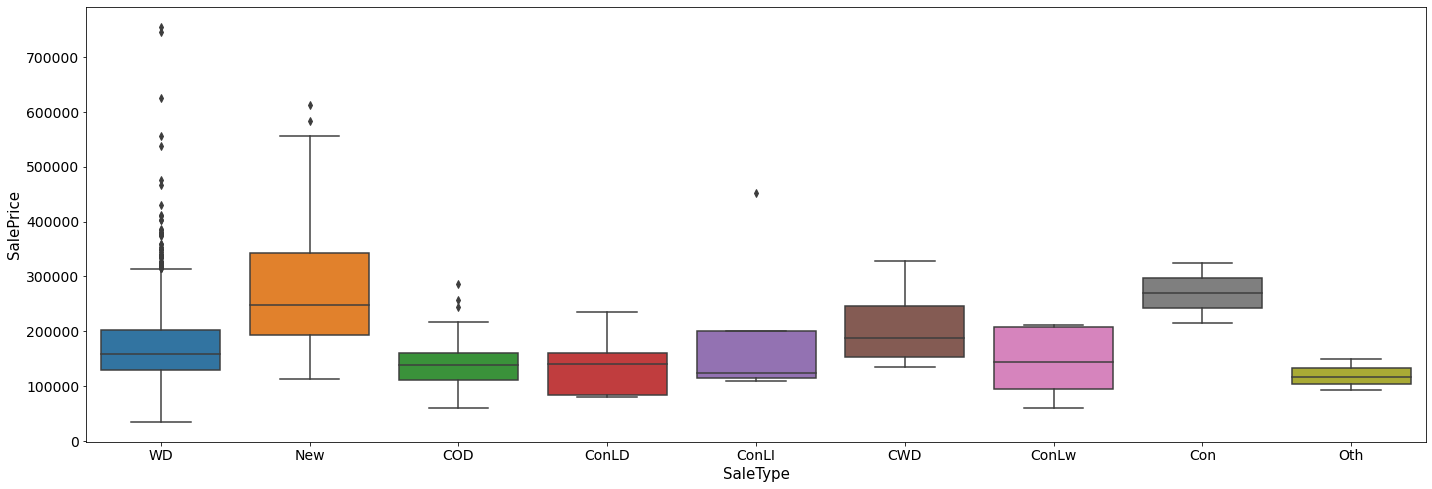

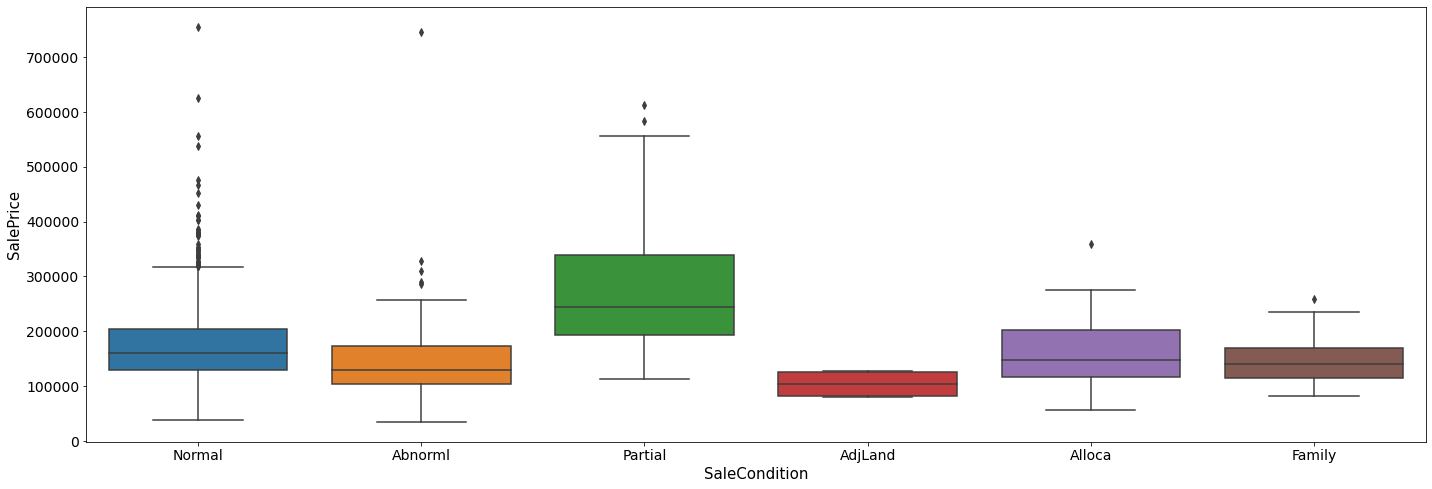

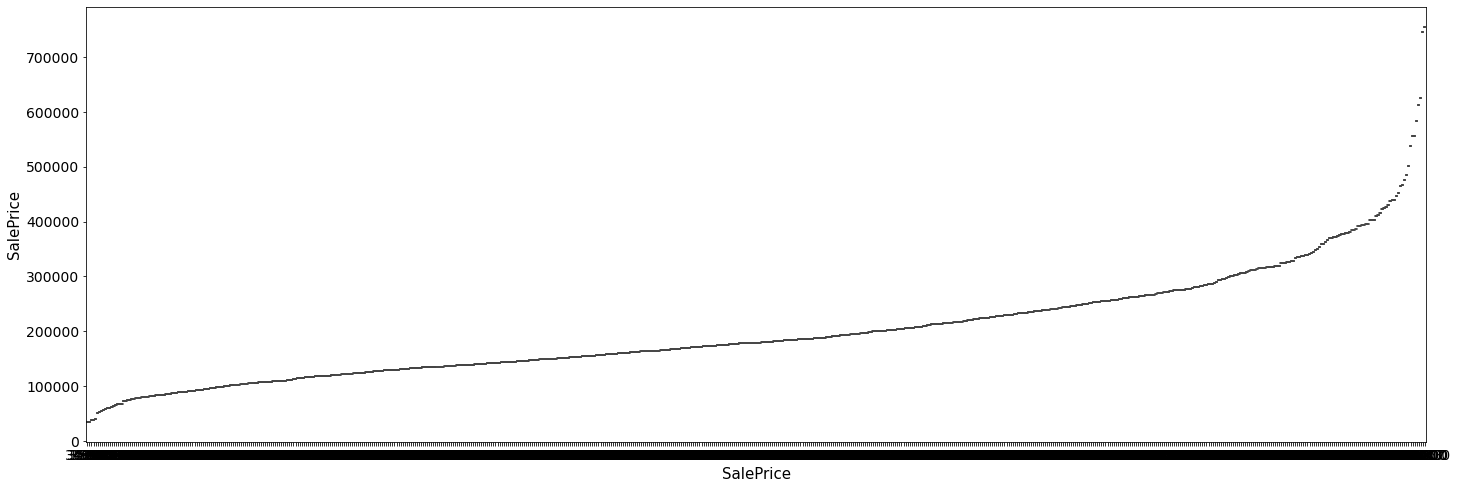

In [32]:
for feature in eda.categorical_data(data,include_target_var=True).columns:
    plt.figure(figsize=(24,8))
    sns.boxplot(data=data, x=feature, y='SalePrice')
    plt.tick_params(labelsize=14)
    plt.xlabel(feature, size=15)
    plt.ylabel('SalePrice', size=15);

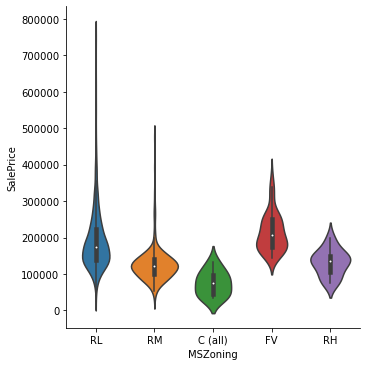

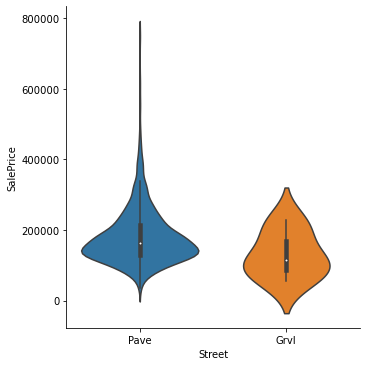

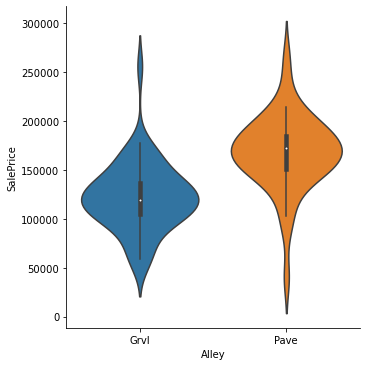

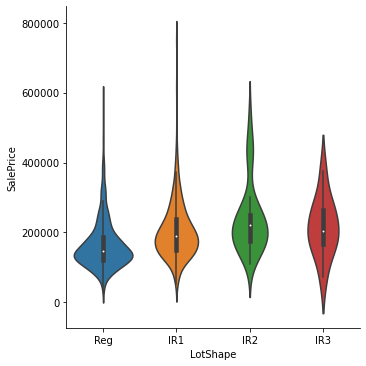

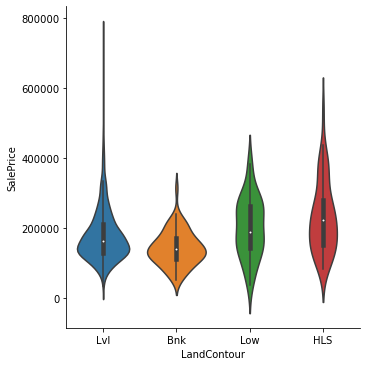

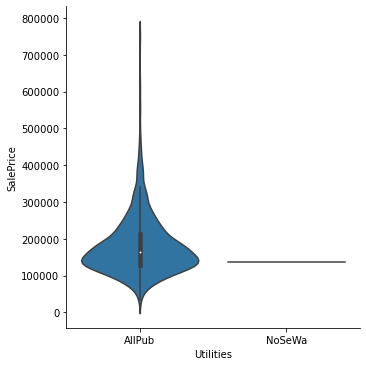

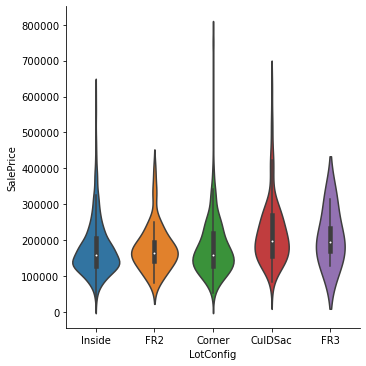

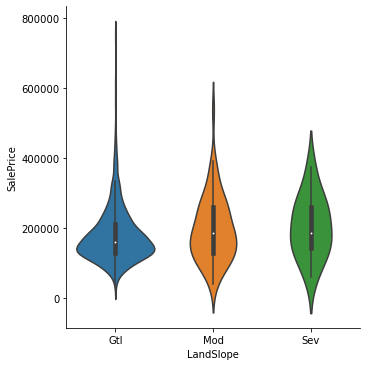

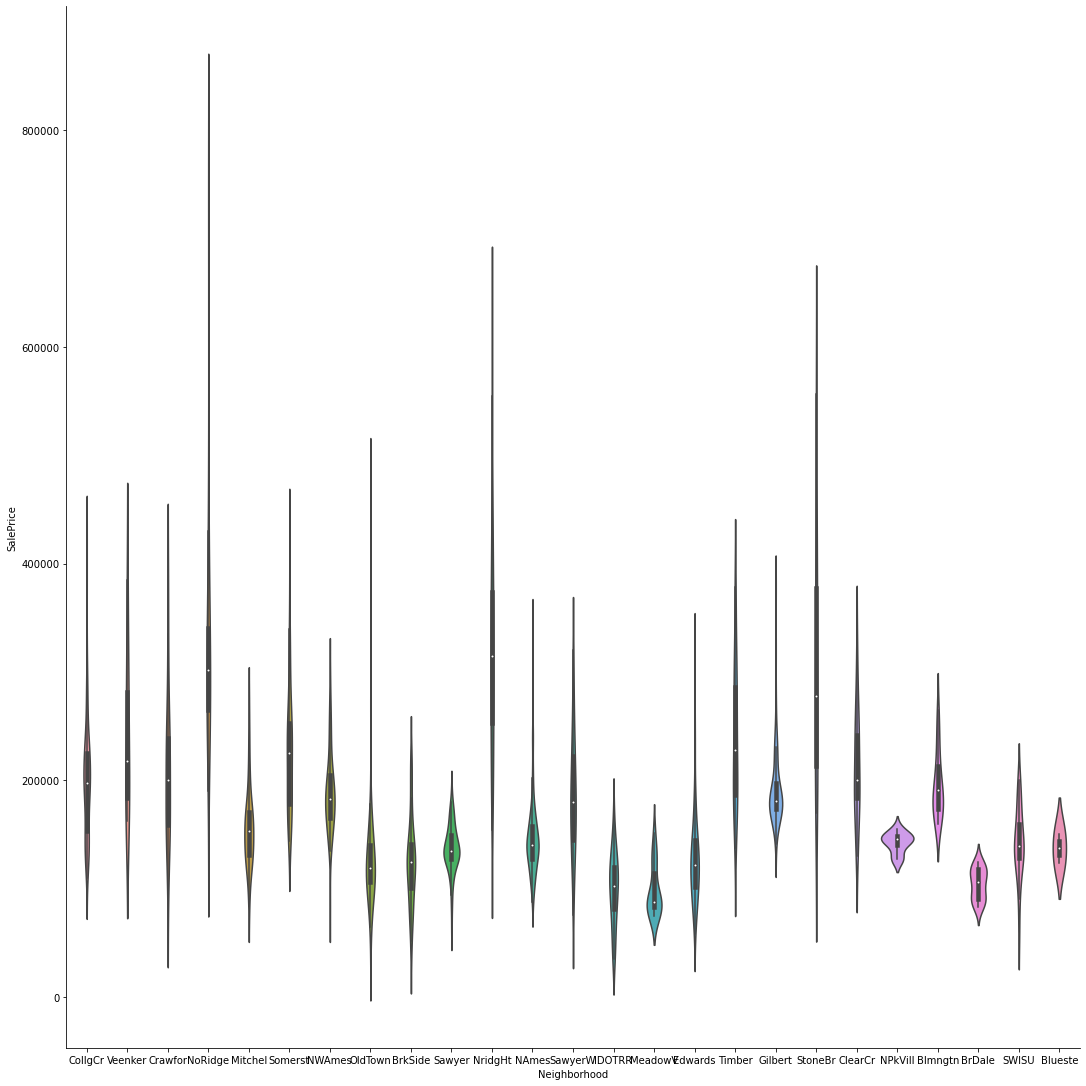

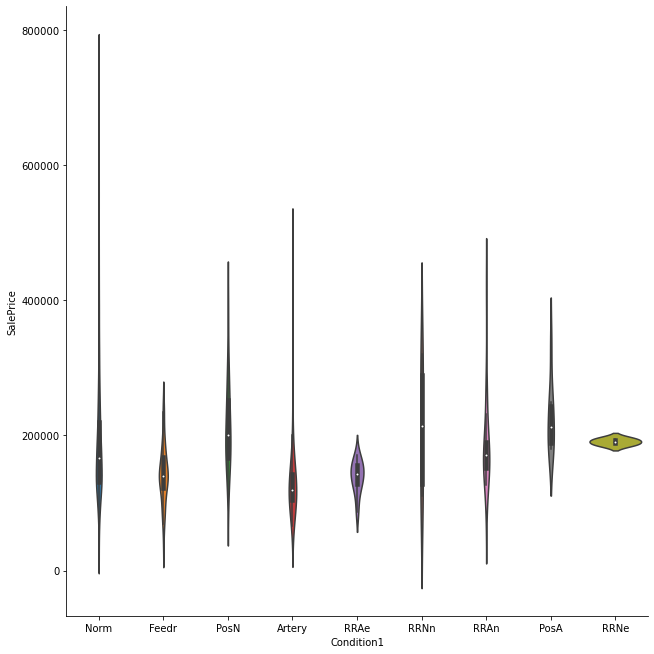

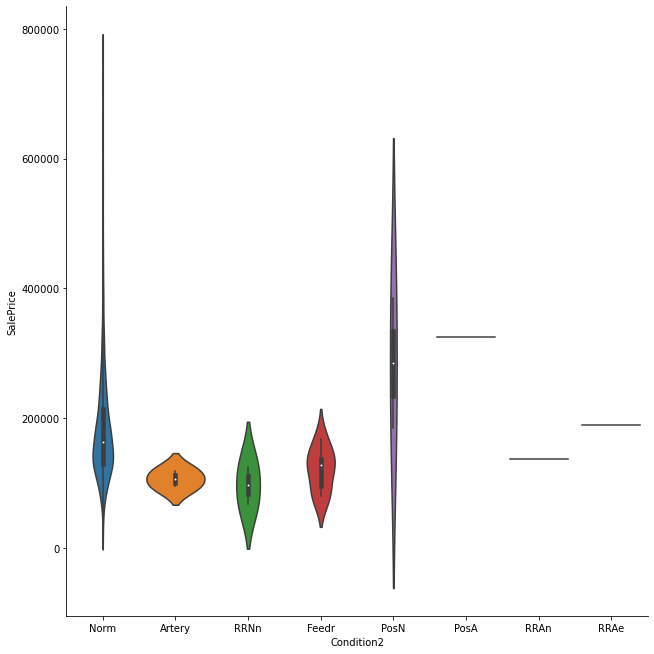

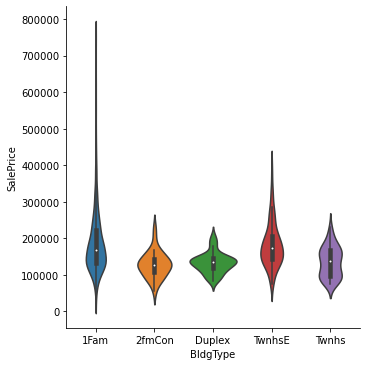

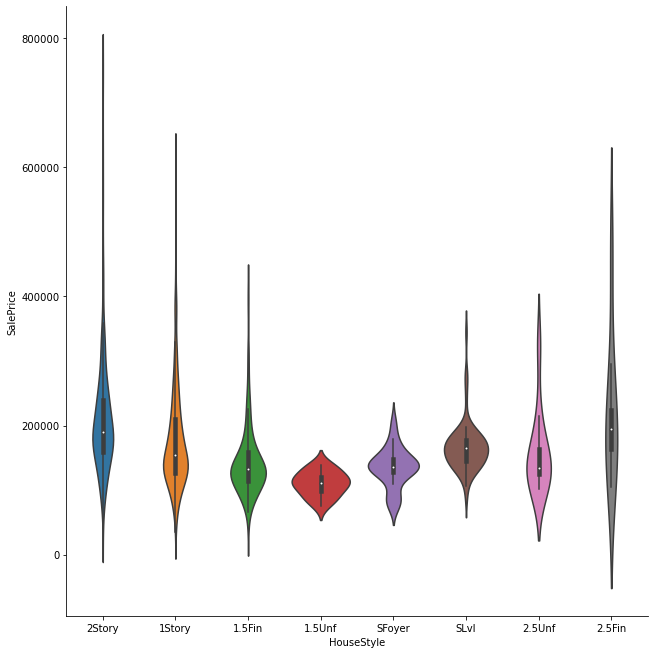

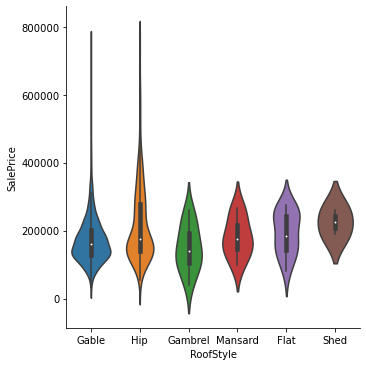

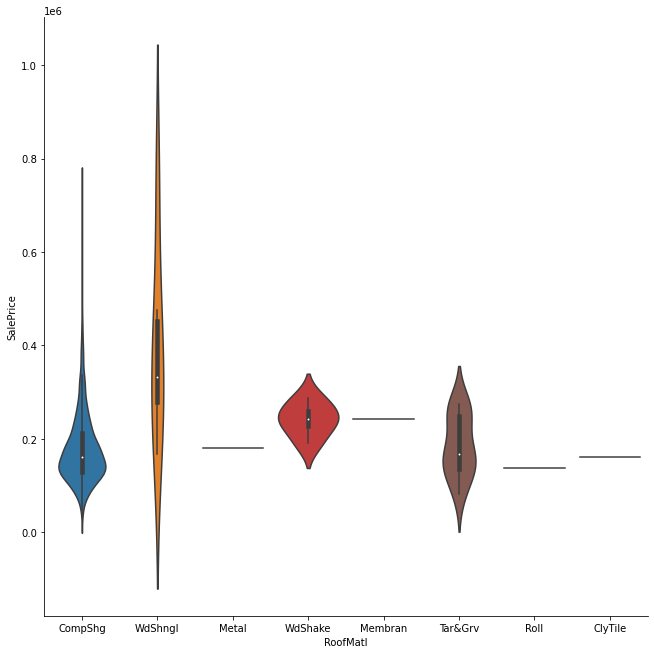

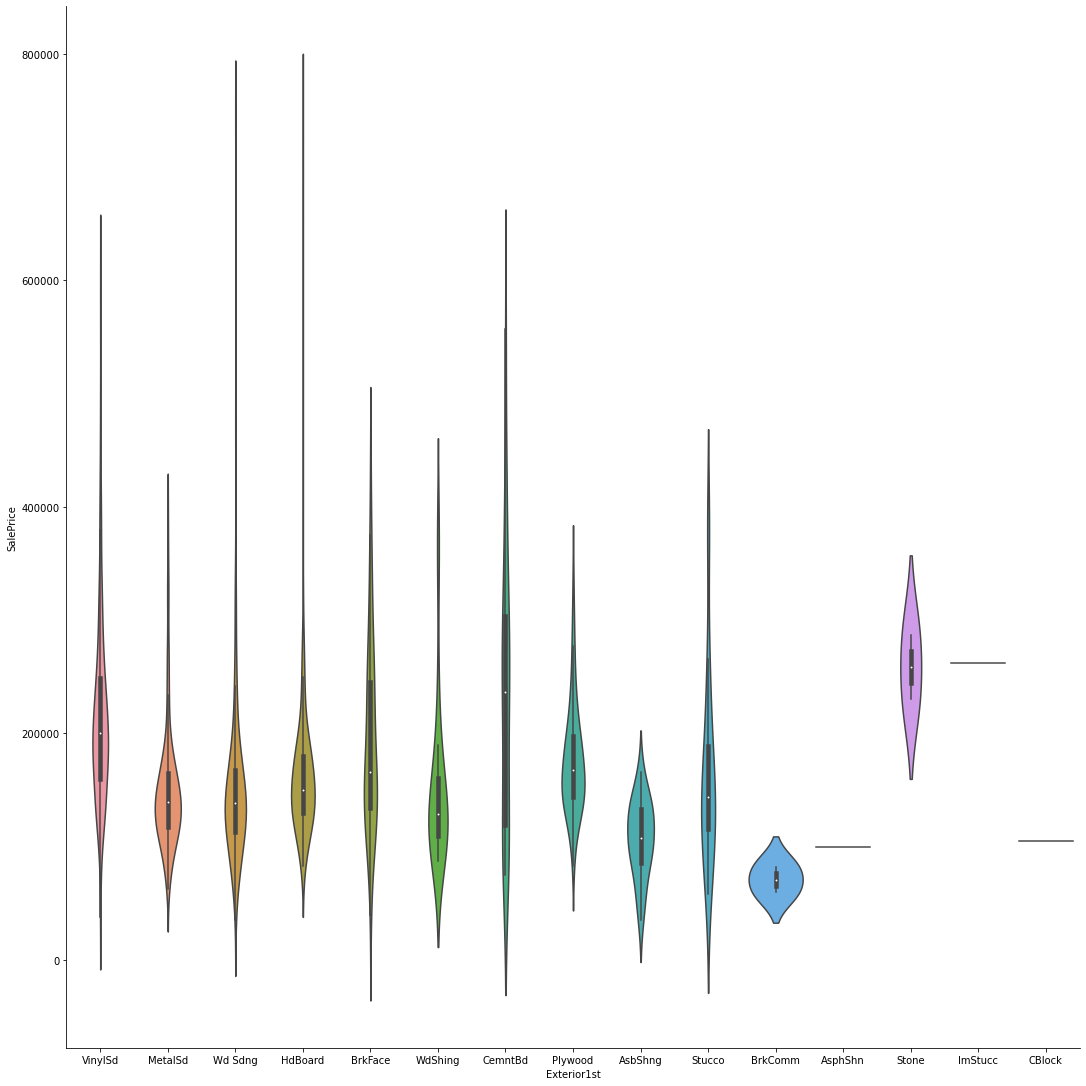

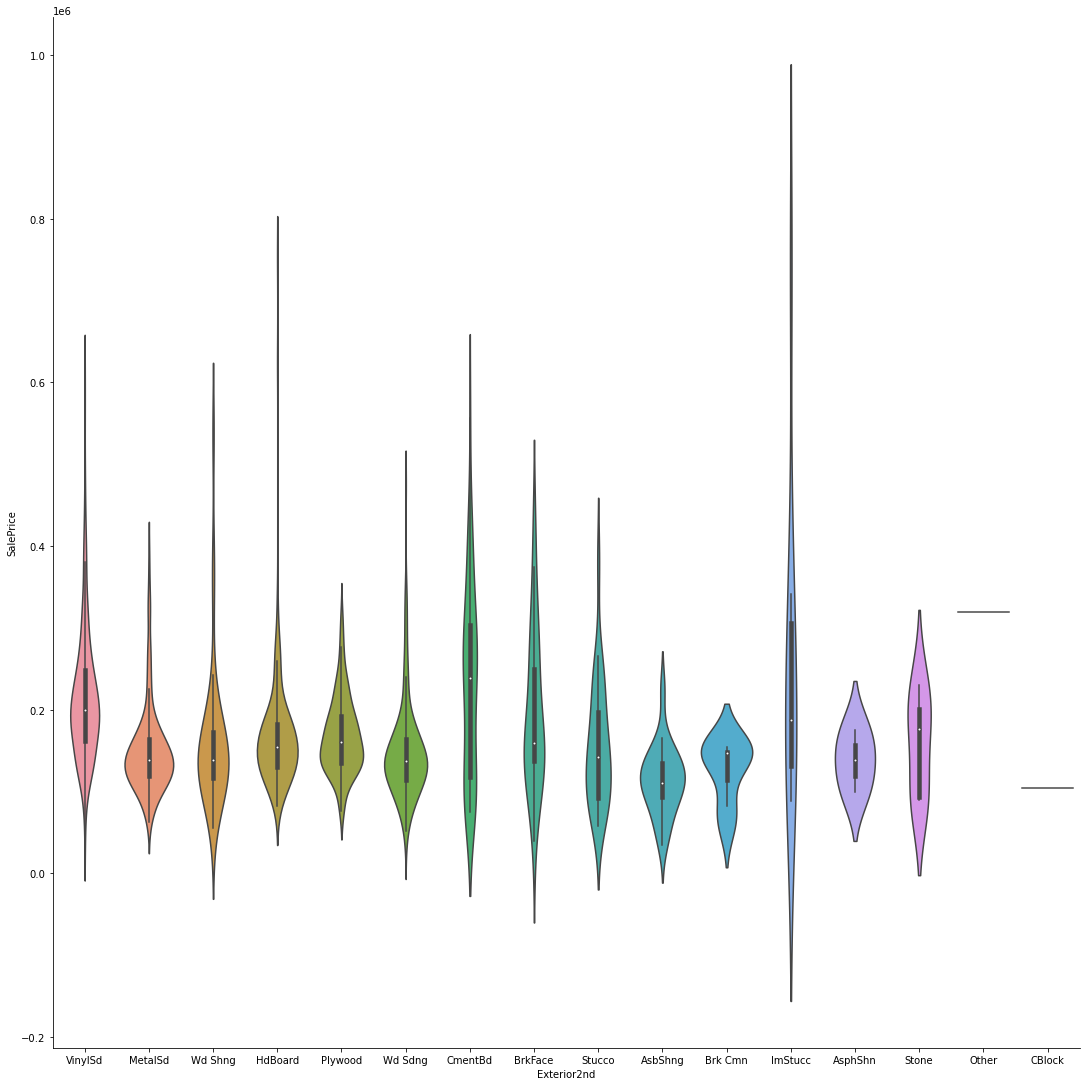

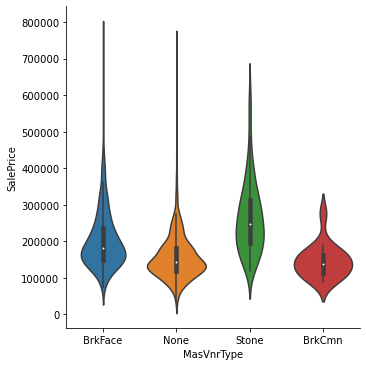

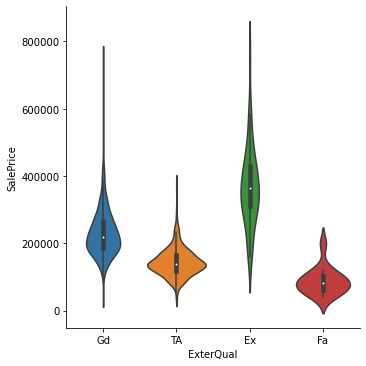

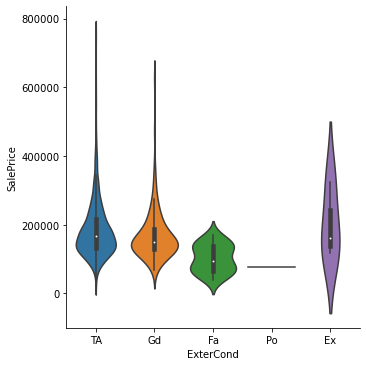

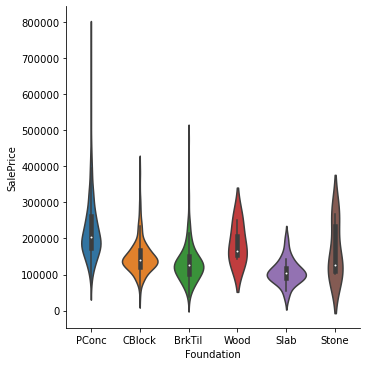

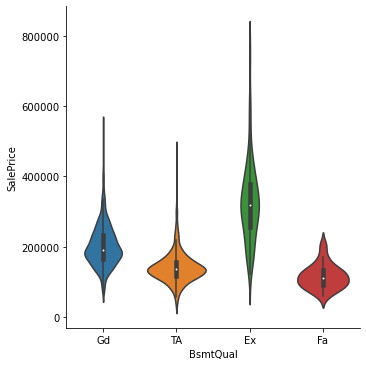

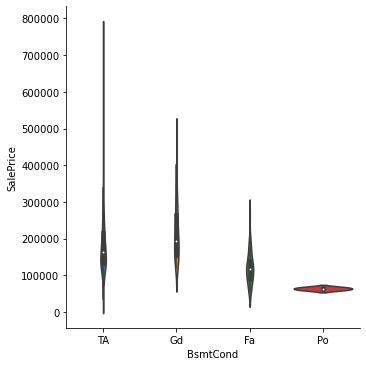

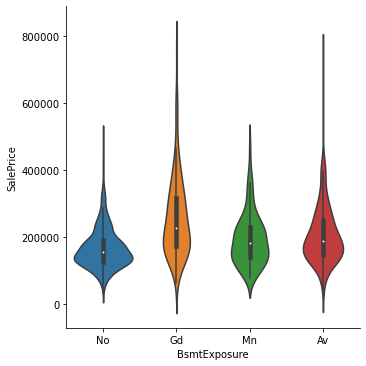

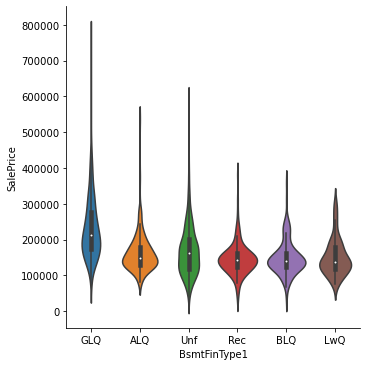

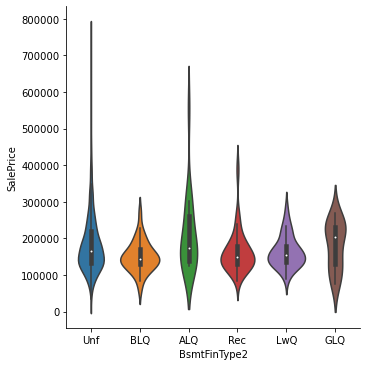

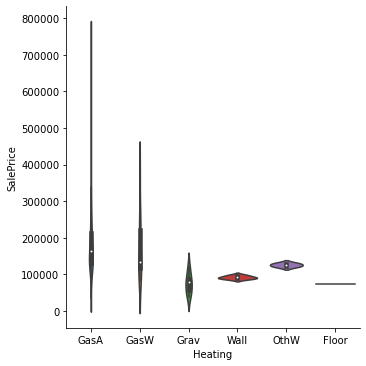

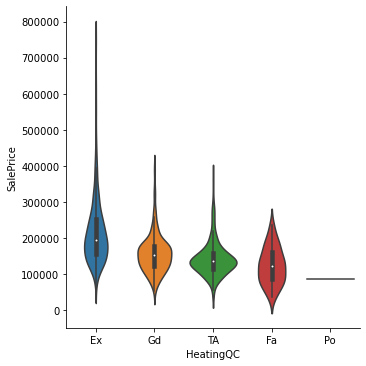

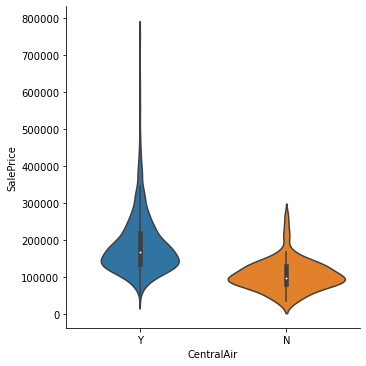

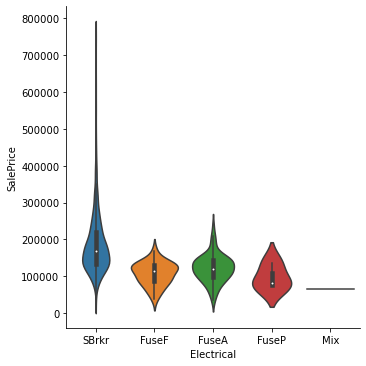

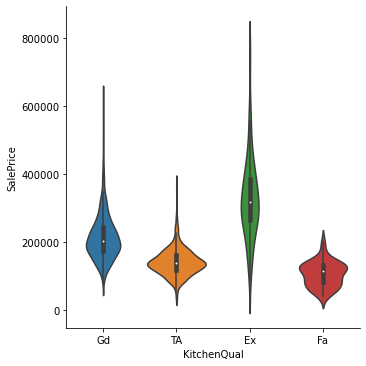

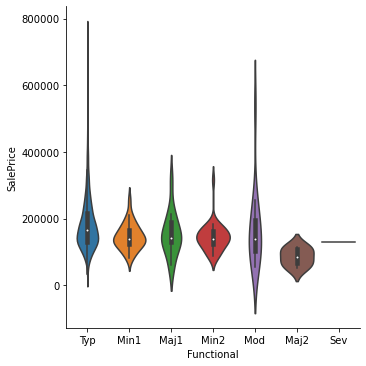

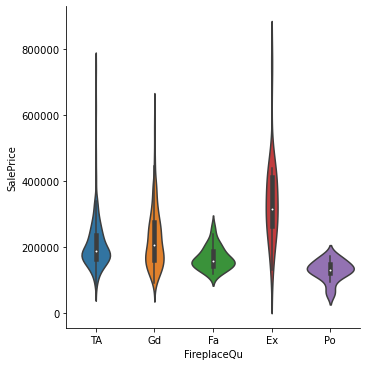

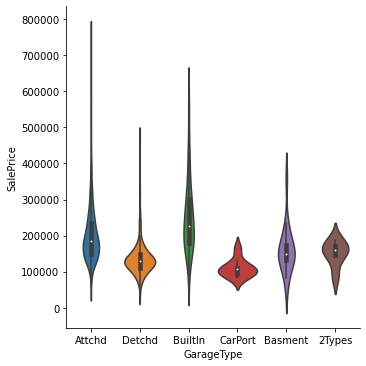

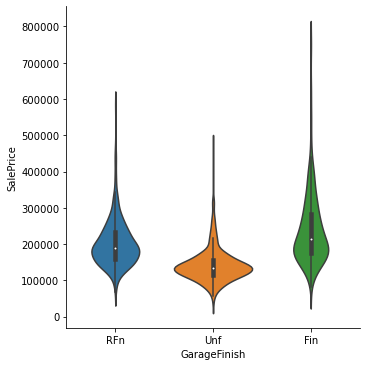

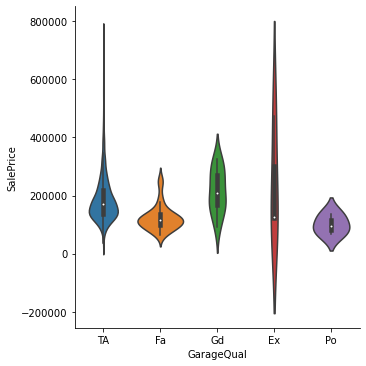

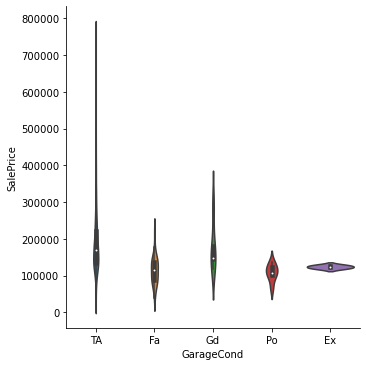

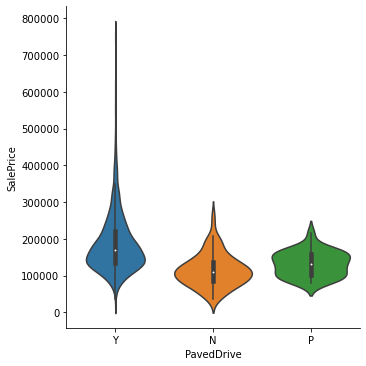

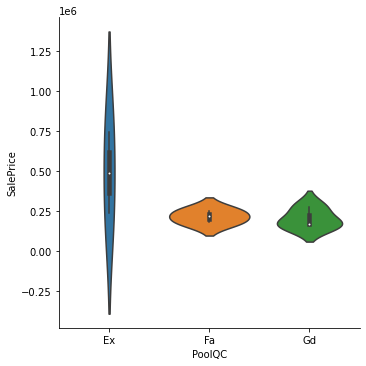

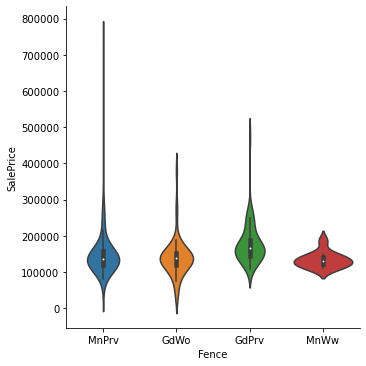

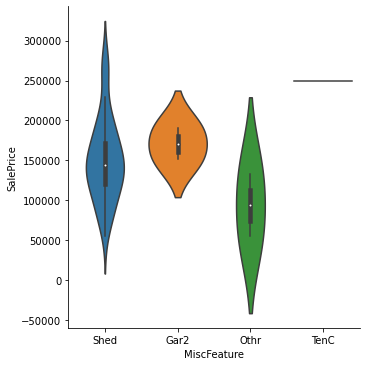

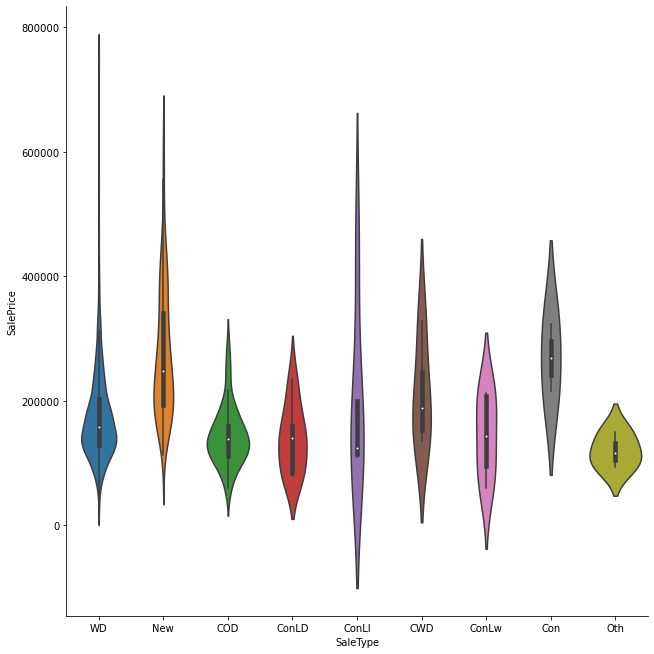

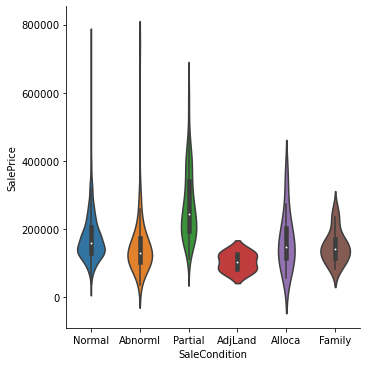

In [6]:
# catplot
for feature,i in zip(df.drop('SalePrice',axis=1).columns,list(range(n))):  
    if df[feature].nunique()<8:
        sns.catplot(data=df, x=feature,
                    y = 'SalePrice',
                    kind='violin')
    elif df[feature].nunique() in list(range(8,15)) :
        sns.catplot(data=df, x=feature,
                    y = 'SalePrice',
                    kind='violin',height=9)
    else:
        sns.catplot(data=df, x=feature,
                    y = 'SalePrice',
                    kind='violin', height=15)
        
     
    
    


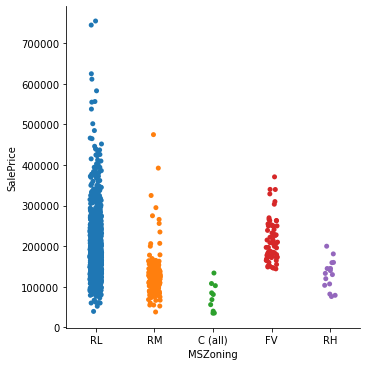

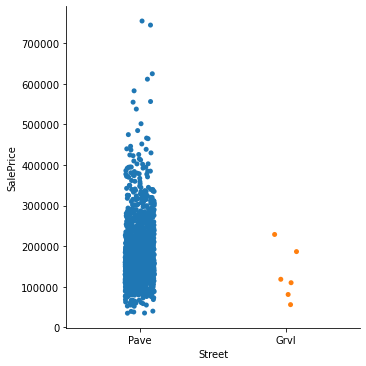

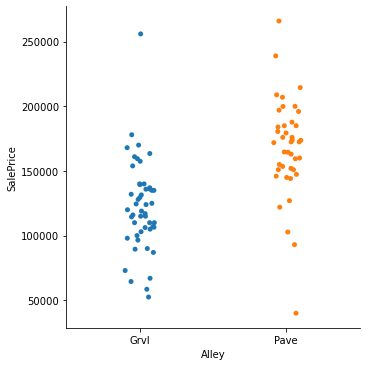

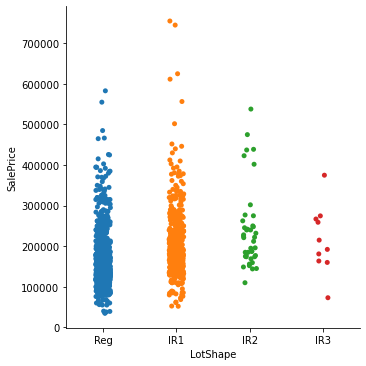

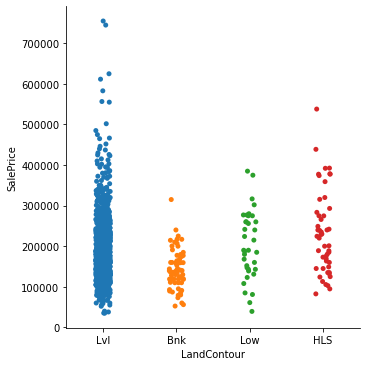

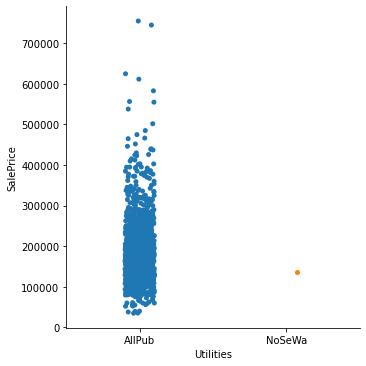

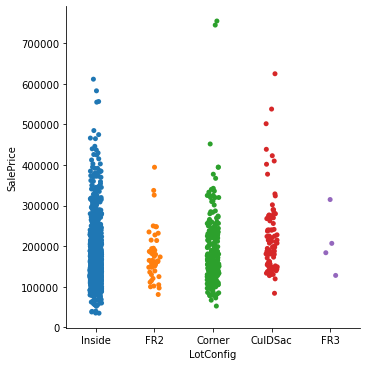

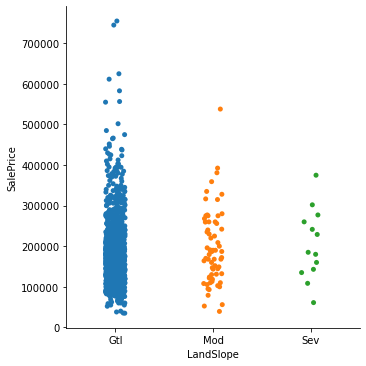

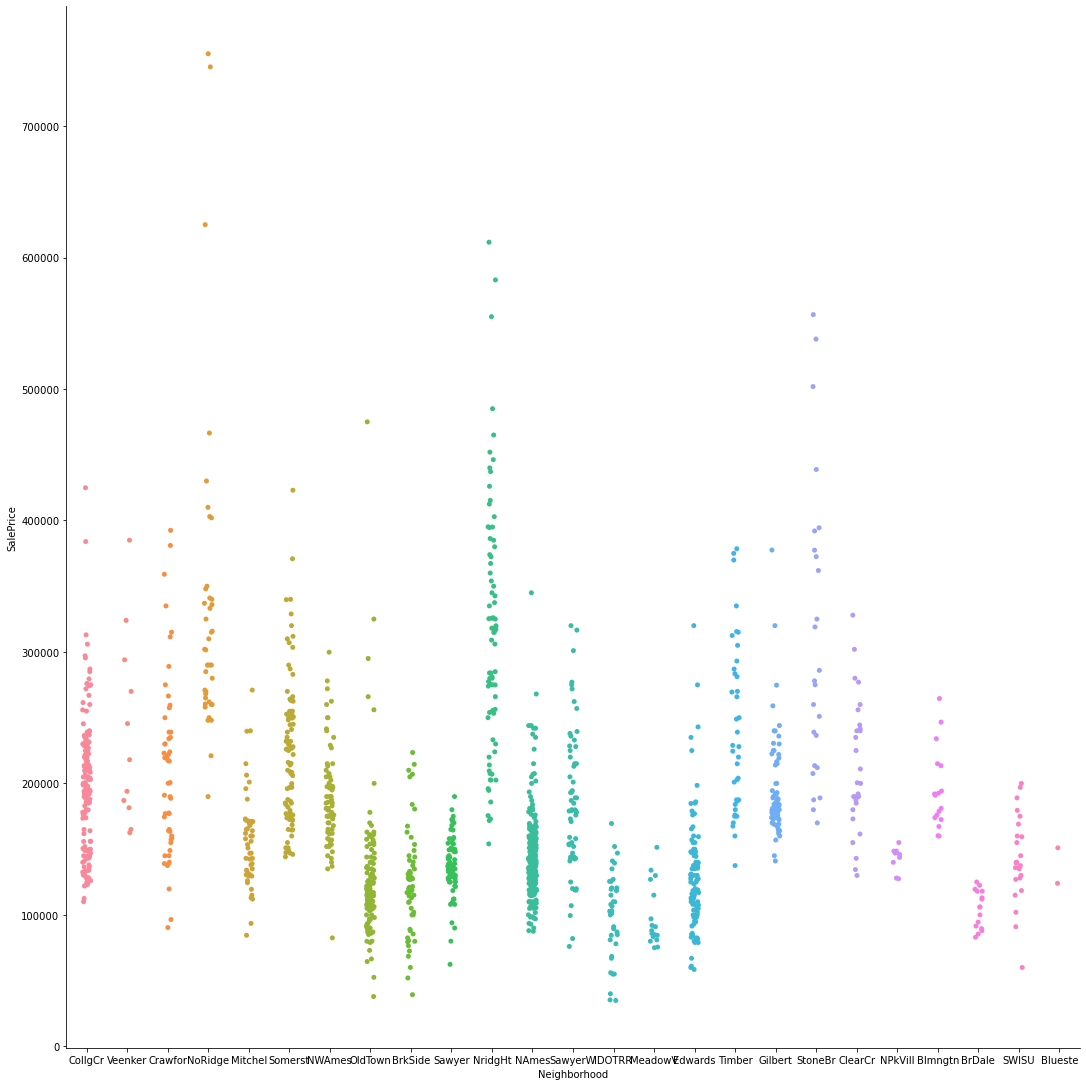

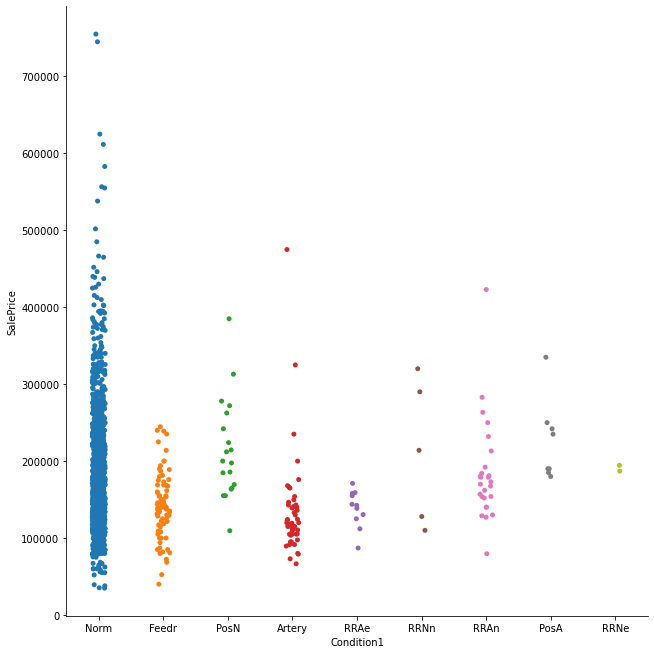

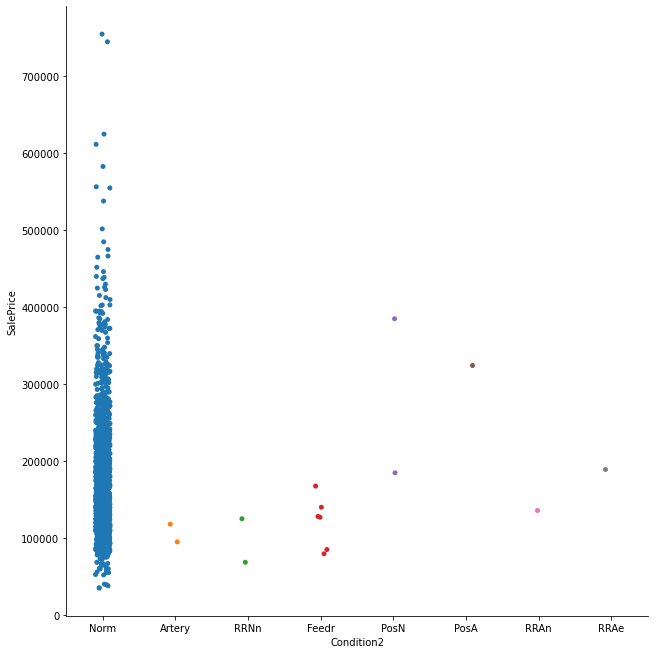

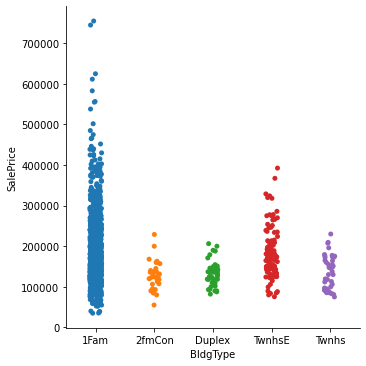

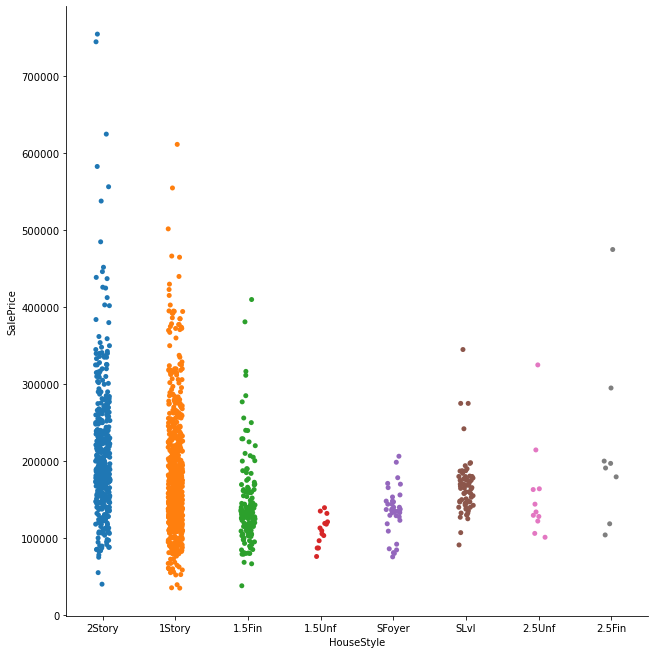

In [ ]:
# catplot
for feature,i in zip(df.drop('SalePrice',axis=1).columns,list(range(n))):  
    if df[feature].nunique()<8:
        sns.catplot(data=df, x=feature,
                    y = 'SalePrice'
                    )
    elif df[feature].nunique() in list(range(8,15)) :
        sns.catplot(data=df, x=feature,
                    y = 'SalePrice',
                    height=9)
    else:
        sns.catplot(data=df, x=feature,
                    y = 'SalePrice',
                     height=15)